In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

cust_df = pd.read_csv("../data/santander_train.csv", encoding='latin-1')
cust_df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

x_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_features, y_labels, 
                                                    test_size=0.2, stratify=y_labels)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, 
                                            test_size=0.3)

LightGBM

In [5]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

eval_set = [(x_tr, y_tr), (x_val, y_val)]

lgbm_clf = LGBMClassifier(n_estimators=500, n_jobs=-1)
lgbm_clf.fit(x_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', eval_set=eval_set)

pred_proba = lgbm_clf.predict_proba(x_test)[:, 1]
lgbm_roc_score = roc_auc_score(y_test, pred_proba)

[1]	training's auc: 0.826014	training's binary_logloss: 0.156428	valid_1's auc: 0.807179	valid_1's binary_logloss: 0.159893
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.83735	training's binary_logloss: 0.150685	valid_1's auc: 0.815937	valid_1's binary_logloss: 0.155192
[3]	training's auc: 0.845198	training's binary_logloss: 0.146646	valid_1's auc: 0.823119	valid_1's binary_logloss: 0.151739
[4]	training's auc: 0.849783	training's binary_logloss: 0.143287	valid_1's auc: 0.82408	valid_1's binary_logloss: 0.149183
[5]	training's auc: 0.852308	training's binary_logloss: 0.140398	valid_1's auc: 0.822291	valid_1's binary_logloss: 0.147248
[6]	training's auc: 0.855232	training's binary_logloss: 0.138109	valid_1's auc: 0.823447	valid_1's binary_logloss: 0.145581
[7]	training's auc: 0.857046	training's binary_logloss: 0.136116	valid_1's auc: 0.823951	valid_1's binary_logloss: 0.144148
[8]	training's auc: 0.85862	training's binary_logloss: 0.134478	valid_1'

[73]	training's auc: 0.927777	training's binary_logloss: 0.105148	valid_1's auc: 0.827981	valid_1's binary_logloss: 0.138507
[74]	training's auc: 0.928007	training's binary_logloss: 0.104992	valid_1's auc: 0.827801	valid_1's binary_logloss: 0.138561
[75]	training's auc: 0.928453	training's binary_logloss: 0.104755	valid_1's auc: 0.827908	valid_1's binary_logloss: 0.138552
[76]	training's auc: 0.928581	training's binary_logloss: 0.104629	valid_1's auc: 0.827405	valid_1's binary_logloss: 0.138649
[77]	training's auc: 0.928714	training's binary_logloss: 0.104521	valid_1's auc: 0.82744	valid_1's binary_logloss: 0.138681
[78]	training's auc: 0.928915	training's binary_logloss: 0.104342	valid_1's auc: 0.827562	valid_1's binary_logloss: 0.138666
[79]	training's auc: 0.929312	training's binary_logloss: 0.104105	valid_1's auc: 0.827537	valid_1's binary_logloss: 0.138661
[80]	training's auc: 0.930962	training's binary_logloss: 0.10361	valid_1's auc: 0.827143	valid_1's binary_logloss: 0.13878
[81

In [6]:
print(f'ROC AUC Score: {lgbm_roc_score:.4f}')

ROC AUC Score: 0.8334


In [7]:
from hyperopt import hp

lgbm_search_space = {
    'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
    'max_depth': hp.quniform('max_depth', 100, 160, 1),
    'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
    'subsample': hp.uniform('subsample', 0.7, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
}

In [8]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

def objective_func(search_space):
    
    params = {
        'n_estimators': 100, 
        'num_leaves': int(search_space['num_leaves']),
        'max_depth': int(search_space['max_depth']),
        'min_child_samples': int(search_space['min_child_samples']), 
        'subsample': search_space['subsample'],
        'learning_rate': search_space['learning_rate'],
    }

    lgbm_clf = LGBMClassifier(**params, n_jobs=-1)
    roc_auc_list = []
    
    kf = KFold(n_splits=3)
    
    for tr_index, val_index in kf.split(x_train):
        x_tr, y_tr = x_train.iloc[tr_index], y_train.iloc[tr_index]
        x_val, y_val = x_train.iloc[val_index], y_train.iloc[val_index]
        lgbm_clf.fit(x_tr, y_tr, early_stopping_rounds=30, 
                     eval_metric='auc', eval_set=[(x_tr, y_tr), (x_val, y_val)])
        pred_proba = lgbm_clf.predict_proba(x_val)[:, 1]
        score = roc_auc_score(y_val, pred_proba)
        roc_auc_list.append(score)
    
    return -1 * np.mean(roc_auc_list)

In [9]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

best = fmin(fn=objective_func, space=lgbm_search_space, 
            algo=tpe.suggest, max_evals=50, trials=trials, 
            rstate=np.random.default_rng(seed=30))

[1]	training's auc: 0.830916	training's binary_logloss: 0.161685	valid_1's auc: 0.822922	valid_1's binary_logloss: 0.169892
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.832287	training's binary_logloss: 0.159711	valid_1's auc: 0.823325	valid_1's binary_logloss: 0.16798
[3]	training's auc: 0.833888	training's binary_logloss: 0.15797	valid_1's auc: 0.823967	valid_1's binary_logloss: 0.166286
[4]	training's auc: 0.83505	training's binary_logloss: 0.156402	valid_1's auc: 0.823817	valid_1's binary_logloss: 0.164807
[5]	training's auc: 0.83715	training's binary_logloss: 0.154953	valid_1's auc: 0.824622	valid_1's binary_logloss: 0.163455
[6]	training's auc: 0.837957	training's binary_logloss: 0.15364	valid_1's auc: 0.824981	valid_1's binary_logloss: 0.162228
[7]	training's auc: 0.839678	training's binary_logloss: 0.152402	valid_1's auc: 0.826994	valid_1's binary_logloss: 0.161032
[8]	training's au

[65]	training's auc: 0.873219	training's binary_logloss: 0.126911	valid_1's auc: 0.841906	valid_1's binary_logloss: 0.140429
[66]	training's auc: 0.873563	training's binary_logloss: 0.126745	valid_1's auc: 0.84195	valid_1's binary_logloss: 0.140326
[67]	training's auc: 0.87369	training's binary_logloss: 0.126567	valid_1's auc: 0.842021	valid_1's binary_logloss: 0.140242
[68]	training's auc: 0.874047	training's binary_logloss: 0.1264	valid_1's auc: 0.841962	valid_1's binary_logloss: 0.140175
[69]	training's auc: 0.874473	training's binary_logloss: 0.126239	valid_1's auc: 0.842304	valid_1's binary_logloss: 0.140065
[70]	training's auc: 0.874786	training's binary_logloss: 0.126065	valid_1's auc: 0.842244	valid_1's binary_logloss: 0.140002
[71]	training's auc: 0.875076	training's binary_logloss: 0.125891	valid_1's auc: 0.842095	valid_1's binary_logloss: 0.139921
[72]	training's auc: 0.875407	training's binary_logloss: 0.125732	valid_1's auc: 0.842341	valid_1's binary_logloss: 0.139825
[73]

[27]	training's auc: 0.859208	training's binary_logloss: 0.139776	valid_1's auc: 0.827895	valid_1's binary_logloss: 0.14342
[28]	training's auc: 0.859755	training's binary_logloss: 0.139301	valid_1's auc: 0.827873	valid_1's binary_logloss: 0.143088
[29]	training's auc: 0.860468	training's binary_logloss: 0.138844	valid_1's auc: 0.827809	valid_1's binary_logloss: 0.142786
[30]	training's auc: 0.86085	training's binary_logloss: 0.138389	valid_1's auc: 0.827597	valid_1's binary_logloss: 0.142503
[31]	training's auc: 0.861077	training's binary_logloss: 0.13798	valid_1's auc: 0.827594	valid_1's binary_logloss: 0.142228
[32]	training's auc: 0.861332	training's binary_logloss: 0.137561	valid_1's auc: 0.827304	valid_1's binary_logloss: 0.141962
[33]	training's auc: 0.861605	training's binary_logloss: 0.137172	valid_1's auc: 0.827161	valid_1's binary_logloss: 0.141691
[34]	training's auc: 0.86196	training's binary_logloss: 0.136773	valid_1's auc: 0.827175	valid_1's binary_logloss: 0.141429
[35]

[92]	training's auc: 0.884318	training's binary_logloss: 0.1244	valid_1's auc: 0.832517	valid_1's binary_logloss: 0.13562
[93]	training's auc: 0.884561	training's binary_logloss: 0.124272	valid_1's auc: 0.832444	valid_1's binary_logloss: 0.135605
[94]	training's auc: 0.884878	training's binary_logloss: 0.124135	valid_1's auc: 0.832354	valid_1's binary_logloss: 0.135591
[95]	training's auc: 0.885206	training's binary_logloss: 0.123999	valid_1's auc: 0.832322	valid_1's binary_logloss: 0.135564
[96]	training's auc: 0.885651	training's binary_logloss: 0.123854	valid_1's auc: 0.832486	valid_1's binary_logloss: 0.135524
[97]	training's auc: 0.885831	training's binary_logloss: 0.123729	valid_1's auc: 0.83252	valid_1's binary_logloss: 0.135506
[98]	training's auc: 0.886339	training's binary_logloss: 0.123609	valid_1's auc: 0.83271	valid_1's binary_logloss: 0.13547
[99]	training's auc: 0.886656	training's binary_logloss: 0.123485	valid_1's auc: 0.832673	valid_1's binary_logloss: 0.135451
[100]	

[54]	training's auc: 0.869247	training's binary_logloss: 0.132386	valid_1's auc: 0.831452	valid_1's binary_logloss: 0.134571
[55]	training's auc: 0.869742	training's binary_logloss: 0.132153	valid_1's auc: 0.83169	valid_1's binary_logloss: 0.134453
[56]	training's auc: 0.87019	training's binary_logloss: 0.131929	valid_1's auc: 0.831626	valid_1's binary_logloss: 0.134361
[57]	training's auc: 0.870635	training's binary_logloss: 0.131713	valid_1's auc: 0.831517	valid_1's binary_logloss: 0.134266
[58]	training's auc: 0.870968	training's binary_logloss: 0.131515	valid_1's auc: 0.831392	valid_1's binary_logloss: 0.134178
[59]	training's auc: 0.871265	training's binary_logloss: 0.131308	valid_1's auc: 0.8313	valid_1's binary_logloss: 0.134092
[60]	training's auc: 0.871766	training's binary_logloss: 0.131105	valid_1's auc: 0.831204	valid_1's binary_logloss: 0.134001
[61]	training's auc: 0.872173	training's binary_logloss: 0.130904	valid_1's auc: 0.831306	valid_1's binary_logloss: 0.133905
[62]

[16]	training's auc: 0.892614	training's binary_logloss: 0.11915	valid_1's auc: 0.839086	valid_1's binary_logloss: 0.139523
[17]	training's auc: 0.894916	training's binary_logloss: 0.118308	valid_1's auc: 0.838778	valid_1's binary_logloss: 0.139408
[18]	training's auc: 0.896898	training's binary_logloss: 0.117448	valid_1's auc: 0.838073	valid_1's binary_logloss: 0.139418
[19]	training's auc: 0.898906	training's binary_logloss: 0.116671	valid_1's auc: 0.8382	valid_1's binary_logloss: 0.139373
[20]	training's auc: 0.901026	training's binary_logloss: 0.115901	valid_1's auc: 0.838589	valid_1's binary_logloss: 0.139267
[21]	training's auc: 0.902843	training's binary_logloss: 0.115147	valid_1's auc: 0.838239	valid_1's binary_logloss: 0.139284
[22]	training's auc: 0.905273	training's binary_logloss: 0.114424	valid_1's auc: 0.838335	valid_1's binary_logloss: 0.139209
[23]	training's auc: 0.907414	training's binary_logloss: 0.113751	valid_1's auc: 0.838155	valid_1's binary_logloss: 0.139194
[24

[32]	training's auc: 0.920746	training's binary_logloss: 0.109929	valid_1's auc: 0.828544	valid_1's binary_logloss: 0.136413
[33]	training's auc: 0.922159	training's binary_logloss: 0.109376	valid_1's auc: 0.828582	valid_1's binary_logloss: 0.136393
[34]	training's auc: 0.923752	training's binary_logloss: 0.108757	valid_1's auc: 0.828927	valid_1's binary_logloss: 0.136343
[35]	training's auc: 0.924802	training's binary_logloss: 0.108238	valid_1's auc: 0.828851	valid_1's binary_logloss: 0.136404
[36]	training's auc: 0.926168	training's binary_logloss: 0.107594	valid_1's auc: 0.82883	valid_1's binary_logloss: 0.136496
[37]	training's auc: 0.927256	training's binary_logloss: 0.107138	valid_1's auc: 0.828719	valid_1's binary_logloss: 0.136533
[38]	training's auc: 0.928164	training's binary_logloss: 0.106678	valid_1's auc: 0.828387	valid_1's binary_logloss: 0.136631
[39]	training's auc: 0.929115	training's binary_logloss: 0.106257	valid_1's auc: 0.828474	valid_1's binary_logloss: 0.136696
[

[38]	training's auc: 0.927626	training's binary_logloss: 0.108254	valid_1's auc: 0.826227	valid_1's binary_logloss: 0.133788
[39]	training's auc: 0.928361	training's binary_logloss: 0.107763	valid_1's auc: 0.826261	valid_1's binary_logloss: 0.133788
[40]	training's auc: 0.929025	training's binary_logloss: 0.107319	valid_1's auc: 0.825484	valid_1's binary_logloss: 0.134006
[41]	training's auc: 0.930181	training's binary_logloss: 0.106739	valid_1's auc: 0.824585	valid_1's binary_logloss: 0.134181
[42]	training's auc: 0.931306	training's binary_logloss: 0.10629	valid_1's auc: 0.8242	valid_1's binary_logloss: 0.134295
[43]	training's auc: 0.932005	training's binary_logloss: 0.105886	valid_1's auc: 0.824394	valid_1's binary_logloss: 0.134302
[44]	training's auc: 0.932792	training's binary_logloss: 0.105489	valid_1's auc: 0.824448	valid_1's binary_logloss: 0.134334
[45]	training's auc: 0.933381	training's binary_logloss: 0.105115	valid_1's auc: 0.824109	valid_1's binary_logloss: 0.134488
[46

[47]	training's auc: 0.904266	training's binary_logloss: 0.115491	valid_1's auc: 0.840349	valid_1's binary_logloss: 0.138605
[48]	training's auc: 0.90522	training's binary_logloss: 0.11519	valid_1's auc: 0.84033	valid_1's binary_logloss: 0.138593
[49]	training's auc: 0.905797	training's binary_logloss: 0.114899	valid_1's auc: 0.840367	valid_1's binary_logloss: 0.138556
[50]	training's auc: 0.906434	training's binary_logloss: 0.11462	valid_1's auc: 0.840381	valid_1's binary_logloss: 0.138487
[51]	training's auc: 0.907068	training's binary_logloss: 0.114332	valid_1's auc: 0.840214	valid_1's binary_logloss: 0.13851
[52]	training's auc: 0.907643	training's binary_logloss: 0.114058	valid_1's auc: 0.840233	valid_1's binary_logloss: 0.138529
[53]	training's auc: 0.908338	training's binary_logloss: 0.113791	valid_1's auc: 0.840386	valid_1's binary_logloss: 0.138503
[54]	training's auc: 0.908856	training's binary_logloss: 0.113544	valid_1's auc: 0.840402	valid_1's binary_logloss: 0.138485
[55]	

[46]	training's auc: 0.904141	training's binary_logloss: 0.117339	valid_1's auc: 0.831902	valid_1's binary_logloss: 0.135496
[47]	training's auc: 0.905073	training's binary_logloss: 0.117028	valid_1's auc: 0.832192	valid_1's binary_logloss: 0.135452
[48]	training's auc: 0.905734	training's binary_logloss: 0.116729	valid_1's auc: 0.832341	valid_1's binary_logloss: 0.135445
[49]	training's auc: 0.90654	training's binary_logloss: 0.116424	valid_1's auc: 0.832426	valid_1's binary_logloss: 0.135419
[50]	training's auc: 0.907424	training's binary_logloss: 0.116107	valid_1's auc: 0.83235	valid_1's binary_logloss: 0.135439
[51]	training's auc: 0.908037	training's binary_logloss: 0.115824	valid_1's auc: 0.832141	valid_1's binary_logloss: 0.135453
[52]	training's auc: 0.908596	training's binary_logloss: 0.115524	valid_1's auc: 0.832023	valid_1's binary_logloss: 0.135497
[53]	training's auc: 0.909749	training's binary_logloss: 0.115241	valid_1's auc: 0.83222	valid_1's binary_logloss: 0.135484
[54

[29]	training's auc: 0.88556	training's binary_logloss: 0.125651	valid_1's auc: 0.829363	valid_1's binary_logloss: 0.13352
[30]	training's auc: 0.886338	training's binary_logloss: 0.125234	valid_1's auc: 0.829267	valid_1's binary_logloss: 0.133431
[31]	training's auc: 0.887391	training's binary_logloss: 0.124758	valid_1's auc: 0.829804	valid_1's binary_logloss: 0.133341
[32]	training's auc: 0.888502	training's binary_logloss: 0.124334	valid_1's auc: 0.830126	valid_1's binary_logloss: 0.13327
[33]	training's auc: 0.889645	training's binary_logloss: 0.123877	valid_1's auc: 0.830443	valid_1's binary_logloss: 0.133142
[34]	training's auc: 0.890756	training's binary_logloss: 0.123433	valid_1's auc: 0.830227	valid_1's binary_logloss: 0.133086
[35]	training's auc: 0.891785	training's binary_logloss: 0.122994	valid_1's auc: 0.830641	valid_1's binary_logloss: 0.132948
[36]	training's auc: 0.892592	training's binary_logloss: 0.122583	valid_1's auc: 0.830693	valid_1's binary_logloss: 0.132857
[37

[6]	training's auc: 0.867646	training's binary_logloss: 0.134962	valid_1's auc: 0.833214	valid_1's binary_logloss: 0.148028
[7]	training's auc: 0.870434	training's binary_logloss: 0.132915	valid_1's auc: 0.834648	valid_1's binary_logloss: 0.146547
[8]	training's auc: 0.87412	training's binary_logloss: 0.131074	valid_1's auc: 0.835882	valid_1's binary_logloss: 0.145346
[9]	training's auc: 0.876308	training's binary_logloss: 0.129475	valid_1's auc: 0.83564	valid_1's binary_logloss: 0.144422
[10]	training's auc: 0.878291	training's binary_logloss: 0.128045	valid_1's auc: 0.834904	valid_1's binary_logloss: 0.143704
[11]	training's auc: 0.881211	training's binary_logloss: 0.12676	valid_1's auc: 0.835236	valid_1's binary_logloss: 0.143032
[12]	training's auc: 0.882931	training's binary_logloss: 0.12552	valid_1's auc: 0.835408	valid_1's binary_logloss: 0.142441
[13]	training's auc: 0.884795	training's binary_logloss: 0.124343	valid_1's auc: 0.836477	valid_1's binary_logloss: 0.141949
[14]	tra

[2]	training's auc: 0.849656	training's binary_logloss: 0.151036	valid_1's auc: 0.816201	valid_1's binary_logloss: 0.152852
[3]	training's auc: 0.854486	training's binary_logloss: 0.146411	valid_1's auc: 0.819445	valid_1's binary_logloss: 0.149451
[4]	training's auc: 0.860963	training's binary_logloss: 0.142818	valid_1's auc: 0.823899	valid_1's binary_logloss: 0.14683
[5]	training's auc: 0.867287	training's binary_logloss: 0.139664	valid_1's auc: 0.825212	valid_1's binary_logloss: 0.144884
[6]	training's auc: 0.872029	training's binary_logloss: 0.137209	valid_1's auc: 0.825936	valid_1's binary_logloss: 0.143281
[7]	training's auc: 0.873173	training's binary_logloss: 0.135159	valid_1's auc: 0.826601	valid_1's binary_logloss: 0.141913
[8]	training's auc: 0.875568	training's binary_logloss: 0.133152	valid_1's auc: 0.826886	valid_1's binary_logloss: 0.140843
[9]	training's auc: 0.877649	training's binary_logloss: 0.1315	valid_1's auc: 0.827783	valid_1's binary_logloss: 0.139908
[10]	traini

[14]	training's auc: 0.88754	training's binary_logloss: 0.126114	valid_1's auc: 0.828191	valid_1's binary_logloss: 0.134733
[15]	training's auc: 0.88928	training's binary_logloss: 0.125133	valid_1's auc: 0.828052	valid_1's binary_logloss: 0.134449
[16]	training's auc: 0.890515	training's binary_logloss: 0.124277	valid_1's auc: 0.82797	valid_1's binary_logloss: 0.134182
[17]	training's auc: 0.892202	training's binary_logloss: 0.123422	valid_1's auc: 0.827902	valid_1's binary_logloss: 0.133963
[18]	training's auc: 0.893467	training's binary_logloss: 0.122566	valid_1's auc: 0.827228	valid_1's binary_logloss: 0.13391
[19]	training's auc: 0.895128	training's binary_logloss: 0.121722	valid_1's auc: 0.827471	valid_1's binary_logloss: 0.133771
[20]	training's auc: 0.897597	training's binary_logloss: 0.120822	valid_1's auc: 0.827239	valid_1's binary_logloss: 0.133691
[21]	training's auc: 0.900177	training's binary_logloss: 0.120005	valid_1's auc: 0.8277	valid_1's binary_logloss: 0.133601
[22]	t

[16]	training's auc: 0.871346	training's binary_logloss: 0.131235	valid_1's auc: 0.83687	valid_1's binary_logloss: 0.144236
[17]	training's auc: 0.872644	training's binary_logloss: 0.130397	valid_1's auc: 0.836417	valid_1's binary_logloss: 0.143785
[18]	training's auc: 0.874316	training's binary_logloss: 0.129679	valid_1's auc: 0.836622	valid_1's binary_logloss: 0.143328
[19]	training's auc: 0.87538	training's binary_logloss: 0.128975	valid_1's auc: 0.836875	valid_1's binary_logloss: 0.142928
[20]	training's auc: 0.876314	training's binary_logloss: 0.128313	valid_1's auc: 0.83736	valid_1's binary_logloss: 0.142511
[21]	training's auc: 0.877276	training's binary_logloss: 0.12764	valid_1's auc: 0.837714	valid_1's binary_logloss: 0.142165
[22]	training's auc: 0.878554	training's binary_logloss: 0.127053	valid_1's auc: 0.837946	valid_1's binary_logloss: 0.141867
[23]	training's auc: 0.879671	training's binary_logloss: 0.126457	valid_1's auc: 0.838449	valid_1's binary_logloss: 0.141525
[24]

[1]	training's auc: 0.839326	training's binary_logloss: 0.161466	valid_1's auc: 0.812366	valid_1's binary_logloss: 0.161061
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.844888	training's binary_logloss: 0.157223	valid_1's auc: 0.814251	valid_1's binary_logloss: 0.157646
[3]	training's auc: 0.848282	training's binary_logloss: 0.153865	valid_1's auc: 0.81616	valid_1's binary_logloss: 0.154862
[4]	training's auc: 0.851936	training's binary_logloss: 0.151008	valid_1's auc: 0.818857	valid_1's binary_logloss: 0.152596
[5]	training's auc: 0.85407	training's binary_logloss: 0.14855	valid_1's auc: 0.820325	valid_1's binary_logloss: 0.1506
[6]	training's auc: 0.856208	training's binary_logloss: 0.146369	valid_1's auc: 0.822664	valid_1's binary_logloss: 0.148938
[7]	training's auc: 0.860471	training's binary_logloss: 0.144333	valid_1's auc: 0.824554	valid_1's binary_logloss: 0.147487
[8]	training's au

[65]	training's auc: 0.918059	training's binary_logloss: 0.11222	valid_1's auc: 0.829716	valid_1's binary_logloss: 0.135994
[66]	training's auc: 0.918576	training's binary_logloss: 0.111976	valid_1's auc: 0.829631	valid_1's binary_logloss: 0.136001
[67]	training's auc: 0.919267	training's binary_logloss: 0.111712	valid_1's auc: 0.829605	valid_1's binary_logloss: 0.135998
[68]	training's auc: 0.919677	training's binary_logloss: 0.111485	valid_1's auc: 0.829597	valid_1's binary_logloss: 0.136019
[69]	training's auc: 0.920357	training's binary_logloss: 0.111207	valid_1's auc: 0.829496	valid_1's binary_logloss: 0.136054
[70]	training's auc: 0.920814	training's binary_logloss: 0.110976	valid_1's auc: 0.829397	valid_1's binary_logloss: 0.136075
[71]	training's auc: 0.921341	training's binary_logloss: 0.11074	valid_1's auc: 0.829332	valid_1's binary_logloss: 0.136111
[72]	training's auc: 0.921831	training's binary_logloss: 0.110458	valid_1's auc: 0.82922	valid_1's binary_logloss: 0.136121
[73

[51]	training's auc: 0.906334	training's binary_logloss: 0.117943	valid_1's auc: 0.831922	valid_1's binary_logloss: 0.132366
[52]	training's auc: 0.907075	training's binary_logloss: 0.117649	valid_1's auc: 0.831791	valid_1's binary_logloss: 0.132376
[53]	training's auc: 0.907861	training's binary_logloss: 0.117348	valid_1's auc: 0.831932	valid_1's binary_logloss: 0.13233
[54]	training's auc: 0.908575	training's binary_logloss: 0.11708	valid_1's auc: 0.83211	valid_1's binary_logloss: 0.132299
[55]	training's auc: 0.909319	training's binary_logloss: 0.116738	valid_1's auc: 0.832222	valid_1's binary_logloss: 0.132273
[56]	training's auc: 0.910074	training's binary_logloss: 0.11648	valid_1's auc: 0.831994	valid_1's binary_logloss: 0.132294
[57]	training's auc: 0.910705	training's binary_logloss: 0.116178	valid_1's auc: 0.83217	valid_1's binary_logloss: 0.13229
[58]	training's auc: 0.911607	training's binary_logloss: 0.115861	valid_1's auc: 0.832085	valid_1's binary_logloss: 0.132283
[59]	t

[21]	training's auc: 0.8474	training's binary_logloss: 0.147104	valid_1's auc: 0.833932	valid_1's binary_logloss: 0.156145
[22]	training's auc: 0.847736	training's binary_logloss: 0.146596	valid_1's auc: 0.833628	valid_1's binary_logloss: 0.155695
[23]	training's auc: 0.848142	training's binary_logloss: 0.146108	valid_1's auc: 0.833865	valid_1's binary_logloss: 0.155267
[24]	training's auc: 0.84872	training's binary_logloss: 0.145633	valid_1's auc: 0.834487	valid_1's binary_logloss: 0.154844
[25]	training's auc: 0.848983	training's binary_logloss: 0.145173	valid_1's auc: 0.834827	valid_1's binary_logloss: 0.154434
[26]	training's auc: 0.84921	training's binary_logloss: 0.144718	valid_1's auc: 0.834708	valid_1's binary_logloss: 0.154037
[27]	training's auc: 0.850003	training's binary_logloss: 0.144265	valid_1's auc: 0.835035	valid_1's binary_logloss: 0.153652
[28]	training's auc: 0.850519	training's binary_logloss: 0.14383	valid_1's auc: 0.835121	valid_1's binary_logloss: 0.153275
[29]	

[86]	training's auc: 0.869204	training's binary_logloss: 0.129559	valid_1's auc: 0.839442	valid_1's binary_logloss: 0.142374
[87]	training's auc: 0.869439	training's binary_logloss: 0.129418	valid_1's auc: 0.839442	valid_1's binary_logloss: 0.14229
[88]	training's auc: 0.869698	training's binary_logloss: 0.129274	valid_1's auc: 0.839384	valid_1's binary_logloss: 0.142214
[89]	training's auc: 0.869922	training's binary_logloss: 0.129131	valid_1's auc: 0.839445	valid_1's binary_logloss: 0.142133
[90]	training's auc: 0.870175	training's binary_logloss: 0.128991	valid_1's auc: 0.83944	valid_1's binary_logloss: 0.142052
[91]	training's auc: 0.871116	training's binary_logloss: 0.128856	valid_1's auc: 0.840025	valid_1's binary_logloss: 0.141966
[92]	training's auc: 0.871383	training's binary_logloss: 0.128717	valid_1's auc: 0.84003	valid_1's binary_logloss: 0.14188
[93]	training's auc: 0.871548	training's binary_logloss: 0.12858	valid_1's auc: 0.840213	valid_1's binary_logloss: 0.141794
[94]	

[48]	training's auc: 0.862898	training's binary_logloss: 0.139067	valid_1's auc: 0.828044	valid_1's binary_logloss: 0.143177
[49]	training's auc: 0.863061	training's binary_logloss: 0.138791	valid_1's auc: 0.82785	valid_1's binary_logloss: 0.142984
[50]	training's auc: 0.863284	training's binary_logloss: 0.138517	valid_1's auc: 0.827775	valid_1's binary_logloss: 0.142811
[51]	training's auc: 0.863503	training's binary_logloss: 0.138243	valid_1's auc: 0.827653	valid_1's binary_logloss: 0.142636
[52]	training's auc: 0.863672	training's binary_logloss: 0.137975	valid_1's auc: 0.827593	valid_1's binary_logloss: 0.142466
[53]	training's auc: 0.863802	training's binary_logloss: 0.137709	valid_1's auc: 0.827535	valid_1's binary_logloss: 0.142303
[54]	training's auc: 0.864101	training's binary_logloss: 0.137451	valid_1's auc: 0.827415	valid_1's binary_logloss: 0.14214
[55]	training's auc: 0.864204	training's binary_logloss: 0.137201	valid_1's auc: 0.827344	valid_1's binary_logloss: 0.141987
[5

[32]	training's auc: 0.856635	training's binary_logloss: 0.146011	valid_1's auc: 0.827342	valid_1's binary_logloss: 0.143896
[33]	training's auc: 0.856981	training's binary_logloss: 0.145606	valid_1's auc: 0.827717	valid_1's binary_logloss: 0.143585
[34]	training's auc: 0.857236	training's binary_logloss: 0.145215	valid_1's auc: 0.827745	valid_1's binary_logloss: 0.143299
[35]	training's auc: 0.859025	training's binary_logloss: 0.144843	valid_1's auc: 0.82909	valid_1's binary_logloss: 0.143011
[36]	training's auc: 0.859335	training's binary_logloss: 0.144479	valid_1's auc: 0.829467	valid_1's binary_logloss: 0.142737
[37]	training's auc: 0.859463	training's binary_logloss: 0.144125	valid_1's auc: 0.829494	valid_1's binary_logloss: 0.14247
[38]	training's auc: 0.859678	training's binary_logloss: 0.143776	valid_1's auc: 0.829846	valid_1's binary_logloss: 0.142213
[39]	training's auc: 0.859843	training's binary_logloss: 0.143442	valid_1's auc: 0.829928	valid_1's binary_logloss: 0.141969
[4

[97]	training's auc: 0.872555	training's binary_logloss: 0.131444	valid_1's auc: 0.83109	valid_1's binary_logloss: 0.134376
[98]	training's auc: 0.872681	training's binary_logloss: 0.131313	valid_1's auc: 0.830982	valid_1's binary_logloss: 0.134322
[99]	training's auc: 0.872891	training's binary_logloss: 0.131184	valid_1's auc: 0.830904	valid_1's binary_logloss: 0.134267
[100]	training's auc: 0.873203	training's binary_logloss: 0.131058	valid_1's auc: 0.831057	valid_1's binary_logloss: 0.134206
Did not meet early stopping. Best iteration is:                                                                        
[100]	training's auc: 0.873203	training's binary_logloss: 0.131058	valid_1's auc: 0.831057	valid_1's binary_logloss: 0.134206
[1]	training's auc: 0.832928	training's binary_logloss: 0.151644	valid_1's auc: 0.821216	valid_1's binary_logloss: 0.160617
Training until validation scores don't improve for 30 rounds                                                           
[2]	traini

[12]	training's auc: 0.876541	training's binary_logloss: 0.126741	valid_1's auc: 0.826826	valid_1's binary_logloss: 0.136919
[13]	training's auc: 0.879217	training's binary_logloss: 0.125709	valid_1's auc: 0.826951	valid_1's binary_logloss: 0.136673
[14]	training's auc: 0.881748	training's binary_logloss: 0.124811	valid_1's auc: 0.827008	valid_1's binary_logloss: 0.136517
[15]	training's auc: 0.884658	training's binary_logloss: 0.123866	valid_1's auc: 0.828422	valid_1's binary_logloss: 0.136334
[16]	training's auc: 0.886365	training's binary_logloss: 0.123044	valid_1's auc: 0.82898	valid_1's binary_logloss: 0.136179
[17]	training's auc: 0.88852	training's binary_logloss: 0.122276	valid_1's auc: 0.829213	valid_1's binary_logloss: 0.136112
[18]	training's auc: 0.889747	training's binary_logloss: 0.121649	valid_1's auc: 0.829321	valid_1's binary_logloss: 0.136122
[19]	training's auc: 0.891737	training's binary_logloss: 0.120911	valid_1's auc: 0.82894	valid_1's binary_logloss: 0.136152
[20

[20]	training's auc: 0.89348	training's binary_logloss: 0.121925	valid_1's auc: 0.829646	valid_1's binary_logloss: 0.133024
[21]	training's auc: 0.895507	training's binary_logloss: 0.121197	valid_1's auc: 0.829736	valid_1's binary_logloss: 0.133005
[22]	training's auc: 0.897353	training's binary_logloss: 0.120576	valid_1's auc: 0.829779	valid_1's binary_logloss: 0.132952
[23]	training's auc: 0.899159	training's binary_logloss: 0.120057	valid_1's auc: 0.829991	valid_1's binary_logloss: 0.132937
[24]	training's auc: 0.900876	training's binary_logloss: 0.119465	valid_1's auc: 0.830096	valid_1's binary_logloss: 0.132891
[25]	training's auc: 0.902057	training's binary_logloss: 0.118918	valid_1's auc: 0.830076	valid_1's binary_logloss: 0.132916
[26]	training's auc: 0.903365	training's binary_logloss: 0.118318	valid_1's auc: 0.830044	valid_1's binary_logloss: 0.132881
[27]	training's auc: 0.905024	training's binary_logloss: 0.117661	valid_1's auc: 0.830076	valid_1's binary_logloss: 0.132892
[

[24]	training's auc: 0.921872	training's binary_logloss: 0.107612	valid_1's auc: 0.834893	valid_1's binary_logloss: 0.139781
[25]	training's auc: 0.923207	training's binary_logloss: 0.106905	valid_1's auc: 0.834481	valid_1's binary_logloss: 0.139849
[26]	training's auc: 0.924311	training's binary_logloss: 0.106204	valid_1's auc: 0.834552	valid_1's binary_logloss: 0.139902
[27]	training's auc: 0.926675	training's binary_logloss: 0.105491	valid_1's auc: 0.834956	valid_1's binary_logloss: 0.139807
[28]	training's auc: 0.927807	training's binary_logloss: 0.104788	valid_1's auc: 0.834542	valid_1's binary_logloss: 0.139961
[29]	training's auc: 0.929777	training's binary_logloss: 0.104007	valid_1's auc: 0.834607	valid_1's binary_logloss: 0.139961
[30]	training's auc: 0.931038	training's binary_logloss: 0.103427	valid_1's auc: 0.834876	valid_1's binary_logloss: 0.139961
[31]	training's auc: 0.932517	training's binary_logloss: 0.102729	valid_1's auc: 0.834655	valid_1's binary_logloss: 0.140031


[1]	training's auc: 0.836366	training's binary_logloss: 0.153769	valid_1's auc: 0.808881	valid_1's binary_logloss: 0.150701
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.851043	training's binary_logloss: 0.146595	valid_1's auc: 0.817622	valid_1's binary_logloss: 0.14572
[3]	training's auc: 0.857387	training's binary_logloss: 0.141597	valid_1's auc: 0.818239	valid_1's binary_logloss: 0.142531
[4]	training's auc: 0.865771	training's binary_logloss: 0.137802	valid_1's auc: 0.8232	valid_1's binary_logloss: 0.140024
[5]	training's auc: 0.869784	training's binary_logloss: 0.134941	valid_1's auc: 0.823576	valid_1's binary_logloss: 0.138394
[6]	training's auc: 0.873605	training's binary_logloss: 0.13244	valid_1's auc: 0.82483	valid_1's binary_logloss: 0.137156
[7]	training's auc: 0.877716	training's binary_logloss: 0.130357	valid_1's auc: 0.823587	valid_1's binary_logloss: 0.136359
[8]	training's au

[15]	training's auc: 0.877144	training's binary_logloss: 0.12351	valid_1's auc: 0.839843	valid_1's binary_logloss: 0.139065
[16]	training's auc: 0.880114	training's binary_logloss: 0.122695	valid_1's auc: 0.840162	valid_1's binary_logloss: 0.138903
[17]	training's auc: 0.882134	training's binary_logloss: 0.122012	valid_1's auc: 0.839782	valid_1's binary_logloss: 0.138843
[18]	training's auc: 0.88378	training's binary_logloss: 0.121394	valid_1's auc: 0.840217	valid_1's binary_logloss: 0.138676
[19]	training's auc: 0.886394	training's binary_logloss: 0.120734	valid_1's auc: 0.840595	valid_1's binary_logloss: 0.138477
[20]	training's auc: 0.887493	training's binary_logloss: 0.12017	valid_1's auc: 0.840491	valid_1's binary_logloss: 0.13842
[21]	training's auc: 0.889367	training's binary_logloss: 0.119649	valid_1's auc: 0.841023	valid_1's binary_logloss: 0.138245
[22]	training's auc: 0.890442	training's binary_logloss: 0.119184	valid_1's auc: 0.840927	valid_1's binary_logloss: 0.138211
[23]

[16]	training's auc: 0.883449	training's binary_logloss: 0.124228	valid_1's auc: 0.830757	valid_1's binary_logloss: 0.136047
[17]	training's auc: 0.8856	training's binary_logloss: 0.123539	valid_1's auc: 0.831031	valid_1's binary_logloss: 0.135924
[18]	training's auc: 0.887184	training's binary_logloss: 0.122874	valid_1's auc: 0.831164	valid_1's binary_logloss: 0.135855
[19]	training's auc: 0.88918	training's binary_logloss: 0.122317	valid_1's auc: 0.831979	valid_1's binary_logloss: 0.135695
[20]	training's auc: 0.890996	training's binary_logloss: 0.121681	valid_1's auc: 0.832069	valid_1's binary_logloss: 0.135707
[21]	training's auc: 0.892253	training's binary_logloss: 0.121175	valid_1's auc: 0.832515	valid_1's binary_logloss: 0.135594
[22]	training's auc: 0.893845	training's binary_logloss: 0.120598	valid_1's auc: 0.832564	valid_1's binary_logloss: 0.135559
[23]	training's auc: 0.895399	training's binary_logloss: 0.12004	valid_1's auc: 0.831841	valid_1's binary_logloss: 0.135641
[24]

[26]	training's auc: 0.897936	training's binary_logloss: 0.120062	valid_1's auc: 0.831117	valid_1's binary_logloss: 0.132641
[27]	training's auc: 0.89964	training's binary_logloss: 0.1196	valid_1's auc: 0.830754	valid_1's binary_logloss: 0.132682
[28]	training's auc: 0.901164	training's binary_logloss: 0.119022	valid_1's auc: 0.830417	valid_1's binary_logloss: 0.132781
[29]	training's auc: 0.902598	training's binary_logloss: 0.118612	valid_1's auc: 0.830632	valid_1's binary_logloss: 0.132771
[30]	training's auc: 0.903669	training's binary_logloss: 0.118143	valid_1's auc: 0.8304	valid_1's binary_logloss: 0.132798
[31]	training's auc: 0.904997	training's binary_logloss: 0.1177	valid_1's auc: 0.830023	valid_1's binary_logloss: 0.13285
[32]	training's auc: 0.906772	training's binary_logloss: 0.117152	valid_1's auc: 0.8296	valid_1's binary_logloss: 0.132921
[33]	training's auc: 0.907732	training's binary_logloss: 0.116691	valid_1's auc: 0.829574	valid_1's binary_logloss: 0.132981
[34]	train

[33]	training's auc: 0.894545	training's binary_logloss: 0.119015	valid_1's auc: 0.841394	valid_1's binary_logloss: 0.138949
[34]	training's auc: 0.89575	training's binary_logloss: 0.118585	valid_1's auc: 0.841249	valid_1's binary_logloss: 0.13889
[35]	training's auc: 0.897118	training's binary_logloss: 0.118084	valid_1's auc: 0.841355	valid_1's binary_logloss: 0.138794
[36]	training's auc: 0.898339	training's binary_logloss: 0.117599	valid_1's auc: 0.841308	valid_1's binary_logloss: 0.138776
[37]	training's auc: 0.899893	training's binary_logloss: 0.117174	valid_1's auc: 0.841001	valid_1's binary_logloss: 0.138781
[38]	training's auc: 0.900929	training's binary_logloss: 0.116778	valid_1's auc: 0.841056	valid_1's binary_logloss: 0.138704
[39]	training's auc: 0.901625	training's binary_logloss: 0.116399	valid_1's auc: 0.841189	valid_1's binary_logloss: 0.138623
[40]	training's auc: 0.902534	training's binary_logloss: 0.116044	valid_1's auc: 0.84097	valid_1's binary_logloss: 0.138611
[41

[34]	training's auc: 0.898744	training's binary_logloss: 0.119885	valid_1's auc: 0.830401	valid_1's binary_logloss: 0.135792
[35]	training's auc: 0.899837	training's binary_logloss: 0.119428	valid_1's auc: 0.830383	valid_1's binary_logloss: 0.135755
[36]	training's auc: 0.901048	training's binary_logloss: 0.119002	valid_1's auc: 0.830566	valid_1's binary_logloss: 0.135691
[37]	training's auc: 0.901713	training's binary_logloss: 0.118585	valid_1's auc: 0.830441	valid_1's binary_logloss: 0.135665
[38]	training's auc: 0.902712	training's binary_logloss: 0.118235	valid_1's auc: 0.830797	valid_1's binary_logloss: 0.135586
[39]	training's auc: 0.9035	training's binary_logloss: 0.117862	valid_1's auc: 0.83069	valid_1's binary_logloss: 0.135594
[40]	training's auc: 0.904665	training's binary_logloss: 0.117468	valid_1's auc: 0.830769	valid_1's binary_logloss: 0.135577
[41]	training's auc: 0.905512	training's binary_logloss: 0.117103	valid_1's auc: 0.830612	valid_1's binary_logloss: 0.13561
[42]

[21]	training's auc: 0.881631	training's binary_logloss: 0.128619	valid_1's auc: 0.830404	valid_1's binary_logloss: 0.134127
[22]	training's auc: 0.882542	training's binary_logloss: 0.128013	valid_1's auc: 0.830198	valid_1's binary_logloss: 0.133963
[23]	training's auc: 0.883465	training's binary_logloss: 0.127409	valid_1's auc: 0.829791	valid_1's binary_logloss: 0.133807
[24]	training's auc: 0.884208	training's binary_logloss: 0.126818	valid_1's auc: 0.829489	valid_1's binary_logloss: 0.133674
[25]	training's auc: 0.885037	training's binary_logloss: 0.126305	valid_1's auc: 0.8293	valid_1's binary_logloss: 0.133558
[26]	training's auc: 0.885923	training's binary_logloss: 0.125728	valid_1's auc: 0.829106	valid_1's binary_logloss: 0.133495
[27]	training's auc: 0.886791	training's binary_logloss: 0.1252	valid_1's auc: 0.828742	valid_1's binary_logloss: 0.13344
[28]	training's auc: 0.88752	training's binary_logloss: 0.12471	valid_1's auc: 0.829	valid_1's binary_logloss: 0.13333 
[29]	train

[86]	training's auc: 0.931609	training's binary_logloss: 0.106165	valid_1's auc: 0.8305	valid_1's binary_logloss: 0.133098
Early stopping, best iteration is:                                                                                     
[56]	training's auc: 0.916261	training's binary_logloss: 0.113846	valid_1's auc: 0.833483	valid_1's binary_logloss: 0.132153
[1]	training's auc: 0.838477	training's binary_logloss: 0.146316	valid_1's auc: 0.821678	valid_1's binary_logloss: 0.156638
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.85429	training's binary_logloss: 0.138943	valid_1's auc: 0.827515	valid_1's binary_logloss: 0.151129
[3]	training's auc: 0.86058	training's binary_logloss: 0.134209	valid_1's auc: 0.82994	valid_1's binary_logloss: 0.147707
[4]	training's auc: 0.868301	training's binary_logloss: 0.130582	valid_1's auc: 0.833609	valid_1's binary_logloss: 0.145275
[5]	training's auc:

[17]	training's auc: 0.919137	training's binary_logloss: 0.11047	valid_1's auc: 0.825467	valid_1's binary_logloss: 0.13705
[18]	training's auc: 0.921792	training's binary_logloss: 0.109377	valid_1's auc: 0.826007	valid_1's binary_logloss: 0.137037
[19]	training's auc: 0.923504	training's binary_logloss: 0.108359	valid_1's auc: 0.825651	valid_1's binary_logloss: 0.137198
[20]	training's auc: 0.926347	training's binary_logloss: 0.107408	valid_1's auc: 0.82613	valid_1's binary_logloss: 0.137159
[21]	training's auc: 0.928709	training's binary_logloss: 0.106541	valid_1's auc: 0.82696	valid_1's binary_logloss: 0.137156
[22]	training's auc: 0.930371	training's binary_logloss: 0.105833	valid_1's auc: 0.826912	valid_1's binary_logloss: 0.13726
[23]	training's auc: 0.932317	training's binary_logloss: 0.10482	valid_1's auc: 0.826166	valid_1's binary_logloss: 0.137461
[24]	training's auc: 0.934123	training's binary_logloss: 0.103809	valid_1's auc: 0.825773	valid_1's binary_logloss: 0.137622
[25]	t

[1]	training's auc: 0.841291	training's binary_logloss: 0.158188	valid_1's auc: 0.822214	valid_1's binary_logloss: 0.166693
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.845556	training's binary_logloss: 0.153931	valid_1's auc: 0.82693	valid_1's binary_logloss: 0.162757
[3]	training's auc: 0.849963	training's binary_logloss: 0.150566	valid_1's auc: 0.830911	valid_1's binary_logloss: 0.15978
[4]	training's auc: 0.853109	training's binary_logloss: 0.14766	valid_1's auc: 0.832777	valid_1's binary_logloss: 0.157249
[5]	training's auc: 0.855653	training's binary_logloss: 0.145194	valid_1's auc: 0.834812	valid_1's binary_logloss: 0.155073
[6]	training's auc: 0.857206	training's binary_logloss: 0.143111	valid_1's auc: 0.835119	valid_1's binary_logloss: 0.153307
[7]	training's auc: 0.859982	training's binary_logloss: 0.141185	valid_1's auc: 0.836126	valid_1's binary_logloss: 0.151698
[8]	training's 

[65]	training's auc: 0.92437	training's binary_logloss: 0.107852	valid_1's auc: 0.840323	valid_1's binary_logloss: 0.138516
[66]	training's auc: 0.924955	training's binary_logloss: 0.107551	valid_1's auc: 0.840305	valid_1's binary_logloss: 0.138512
[67]	training's auc: 0.925472	training's binary_logloss: 0.107272	valid_1's auc: 0.840397	valid_1's binary_logloss: 0.138492
[68]	training's auc: 0.926167	training's binary_logloss: 0.106965	valid_1's auc: 0.84005	valid_1's binary_logloss: 0.138554
[69]	training's auc: 0.926777	training's binary_logloss: 0.106691	valid_1's auc: 0.840135	valid_1's binary_logloss: 0.138529
[70]	training's auc: 0.927244	training's binary_logloss: 0.106409	valid_1's auc: 0.840003	valid_1's binary_logloss: 0.138566
[71]	training's auc: 0.92771	training's binary_logloss: 0.106141	valid_1's auc: 0.839833	valid_1's binary_logloss: 0.138605
[72]	training's auc: 0.928136	training's binary_logloss: 0.105895	valid_1's auc: 0.839791	valid_1's binary_logloss: 0.138623
Ear

[55]	training's auc: 0.917949	training's binary_logloss: 0.112407	valid_1's auc: 0.831605	valid_1's binary_logloss: 0.135399
[56]	training's auc: 0.918738	training's binary_logloss: 0.112072	valid_1's auc: 0.831538	valid_1's binary_logloss: 0.135404
[57]	training's auc: 0.919385	training's binary_logloss: 0.111737	valid_1's auc: 0.831792	valid_1's binary_logloss: 0.13538
[58]	training's auc: 0.919957	training's binary_logloss: 0.111416	valid_1's auc: 0.831782	valid_1's binary_logloss: 0.135384
[59]	training's auc: 0.920589	training's binary_logloss: 0.111087	valid_1's auc: 0.83167	valid_1's binary_logloss: 0.135387
[60]	training's auc: 0.921325	training's binary_logloss: 0.110768	valid_1's auc: 0.83159	valid_1's binary_logloss: 0.135425
[61]	training's auc: 0.92212	training's binary_logloss: 0.110473	valid_1's auc: 0.831509	valid_1's binary_logloss: 0.135457
[62]	training's auc: 0.923256	training's binary_logloss: 0.11008	valid_1's auc: 0.831469	valid_1's binary_logloss: 0.135475
[63]	

[34]	training's auc: 0.89721	training's binary_logloss: 0.122026	valid_1's auc: 0.829577	valid_1's binary_logloss: 0.133101
[35]	training's auc: 0.898458	training's binary_logloss: 0.121536	valid_1's auc: 0.830125	valid_1's binary_logloss: 0.13302
[36]	training's auc: 0.899752	training's binary_logloss: 0.121042	valid_1's auc: 0.831253	valid_1's binary_logloss: 0.132877
[37]	training's auc: 0.900513	training's binary_logloss: 0.120602	valid_1's auc: 0.831175	valid_1's binary_logloss: 0.132782
[38]	training's auc: 0.901513	training's binary_logloss: 0.120164	valid_1's auc: 0.831161	valid_1's binary_logloss: 0.132751
[39]	training's auc: 0.902636	training's binary_logloss: 0.11974	valid_1's auc: 0.831266	valid_1's binary_logloss: 0.132705
[40]	training's auc: 0.903487	training's binary_logloss: 0.11936	valid_1's auc: 0.831354	valid_1's binary_logloss: 0.132665
[41]	training's auc: 0.904129	training's binary_logloss: 0.118975	valid_1's auc: 0.831094	valid_1's binary_logloss: 0.132697
[42]

[15]	training's auc: 0.896559	training's binary_logloss: 0.117081	valid_1's auc: 0.83588	valid_1's binary_logloss: 0.139513
[16]	training's auc: 0.899974	training's binary_logloss: 0.116287	valid_1's auc: 0.835969	valid_1's binary_logloss: 0.139466
[17]	training's auc: 0.902175	training's binary_logloss: 0.115343	valid_1's auc: 0.835511	valid_1's binary_logloss: 0.139521
[18]	training's auc: 0.905568	training's binary_logloss: 0.11421	valid_1's auc: 0.83628	valid_1's binary_logloss: 0.139406
[19]	training's auc: 0.907746	training's binary_logloss: 0.113365	valid_1's auc: 0.835903	valid_1's binary_logloss: 0.139461
[20]	training's auc: 0.909264	training's binary_logloss: 0.112618	valid_1's auc: 0.835186	valid_1's binary_logloss: 0.139569
[21]	training's auc: 0.911669	training's binary_logloss: 0.111723	valid_1's auc: 0.834419	valid_1's binary_logloss: 0.139787
[22]	training's auc: 0.912932	training's binary_logloss: 0.111054	valid_1's auc: 0.835044	valid_1's binary_logloss: 0.139729
[23

[34]	training's auc: 0.925246	training's binary_logloss: 0.106115	valid_1's auc: 0.824364	valid_1's binary_logloss: 0.137698
[35]	training's auc: 0.927002	training's binary_logloss: 0.105541	valid_1's auc: 0.824823	valid_1's binary_logloss: 0.137699
[36]	training's auc: 0.928847	training's binary_logloss: 0.104933	valid_1's auc: 0.824928	valid_1's binary_logloss: 0.137704
[37]	training's auc: 0.929774	training's binary_logloss: 0.104527	valid_1's auc: 0.824708	valid_1's binary_logloss: 0.137822
[38]	training's auc: 0.930972	training's binary_logloss: 0.104029	valid_1's auc: 0.824886	valid_1's binary_logloss: 0.137862
[39]	training's auc: 0.931566	training's binary_logloss: 0.103726	valid_1's auc: 0.825282	valid_1's binary_logloss: 0.13789
[40]	training's auc: 0.932454	training's binary_logloss: 0.103208	valid_1's auc: 0.825839	valid_1's binary_logloss: 0.137817
[41]	training's auc: 0.933789	training's binary_logloss: 0.102574	valid_1's auc: 0.826442	valid_1's binary_logloss: 0.137738
[

[2]	training's auc: 0.839672	training's binary_logloss: 0.155878	valid_1's auc: 0.823662	valid_1's binary_logloss: 0.164703
[3]	training's auc: 0.843781	training's binary_logloss: 0.152946	valid_1's auc: 0.827461	valid_1's binary_logloss: 0.162129
[4]	training's auc: 0.847117	training's binary_logloss: 0.150416	valid_1's auc: 0.830445	valid_1's binary_logloss: 0.159871
[5]	training's auc: 0.848692	training's binary_logloss: 0.148202	valid_1's auc: 0.83221	valid_1's binary_logloss: 0.157795
[6]	training's auc: 0.849925	training's binary_logloss: 0.146226	valid_1's auc: 0.832391	valid_1's binary_logloss: 0.156089
[7]	training's auc: 0.852058	training's binary_logloss: 0.14444	valid_1's auc: 0.833545	valid_1's binary_logloss: 0.154565
[8]	training's auc: 0.85423	training's binary_logloss: 0.142839	valid_1's auc: 0.833726	valid_1's binary_logloss: 0.153275
[9]	training's auc: 0.855728	training's binary_logloss: 0.141317	valid_1's auc: 0.833655	valid_1's binary_logloss: 0.15209
[10]	trainin

[67]	training's auc: 0.908769	training's binary_logloss: 0.11347	valid_1's auc: 0.839848	valid_1's binary_logloss: 0.138769
[68]	training's auc: 0.909296	training's binary_logloss: 0.113255	valid_1's auc: 0.839925	valid_1's binary_logloss: 0.138739
[69]	training's auc: 0.909694	training's binary_logloss: 0.113027	valid_1's auc: 0.839865	valid_1's binary_logloss: 0.138743
[70]	training's auc: 0.910355	training's binary_logloss: 0.112809	valid_1's auc: 0.8398	valid_1's binary_logloss: 0.138745
[71]	training's auc: 0.910779	training's binary_logloss: 0.112597	valid_1's auc: 0.83976	valid_1's binary_logloss: 0.138766
[72]	training's auc: 0.911649	training's binary_logloss: 0.112357	valid_1's auc: 0.839881	valid_1's binary_logloss: 0.138736
[73]	training's auc: 0.912197	training's binary_logloss: 0.112151	valid_1's auc: 0.839851	valid_1's binary_logloss: 0.138713
[74]	training's auc: 0.913046	training's binary_logloss: 0.111928	valid_1's auc: 0.840009	valid_1's binary_logloss: 0.138684
Earl

[55]	training's auc: 0.903113	training's binary_logloss: 0.117786	valid_1's auc: 0.832644	valid_1's binary_logloss: 0.1353
[56]	training's auc: 0.903737	training's binary_logloss: 0.117521	valid_1's auc: 0.832665	valid_1's binary_logloss: 0.135296
[57]	training's auc: 0.904655	training's binary_logloss: 0.117225	valid_1's auc: 0.832835	valid_1's binary_logloss: 0.13525
[58]	training's auc: 0.905467	training's binary_logloss: 0.116954	valid_1's auc: 0.832734	valid_1's binary_logloss: 0.135289
[59]	training's auc: 0.905963	training's binary_logloss: 0.116706	valid_1's auc: 0.832668	valid_1's binary_logloss: 0.13529
[60]	training's auc: 0.906695	training's binary_logloss: 0.116416	valid_1's auc: 0.833045	valid_1's binary_logloss: 0.135233
[61]	training's auc: 0.907194	training's binary_logloss: 0.116153	valid_1's auc: 0.832997	valid_1's binary_logloss: 0.135207
[62]	training's auc: 0.907806	training's binary_logloss: 0.115919	valid_1's auc: 0.833149	valid_1's binary_logloss: 0.135185
[63]

[17]	training's auc: 0.869332	training's binary_logloss: 0.136398	valid_1's auc: 0.830679	valid_1's binary_logloss: 0.138047
[18]	training's auc: 0.870686	training's binary_logloss: 0.135594	valid_1's auc: 0.830804	valid_1's binary_logloss: 0.137543
[19]	training's auc: 0.871428	training's binary_logloss: 0.134823	valid_1's auc: 0.83105	valid_1's binary_logloss: 0.1371
[20]	training's auc: 0.871983	training's binary_logloss: 0.134113	valid_1's auc: 0.831053	valid_1's binary_logloss: 0.136702
[21]	training's auc: 0.87321	training's binary_logloss: 0.13344	valid_1's auc: 0.830412	valid_1's binary_logloss: 0.136411
[22]	training's auc: 0.873935	training's binary_logloss: 0.132808	valid_1's auc: 0.830193	valid_1's binary_logloss: 0.136073
[23]	training's auc: 0.875056	training's binary_logloss: 0.132177	valid_1's auc: 0.830022	valid_1's binary_logloss: 0.135762
[24]	training's auc: 0.875572	training's binary_logloss: 0.13161	valid_1's auc: 0.82995	valid_1's binary_logloss: 0.135519
[25]	tr

[82]	training's auc: 0.918636	training's binary_logloss: 0.113139	valid_1's auc: 0.832489	valid_1's binary_logloss: 0.132032
[83]	training's auc: 0.91902	training's binary_logloss: 0.112943	valid_1's auc: 0.83244	valid_1's binary_logloss: 0.132032
[84]	training's auc: 0.919473	training's binary_logloss: 0.112768	valid_1's auc: 0.832495	valid_1's binary_logloss: 0.132037
[85]	training's auc: 0.919911	training's binary_logloss: 0.112592	valid_1's auc: 0.832324	valid_1's binary_logloss: 0.132062
[86]	training's auc: 0.92036	training's binary_logloss: 0.112443	valid_1's auc: 0.832391	valid_1's binary_logloss: 0.132064
[87]	training's auc: 0.920713	training's binary_logloss: 0.112223	valid_1's auc: 0.832312	valid_1's binary_logloss: 0.132097
[88]	training's auc: 0.921258	training's binary_logloss: 0.11199	valid_1's auc: 0.832165	valid_1's binary_logloss: 0.132133
[89]	training's auc: 0.921655	training's binary_logloss: 0.111817	valid_1's auc: 0.832204	valid_1's binary_logloss: 0.132121
[90]

[44]	training's auc: 0.910529	training's binary_logloss: 0.111858	valid_1's auc: 0.83683	valid_1's binary_logloss: 0.139154
[45]	training's auc: 0.911322	training's binary_logloss: 0.111544	valid_1's auc: 0.836953	valid_1's binary_logloss: 0.139181
[46]	training's auc: 0.912304	training's binary_logloss: 0.111185	valid_1's auc: 0.836954	valid_1's binary_logloss: 0.139164
[47]	training's auc: 0.912947	training's binary_logloss: 0.110878	valid_1's auc: 0.836699	valid_1's binary_logloss: 0.139231
Early stopping, best iteration is:                                                                                     
[17]	training's auc: 0.878638	training's binary_logloss: 0.123415	valid_1's auc: 0.840853	valid_1's binary_logloss: 0.139304
[1]	training's auc: 0.832982	training's binary_logloss: 0.156516	valid_1's auc: 0.815452	valid_1's binary_logloss: 0.15644
Training until validation scores don't improve for 30 rounds                                                           
[2]	training'

[59]	training's auc: 0.924122	training's binary_logloss: 0.10803	valid_1's auc: 0.830308	valid_1's binary_logloss: 0.136179
[60]	training's auc: 0.924771	training's binary_logloss: 0.107721	valid_1's auc: 0.830134	valid_1's binary_logloss: 0.136243
[61]	training's auc: 0.925193	training's binary_logloss: 0.107471	valid_1's auc: 0.829691	valid_1's binary_logloss: 0.136331
Early stopping, best iteration is:                                                                                     
[31]	training's auc: 0.901628	training's binary_logloss: 0.117585	valid_1's auc: 0.832124	valid_1's binary_logloss: 0.135457
[1]	training's auc: 0.831493	training's binary_logloss: 0.157965	valid_1's auc: 0.809438	valid_1's binary_logloss: 0.153437
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.839012	training's binary_logloss: 0.151887	valid_1's auc: 0.814526	valid_1's binary_logloss: 0.148527
[3]	training'

[1]	training's auc: 0.841491	training's binary_logloss: 0.158597	valid_1's auc: 0.821619	valid_1's binary_logloss: 0.167162
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.846017	training's binary_logloss: 0.154551	valid_1's auc: 0.827591	valid_1's binary_logloss: 0.163537
[3]	training's auc: 0.851149	training's binary_logloss: 0.151297	valid_1's auc: 0.830475	valid_1's binary_logloss: 0.16066
[4]	training's auc: 0.85354	training's binary_logloss: 0.148505	valid_1's auc: 0.832494	valid_1's binary_logloss: 0.158139
[5]	training's auc: 0.855534	training's binary_logloss: 0.146082	valid_1's auc: 0.832945	valid_1's binary_logloss: 0.156114
[6]	training's auc: 0.857496	training's binary_logloss: 0.144009	valid_1's auc: 0.834023	valid_1's binary_logloss: 0.154286
[7]	training's auc: 0.859235	training's binary_logloss: 0.142097	valid_1's auc: 0.834924	valid_1's binary_logloss: 0.152686
[8]	training's

[65]	training's auc: 0.922592	training's binary_logloss: 0.108475	valid_1's auc: 0.840752	valid_1's binary_logloss: 0.138621
[66]	training's auc: 0.923372	training's binary_logloss: 0.108186	valid_1's auc: 0.840846	valid_1's binary_logloss: 0.138621
[67]	training's auc: 0.923798	training's binary_logloss: 0.10796	valid_1's auc: 0.840768	valid_1's binary_logloss: 0.138625
[68]	training's auc: 0.924275	training's binary_logloss: 0.107715	valid_1's auc: 0.840902	valid_1's binary_logloss: 0.138606
[69]	training's auc: 0.925003	training's binary_logloss: 0.107387	valid_1's auc: 0.840942	valid_1's binary_logloss: 0.138608
[70]	training's auc: 0.925674	training's binary_logloss: 0.107099	valid_1's auc: 0.840737	valid_1's binary_logloss: 0.138639
Early stopping, best iteration is:                                                                                     
[40]	training's auc: 0.903665	training's binary_logloss: 0.116853	valid_1's auc: 0.84209	valid_1's binary_logloss: 0.138959
[1]	tra

[57]	training's auc: 0.91875	training's binary_logloss: 0.112226	valid_1's auc: 0.830661	valid_1's binary_logloss: 0.13577
[58]	training's auc: 0.919282	training's binary_logloss: 0.11192	valid_1's auc: 0.830573	valid_1's binary_logloss: 0.13578
[59]	training's auc: 0.919917	training's binary_logloss: 0.111611	valid_1's auc: 0.830519	valid_1's binary_logloss: 0.135788
[60]	training's auc: 0.920425	training's binary_logloss: 0.111315	valid_1's auc: 0.830559	valid_1's binary_logloss: 0.135787
[61]	training's auc: 0.92114	training's binary_logloss: 0.111019	valid_1's auc: 0.830246	valid_1's binary_logloss: 0.135841
[62]	training's auc: 0.921633	training's binary_logloss: 0.110742	valid_1's auc: 0.830153	valid_1's binary_logloss: 0.135854
[63]	training's auc: 0.922578	training's binary_logloss: 0.110471	valid_1's auc: 0.830212	valid_1's binary_logloss: 0.135849
[64]	training's auc: 0.923373	training's binary_logloss: 0.110178	valid_1's auc: 0.830036	valid_1's binary_logloss: 0.135895
[65]	

[37]	training's auc: 0.898698	training's binary_logloss: 0.121394	valid_1's auc: 0.827807	valid_1's binary_logloss: 0.133528
[38]	training's auc: 0.899722	training's binary_logloss: 0.120937	valid_1's auc: 0.827857	valid_1's binary_logloss: 0.133461
[39]	training's auc: 0.901118	training's binary_logloss: 0.120452	valid_1's auc: 0.828516	valid_1's binary_logloss: 0.133374
[40]	training's auc: 0.902162	training's binary_logloss: 0.120025	valid_1's auc: 0.828877	valid_1's binary_logloss: 0.133319
[41]	training's auc: 0.903219	training's binary_logloss: 0.119605	valid_1's auc: 0.82917	valid_1's binary_logloss: 0.133247
[42]	training's auc: 0.904334	training's binary_logloss: 0.119147	valid_1's auc: 0.829459	valid_1's binary_logloss: 0.133195
[43]	training's auc: 0.905633	training's binary_logloss: 0.118712	valid_1's auc: 0.829585	valid_1's binary_logloss: 0.13313
[44]	training's auc: 0.906726	training's binary_logloss: 0.118316	valid_1's auc: 0.82959	valid_1's binary_logloss: 0.133061
[45

[53]	training's auc: 0.872698	training's binary_logloss: 0.128199	valid_1's auc: 0.839875	valid_1's binary_logloss: 0.141697
[54]	training's auc: 0.873075	training's binary_logloss: 0.127956	valid_1's auc: 0.840013	valid_1's binary_logloss: 0.141547
[55]	training's auc: 0.873481	training's binary_logloss: 0.127736	valid_1's auc: 0.840088	valid_1's binary_logloss: 0.141418
[56]	training's auc: 0.873862	training's binary_logloss: 0.127503	valid_1's auc: 0.840107	valid_1's binary_logloss: 0.141294
[57]	training's auc: 0.874209	training's binary_logloss: 0.127289	valid_1's auc: 0.840194	valid_1's binary_logloss: 0.141159
[58]	training's auc: 0.874732	training's binary_logloss: 0.12708	valid_1's auc: 0.840519	valid_1's binary_logloss: 0.141046
[59]	training's auc: 0.875119	training's binary_logloss: 0.126843	valid_1's auc: 0.840779	valid_1's binary_logloss: 0.140932
[60]	training's auc: 0.875554	training's binary_logloss: 0.126611	valid_1's auc: 0.841006	valid_1's binary_logloss: 0.140821
[

[15]	training's auc: 0.85332	training's binary_logloss: 0.146628	valid_1's auc: 0.822662	valid_1's binary_logloss: 0.148835
[16]	training's auc: 0.856102	training's binary_logloss: 0.145782	valid_1's auc: 0.824536	valid_1's binary_logloss: 0.14819
[17]	training's auc: 0.856817	training's binary_logloss: 0.144994	valid_1's auc: 0.825076	valid_1's binary_logloss: 0.147597
[18]	training's auc: 0.857633	training's binary_logloss: 0.144251	valid_1's auc: 0.825161	valid_1's binary_logloss: 0.147053
[19]	training's auc: 0.858622	training's binary_logloss: 0.143532	valid_1's auc: 0.825347	valid_1's binary_logloss: 0.146541
[20]	training's auc: 0.859215	training's binary_logloss: 0.142868	valid_1's auc: 0.825938	valid_1's binary_logloss: 0.146049
[21]	training's auc: 0.859735	training's binary_logloss: 0.142227	valid_1's auc: 0.826315	valid_1's binary_logloss: 0.145587
[22]	training's auc: 0.860073	training's binary_logloss: 0.141619	valid_1's auc: 0.826506	valid_1's binary_logloss: 0.145147
[2

[80]	training's auc: 0.886316	training's binary_logloss: 0.124546	valid_1's auc: 0.831638	valid_1's binary_logloss: 0.136006
[81]	training's auc: 0.886694	training's binary_logloss: 0.124374	valid_1's auc: 0.831726	valid_1's binary_logloss: 0.13597
[82]	training's auc: 0.887081	training's binary_logloss: 0.124204	valid_1's auc: 0.831685	valid_1's binary_logloss: 0.135945
[83]	training's auc: 0.88742	training's binary_logloss: 0.124038	valid_1's auc: 0.831632	valid_1's binary_logloss: 0.135915
[84]	training's auc: 0.887664	training's binary_logloss: 0.123894	valid_1's auc: 0.831644	valid_1's binary_logloss: 0.135879
[85]	training's auc: 0.88786	training's binary_logloss: 0.123749	valid_1's auc: 0.831722	valid_1's binary_logloss: 0.135832
[86]	training's auc: 0.888201	training's binary_logloss: 0.123585	valid_1's auc: 0.831739	valid_1's binary_logloss: 0.135784
[87]	training's auc: 0.888559	training's binary_logloss: 0.123434	valid_1's auc: 0.831844	valid_1's binary_logloss: 0.135753
[88

[42]	training's auc: 0.867801	training's binary_logloss: 0.134514	valid_1's auc: 0.830773	valid_1's binary_logloss: 0.136159
[43]	training's auc: 0.868268	training's binary_logloss: 0.134213	valid_1's auc: 0.830679	valid_1's binary_logloss: 0.13599
[44]	training's auc: 0.868863	training's binary_logloss: 0.133919	valid_1's auc: 0.830787	valid_1's binary_logloss: 0.135823
[45]	training's auc: 0.869298	training's binary_logloss: 0.133639	valid_1's auc: 0.831084	valid_1's binary_logloss: 0.135643
[46]	training's auc: 0.869582	training's binary_logloss: 0.133363	valid_1's auc: 0.830933	valid_1's binary_logloss: 0.135494
[47]	training's auc: 0.870052	training's binary_logloss: 0.133072	valid_1's auc: 0.830786	valid_1's binary_logloss: 0.135333
[48]	training's auc: 0.870474	training's binary_logloss: 0.132817	valid_1's auc: 0.830931	valid_1's binary_logloss: 0.135181
[49]	training's auc: 0.870765	training's binary_logloss: 0.132544	valid_1's auc: 0.831053	valid_1's binary_logloss: 0.135053
[

[4]	training's auc: 0.857427	training's binary_logloss: 0.14097	valid_1's auc: 0.832653	valid_1's binary_logloss: 0.151957
[5]	training's auc: 0.86065	training's binary_logloss: 0.138058	valid_1's auc: 0.834114	valid_1's binary_logloss: 0.149756
[6]	training's auc: 0.86537	training's binary_logloss: 0.135662	valid_1's auc: 0.835212	valid_1's binary_logloss: 0.147971
[7]	training's auc: 0.867369	training's binary_logloss: 0.133667	valid_1's auc: 0.836099	valid_1's binary_logloss: 0.146501
[8]	training's auc: 0.870266	training's binary_logloss: 0.131892	valid_1's auc: 0.836419	valid_1's binary_logloss: 0.145309
[9]	training's auc: 0.871969	training's binary_logloss: 0.130307	valid_1's auc: 0.836487	valid_1's binary_logloss: 0.144355
[10]	training's auc: 0.874776	training's binary_logloss: 0.128923	valid_1's auc: 0.836988	valid_1's binary_logloss: 0.143508
[11]	training's auc: 0.877367	training's binary_logloss: 0.127628	valid_1's auc: 0.836519	valid_1's binary_logloss: 0.142876
[12]	trai

[13]	training's auc: 0.882389	training's binary_logloss: 0.12733	valid_1's auc: 0.827223	valid_1's binary_logloss: 0.137969
[14]	training's auc: 0.884075	training's binary_logloss: 0.126279	valid_1's auc: 0.827445	valid_1's binary_logloss: 0.1376
[15]	training's auc: 0.886813	training's binary_logloss: 0.125111	valid_1's auc: 0.82811	valid_1's binary_logloss: 0.137225
[16]	training's auc: 0.889261	training's binary_logloss: 0.124061	valid_1's auc: 0.827715	valid_1's binary_logloss: 0.136962
[17]	training's auc: 0.890738	training's binary_logloss: 0.123205	valid_1's auc: 0.827526	valid_1's binary_logloss: 0.136763
[18]	training's auc: 0.892431	training's binary_logloss: 0.122359	valid_1's auc: 0.827951	valid_1's binary_logloss: 0.136563
[19]	training's auc: 0.894154	training's binary_logloss: 0.121587	valid_1's auc: 0.828034	valid_1's binary_logloss: 0.136406
[20]	training's auc: 0.896059	training's binary_logloss: 0.120832	valid_1's auc: 0.827515	valid_1's binary_logloss: 0.136361
[21]

[13]	training's auc: 0.882223	training's binary_logloss: 0.128593	valid_1's auc: 0.829718	valid_1's binary_logloss: 0.134583
[14]	training's auc: 0.88449	training's binary_logloss: 0.127453	valid_1's auc: 0.82935	valid_1's binary_logloss: 0.134279
[15]	training's auc: 0.885906	training's binary_logloss: 0.126485	valid_1's auc: 0.828915	valid_1's binary_logloss: 0.133991
[16]	training's auc: 0.887821	training's binary_logloss: 0.125481	valid_1's auc: 0.828862	valid_1's binary_logloss: 0.133823
[17]	training's auc: 0.889154	training's binary_logloss: 0.12456	valid_1's auc: 0.827822	valid_1's binary_logloss: 0.13373
[18]	training's auc: 0.890236	training's binary_logloss: 0.123776	valid_1's auc: 0.827452	valid_1's binary_logloss: 0.133603
[19]	training's auc: 0.891844	training's binary_logloss: 0.123026	valid_1's auc: 0.827826	valid_1's binary_logloss: 0.133472
[20]	training's auc: 0.893888	training's binary_logloss: 0.122234	valid_1's auc: 0.827956	valid_1's binary_logloss: 0.13336
[21]	

[32]	training's auc: 0.92592	training's binary_logloss: 0.10519	valid_1's auc: 0.833199	valid_1's binary_logloss: 0.140307
[33]	training's auc: 0.926668	training's binary_logloss: 0.104747	valid_1's auc: 0.832859	valid_1's binary_logloss: 0.140453
[34]	training's auc: 0.927559	training's binary_logloss: 0.104231	valid_1's auc: 0.832418	valid_1's binary_logloss: 0.140619
[35]	training's auc: 0.92834	training's binary_logloss: 0.103761	valid_1's auc: 0.831947	valid_1's binary_logloss: 0.140775
[36]	training's auc: 0.929682	training's binary_logloss: 0.1031	valid_1's auc: 0.831763	valid_1's binary_logloss: 0.140889
[37]	training's auc: 0.930687	training's binary_logloss: 0.102551	valid_1's auc: 0.831138	valid_1's binary_logloss: 0.141038
[38]	training's auc: 0.931677	training's binary_logloss: 0.102012	valid_1's auc: 0.831186	valid_1's binary_logloss: 0.14106
[39]	training's auc: 0.932234	training's binary_logloss: 0.101585	valid_1's auc: 0.830811	valid_1's binary_logloss: 0.141144
Early 

Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.846854	training's binary_logloss: 0.146309	valid_1's auc: 0.816162	valid_1's binary_logloss: 0.14509
[3]	training's auc: 0.854247	training's binary_logloss: 0.141502	valid_1's auc: 0.819513	valid_1's binary_logloss: 0.141794
[4]	training's auc: 0.861432	training's binary_logloss: 0.13779	valid_1's auc: 0.823576	valid_1's binary_logloss: 0.139432
[5]	training's auc: 0.866398	training's binary_logloss: 0.134995	valid_1's auc: 0.826318	valid_1's binary_logloss: 0.137631
[6]	training's auc: 0.869675	training's binary_logloss: 0.132582	valid_1's auc: 0.827277	valid_1's binary_logloss: 0.136441
[7]	training's auc: 0.873883	training's binary_logloss: 0.130533	valid_1's auc: 0.82838	valid_1's binary_logloss: 0.135429
[8]	training's auc: 0.877742	training's binary_logloss: 0.128855	valid_1's auc: 0.828772	valid_1's binary_logloss: 0.134734
[9]	training's 

[20]	training's auc: 0.853828	training's binary_logloss: 0.140617	valid_1's auc: 0.834719	valid_1's binary_logloss: 0.150731
[21]	training's auc: 0.854681	training's binary_logloss: 0.14	valid_1's auc: 0.835113	valid_1's binary_logloss: 0.150229
[22]	training's auc: 0.856463	training's binary_logloss: 0.139363	valid_1's auc: 0.835721	valid_1's binary_logloss: 0.149717
[23]	training's auc: 0.857946	training's binary_logloss: 0.138766	valid_1's auc: 0.836987	valid_1's binary_logloss: 0.149255
[24]	training's auc: 0.858844	training's binary_logloss: 0.138199	valid_1's auc: 0.837285	valid_1's binary_logloss: 0.148811
[25]	training's auc: 0.859724	training's binary_logloss: 0.137644	valid_1's auc: 0.837405	valid_1's binary_logloss: 0.148386
[26]	training's auc: 0.860725	training's binary_logloss: 0.13714	valid_1's auc: 0.837298	valid_1's binary_logloss: 0.147987
[27]	training's auc: 0.861474	training's binary_logloss: 0.136649	valid_1's auc: 0.837386	valid_1's binary_logloss: 0.147604
[28]	

[85]	training's auc: 0.884916	training's binary_logloss: 0.122088	valid_1's auc: 0.841624	valid_1's binary_logloss: 0.139227
[86]	training's auc: 0.885392	training's binary_logloss: 0.121936	valid_1's auc: 0.841857	valid_1's binary_logloss: 0.139163
[87]	training's auc: 0.885753	training's binary_logloss: 0.121791	valid_1's auc: 0.842011	valid_1's binary_logloss: 0.1391
[88]	training's auc: 0.886215	training's binary_logloss: 0.121616	valid_1's auc: 0.842021	valid_1's binary_logloss: 0.139066
[89]	training's auc: 0.886635	training's binary_logloss: 0.121486	valid_1's auc: 0.84203	valid_1's binary_logloss: 0.139019
[90]	training's auc: 0.887082	training's binary_logloss: 0.121313	valid_1's auc: 0.842086	valid_1's binary_logloss: 0.138976
[91]	training's auc: 0.887341	training's binary_logloss: 0.121157	valid_1's auc: 0.84214	valid_1's binary_logloss: 0.13894
[92]	training's auc: 0.887821	training's binary_logloss: 0.121012	valid_1's auc: 0.842249	valid_1's binary_logloss: 0.1389
[93]	tr

[47]	training's auc: 0.871637	training's binary_logloss: 0.131335	valid_1's auc: 0.828219	valid_1's binary_logloss: 0.138643
[48]	training's auc: 0.872387	training's binary_logloss: 0.131051	valid_1's auc: 0.828254	valid_1's binary_logloss: 0.138504
[49]	training's auc: 0.872953	training's binary_logloss: 0.130771	valid_1's auc: 0.828313	valid_1's binary_logloss: 0.13836
[50]	training's auc: 0.873204	training's binary_logloss: 0.130519	valid_1's auc: 0.828401	valid_1's binary_logloss: 0.138229
[51]	training's auc: 0.873576	training's binary_logloss: 0.130275	valid_1's auc: 0.828598	valid_1's binary_logloss: 0.138094
[52]	training's auc: 0.874046	training's binary_logloss: 0.130009	valid_1's auc: 0.828663	valid_1's binary_logloss: 0.137942
[53]	training's auc: 0.874295	training's binary_logloss: 0.129773	valid_1's auc: 0.828675	valid_1's binary_logloss: 0.137834
[54]	training's auc: 0.874629	training's binary_logloss: 0.129543	valid_1's auc: 0.828758	valid_1's binary_logloss: 0.137721
[

[9]	training's auc: 0.846902	training's binary_logloss: 0.153883	valid_1's auc: 0.819837	valid_1's binary_logloss: 0.150137
[10]	training's auc: 0.847632	training's binary_logloss: 0.152775	valid_1's auc: 0.82023	valid_1's binary_logloss: 0.149252
[11]	training's auc: 0.849887	training's binary_logloss: 0.15171	valid_1's auc: 0.822652	valid_1's binary_logloss: 0.148435
[12]	training's auc: 0.850315	training's binary_logloss: 0.150713	valid_1's auc: 0.822568	valid_1's binary_logloss: 0.147666
[13]	training's auc: 0.850902	training's binary_logloss: 0.149754	valid_1's auc: 0.823033	valid_1's binary_logloss: 0.146931
[14]	training's auc: 0.851744	training's binary_logloss: 0.14887	valid_1's auc: 0.823381	valid_1's binary_logloss: 0.146236
[15]	training's auc: 0.85326	training's binary_logloss: 0.14802	valid_1's auc: 0.824052	valid_1's binary_logloss: 0.145578
[16]	training's auc: 0.854735	training's binary_logloss: 0.14719	valid_1's auc: 0.825016	valid_1's binary_logloss: 0.144945
[17]	tr

[74]	training's auc: 0.8813	training's binary_logloss: 0.127038	valid_1's auc: 0.83107	valid_1's binary_logloss: 0.132967
[75]	training's auc: 0.881526	training's binary_logloss: 0.12687	valid_1's auc: 0.831144	valid_1's binary_logloss: 0.132917
[76]	training's auc: 0.882008	training's binary_logloss: 0.126708	valid_1's auc: 0.831089	valid_1's binary_logloss: 0.132881
[77]	training's auc: 0.882288	training's binary_logloss: 0.126538	valid_1's auc: 0.831173	valid_1's binary_logloss: 0.132825
[78]	training's auc: 0.882528	training's binary_logloss: 0.126387	valid_1's auc: 0.831266	valid_1's binary_logloss: 0.132778
[79]	training's auc: 0.882889	training's binary_logloss: 0.126225	valid_1's auc: 0.831262	valid_1's binary_logloss: 0.132739
[80]	training's auc: 0.883418	training's binary_logloss: 0.126077	valid_1's auc: 0.831529	valid_1's binary_logloss: 0.132691
[81]	training's auc: 0.883763	training's binary_logloss: 0.12591	valid_1's auc: 0.831742	valid_1's binary_logloss: 0.132652
[82]	

[36]	training's auc: 0.870944	training's binary_logloss: 0.129422	valid_1's auc: 0.839314	valid_1's binary_logloss: 0.142474
[37]	training's auc: 0.871411	training's binary_logloss: 0.129058	valid_1's auc: 0.839381	valid_1's binary_logloss: 0.142272
[38]	training's auc: 0.872047	training's binary_logloss: 0.128736	valid_1's auc: 0.839508	valid_1's binary_logloss: 0.142051
[39]	training's auc: 0.87261	training's binary_logloss: 0.128401	valid_1's auc: 0.839328	valid_1's binary_logloss: 0.141895
[40]	training's auc: 0.873183	training's binary_logloss: 0.128067	valid_1's auc: 0.839441	valid_1's binary_logloss: 0.141709
[41]	training's auc: 0.873826	training's binary_logloss: 0.127763	valid_1's auc: 0.839673	valid_1's binary_logloss: 0.141534
[42]	training's auc: 0.874426	training's binary_logloss: 0.127442	valid_1's auc: 0.839945	valid_1's binary_logloss: 0.141353
[43]	training's auc: 0.875191	training's binary_logloss: 0.127131	valid_1's auc: 0.840253	valid_1's binary_logloss: 0.141212
[

Did not meet early stopping. Best iteration is:                                                                        
[100]	training's auc: 0.902552	training's binary_logloss: 0.115942	valid_1's auc: 0.841551	valid_1's binary_logloss: 0.138393
[1]	training's auc: 0.836405	training's binary_logloss: 0.163898	valid_1's auc: 0.811954	valid_1's binary_logloss: 0.163073
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.841952	training's binary_logloss: 0.16127	valid_1's auc: 0.814305	valid_1's binary_logloss: 0.160822
[3]	training's auc: 0.843177	training's binary_logloss: 0.158978	valid_1's auc: 0.816917	valid_1's binary_logloss: 0.158867
[4]	training's auc: 0.845845	training's binary_logloss: 0.156957	valid_1's auc: 0.817893	valid_1's binary_logloss: 0.157134
[5]	training's auc: 0.846217	training's binary_logloss: 0.155107	valid_1's auc: 0.817562	valid_1's binary_logloss: 0.155643
[6]	training's 

[63]	training's auc: 0.887897	training's binary_logloss: 0.12378	valid_1's auc: 0.830857	valid_1's binary_logloss: 0.135973
[64]	training's auc: 0.888413	training's binary_logloss: 0.123549	valid_1's auc: 0.830952	valid_1's binary_logloss: 0.135936
[65]	training's auc: 0.888796	training's binary_logloss: 0.123337	valid_1's auc: 0.830898	valid_1's binary_logloss: 0.135907
[66]	training's auc: 0.889403	training's binary_logloss: 0.123142	valid_1's auc: 0.830904	valid_1's binary_logloss: 0.135862
[67]	training's auc: 0.889879	training's binary_logloss: 0.122932	valid_1's auc: 0.831034	valid_1's binary_logloss: 0.13582
[68]	training's auc: 0.890367	training's binary_logloss: 0.122728	valid_1's auc: 0.831192	valid_1's binary_logloss: 0.135786
[69]	training's auc: 0.890884	training's binary_logloss: 0.122508	valid_1's auc: 0.831339	valid_1's binary_logloss: 0.135762
[70]	training's auc: 0.891386	training's binary_logloss: 0.1223	valid_1's auc: 0.831342	valid_1's binary_logloss: 0.135734
[71]

[25]	training's auc: 0.865577	training's binary_logloss: 0.137548	valid_1's auc: 0.829984	valid_1's binary_logloss: 0.138142
[26]	training's auc: 0.866201	training's binary_logloss: 0.137009	valid_1's auc: 0.830174	valid_1's binary_logloss: 0.137783
[27]	training's auc: 0.866693	training's binary_logloss: 0.136503	valid_1's auc: 0.830319	valid_1's binary_logloss: 0.13745
[28]	training's auc: 0.867099	training's binary_logloss: 0.136014	valid_1's auc: 0.83005	valid_1's binary_logloss: 0.137172
[29]	training's auc: 0.86774	training's binary_logloss: 0.135551	valid_1's auc: 0.830067	valid_1's binary_logloss: 0.136909
[30]	training's auc: 0.868366	training's binary_logloss: 0.135067	valid_1's auc: 0.829981	valid_1's binary_logloss: 0.136653
[31]	training's auc: 0.868811	training's binary_logloss: 0.134646	valid_1's auc: 0.830002	valid_1's binary_logloss: 0.136414
[32]	training's auc: 0.869672	training's binary_logloss: 0.13422	valid_1's auc: 0.830091	valid_1's binary_logloss: 0.136161
[33]

[90]	training's auc: 0.899027	training's binary_logloss: 0.120465	valid_1's auc: 0.832884	valid_1's binary_logloss: 0.131995
[91]	training's auc: 0.899486	training's binary_logloss: 0.120302	valid_1's auc: 0.833099	valid_1's binary_logloss: 0.131962
[92]	training's auc: 0.899919	training's binary_logloss: 0.120134	valid_1's auc: 0.833126	valid_1's binary_logloss: 0.131937
[93]	training's auc: 0.900246	training's binary_logloss: 0.11999	valid_1's auc: 0.833271	valid_1's binary_logloss: 0.131904
[94]	training's auc: 0.900552	training's binary_logloss: 0.119846	valid_1's auc: 0.833333	valid_1's binary_logloss: 0.131877
[95]	training's auc: 0.90099	training's binary_logloss: 0.119702	valid_1's auc: 0.833315	valid_1's binary_logloss: 0.131877
[96]	training's auc: 0.901448	training's binary_logloss: 0.119554	valid_1's auc: 0.833519	valid_1's binary_logloss: 0.131843
[97]	training's auc: 0.901989	training's binary_logloss: 0.119418	valid_1's auc: 0.833404	valid_1's binary_logloss: 0.131847
[9

[52]	training's auc: 0.914958	training's binary_logloss: 0.110404	valid_1's auc: 0.839264	valid_1's binary_logloss: 0.138432
[53]	training's auc: 0.916157	training's binary_logloss: 0.110056	valid_1's auc: 0.839305	valid_1's binary_logloss: 0.138436
[54]	training's auc: 0.916865	training's binary_logloss: 0.109789	valid_1's auc: 0.839359	valid_1's binary_logloss: 0.138433
[55]	training's auc: 0.917519	training's binary_logloss: 0.109474	valid_1's auc: 0.839071	valid_1's binary_logloss: 0.138498
[56]	training's auc: 0.918379	training's binary_logloss: 0.109166	valid_1's auc: 0.839146	valid_1's binary_logloss: 0.138498
Early stopping, best iteration is:                                                                                     
[26]	training's auc: 0.889234	training's binary_logloss: 0.120496	valid_1's auc: 0.840572	valid_1's binary_logloss: 0.139208
[1]	training's auc: 0.837609	training's binary_logloss: 0.159467	valid_1's auc: 0.811592	valid_1's binary_logloss: 0.159265
Traini

[58]	training's auc: 0.92179	training's binary_logloss: 0.109962	valid_1's auc: 0.831474	valid_1's binary_logloss: 0.135671
[59]	training's auc: 0.922234	training's binary_logloss: 0.109721	valid_1's auc: 0.831311	valid_1's binary_logloss: 0.135706
[60]	training's auc: 0.922725	training's binary_logloss: 0.109447	valid_1's auc: 0.83114	valid_1's binary_logloss: 0.13571
[61]	training's auc: 0.923167	training's binary_logloss: 0.109177	valid_1's auc: 0.831021	valid_1's binary_logloss: 0.135739
[62]	training's auc: 0.923819	training's binary_logloss: 0.108919	valid_1's auc: 0.830975	valid_1's binary_logloss: 0.135759
[63]	training's auc: 0.924466	training's binary_logloss: 0.108709	valid_1's auc: 0.831085	valid_1's binary_logloss: 0.135736
[64]	training's auc: 0.925023	training's binary_logloss: 0.10842	valid_1's auc: 0.831106	valid_1's binary_logloss: 0.135743
[65]	training's auc: 0.925463	training's binary_logloss: 0.108183	valid_1's auc: 0.830959	valid_1's binary_logloss: 0.135803
[66]

[49]	training's auc: 0.9142	training's binary_logloss: 0.114455	valid_1's auc: 0.832849	valid_1's binary_logloss: 0.132155
[50]	training's auc: 0.914777	training's binary_logloss: 0.114117	valid_1's auc: 0.832741	valid_1's binary_logloss: 0.132187
[51]	training's auc: 0.915544	training's binary_logloss: 0.113808	valid_1's auc: 0.832465	valid_1's binary_logloss: 0.132257
[52]	training's auc: 0.916566	training's binary_logloss: 0.113504	valid_1's auc: 0.832781	valid_1's binary_logloss: 0.132216
[53]	training's auc: 0.917119	training's binary_logloss: 0.113255	valid_1's auc: 0.832645	valid_1's binary_logloss: 0.13224
[54]	training's auc: 0.917904	training's binary_logloss: 0.112944	valid_1's auc: 0.832819	valid_1's binary_logloss: 0.132203
[55]	training's auc: 0.918706	training's binary_logloss: 0.112642	valid_1's auc: 0.832338	valid_1's binary_logloss: 0.132283
[56]	training's auc: 0.919407	training's binary_logloss: 0.112324	valid_1's auc: 0.832396	valid_1's binary_logloss: 0.132291
[57

[37]	training's auc: 0.850292	training's binary_logloss: 0.140921	valid_1's auc: 0.835924	valid_1's binary_logloss: 0.15039
[38]	training's auc: 0.851407	training's binary_logloss: 0.140574	valid_1's auc: 0.836388	valid_1's binary_logloss: 0.150096
[39]	training's auc: 0.852044	training's binary_logloss: 0.140248	valid_1's auc: 0.836538	valid_1's binary_logloss: 0.149813
[40]	training's auc: 0.853194	training's binary_logloss: 0.13994	valid_1's auc: 0.837616	valid_1's binary_logloss: 0.149544
[41]	training's auc: 0.853455	training's binary_logloss: 0.139642	valid_1's auc: 0.838016	valid_1's binary_logloss: 0.149263
[42]	training's auc: 0.853675	training's binary_logloss: 0.139337	valid_1's auc: 0.838123	valid_1's binary_logloss: 0.149006
[43]	training's auc: 0.853962	training's binary_logloss: 0.139048	valid_1's auc: 0.83795	valid_1's binary_logloss: 0.148757
[44]	training's auc: 0.854154	training's binary_logloss: 0.138761	valid_1's auc: 0.837889	valid_1's binary_logloss: 0.148512
[45

[1]	training's auc: 0.832638	training's binary_logloss: 0.165678	valid_1's auc: 0.815364	valid_1's binary_logloss: 0.164616
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.834694	training's binary_logloss: 0.164474	valid_1's auc: 0.816847	valid_1's binary_logloss: 0.163531
[3]	training's auc: 0.837066	training's binary_logloss: 0.163344	valid_1's auc: 0.816727	valid_1's binary_logloss: 0.162547
[4]	training's auc: 0.837342	training's binary_logloss: 0.162271	valid_1's auc: 0.818091	valid_1's binary_logloss: 0.161603
[5]	training's auc: 0.838336	training's binary_logloss: 0.161271	valid_1's auc: 0.817689	valid_1's binary_logloss: 0.160725
[6]	training's auc: 0.838653	training's binary_logloss: 0.160321	valid_1's auc: 0.817508	valid_1's binary_logloss: 0.159901
[7]	training's auc: 0.840085	training's binary_logloss: 0.159418	valid_1's auc: 0.817747	valid_1's binary_logloss: 0.159114
[8]	training

[65]	training's auc: 0.862179	training's binary_logloss: 0.135885	valid_1's auc: 0.827786	valid_1's binary_logloss: 0.140598
[66]	training's auc: 0.86235	training's binary_logloss: 0.135697	valid_1's auc: 0.827707	valid_1's binary_logloss: 0.140478
[67]	training's auc: 0.862564	training's binary_logloss: 0.135509	valid_1's auc: 0.827679	valid_1's binary_logloss: 0.140368
[68]	training's auc: 0.862842	training's binary_logloss: 0.135326	valid_1's auc: 0.827961	valid_1's binary_logloss: 0.140251
[69]	training's auc: 0.863025	training's binary_logloss: 0.13514	valid_1's auc: 0.827937	valid_1's binary_logloss: 0.14013
[70]	training's auc: 0.863199	training's binary_logloss: 0.134961	valid_1's auc: 0.827987	valid_1's binary_logloss: 0.140014
[71]	training's auc: 0.863404	training's binary_logloss: 0.13478	valid_1's auc: 0.828004	valid_1's binary_logloss: 0.139903
[72]	training's auc: 0.863584	training's binary_logloss: 0.134609	valid_1's auc: 0.828023	valid_1's binary_logloss: 0.139793
[73]

[27]	training's auc: 0.850767	training's binary_logloss: 0.148646	valid_1's auc: 0.824543	valid_1's binary_logloss: 0.14557
[28]	training's auc: 0.851349	training's binary_logloss: 0.148193	valid_1's auc: 0.824632	valid_1's binary_logloss: 0.145217
[29]	training's auc: 0.851995	training's binary_logloss: 0.147756	valid_1's auc: 0.824641	valid_1's binary_logloss: 0.144872
[30]	training's auc: 0.852411	training's binary_logloss: 0.147329	valid_1's auc: 0.82505	valid_1's binary_logloss: 0.144533
[31]	training's auc: 0.853512	training's binary_logloss: 0.146917	valid_1's auc: 0.826361	valid_1's binary_logloss: 0.144214
[32]	training's auc: 0.85377	training's binary_logloss: 0.146522	valid_1's auc: 0.82653	valid_1's binary_logloss: 0.143895
[33]	training's auc: 0.854264	training's binary_logloss: 0.146127	valid_1's auc: 0.826871	valid_1's binary_logloss: 0.143598
[34]	training's auc: 0.85441	training's binary_logloss: 0.145751	valid_1's auc: 0.82711	valid_1's binary_logloss: 0.143304
[35]	t

[92]	training's auc: 0.867623	training's binary_logloss: 0.133057	valid_1's auc: 0.831534	valid_1's binary_logloss: 0.13465
[93]	training's auc: 0.867759	training's binary_logloss: 0.13293	valid_1's auc: 0.831583	valid_1's binary_logloss: 0.134581
[94]	training's auc: 0.867938	training's binary_logloss: 0.132801	valid_1's auc: 0.831476	valid_1's binary_logloss: 0.134515
[95]	training's auc: 0.868158	training's binary_logloss: 0.132672	valid_1's auc: 0.831583	valid_1's binary_logloss: 0.134447
[96]	training's auc: 0.868331	training's binary_logloss: 0.132542	valid_1's auc: 0.831568	valid_1's binary_logloss: 0.134392
[97]	training's auc: 0.868515	training's binary_logloss: 0.132421	valid_1's auc: 0.831574	valid_1's binary_logloss: 0.134328
[98]	training's auc: 0.868695	training's binary_logloss: 0.132295	valid_1's auc: 0.831679	valid_1's binary_logloss: 0.134265
[99]	training's auc: 0.868971	training's binary_logloss: 0.132174	valid_1's auc: 0.831809	valid_1's binary_logloss: 0.134206
[1

[54]	training's auc: 0.875209	training's binary_logloss: 0.125206	valid_1's auc: 0.842508	valid_1's binary_logloss: 0.139069
[55]	training's auc: 0.875606	training's binary_logloss: 0.125021	valid_1's auc: 0.842556	valid_1's binary_logloss: 0.138993
[56]	training's auc: 0.876054	training's binary_logloss: 0.124822	valid_1's auc: 0.842576	valid_1's binary_logloss: 0.138924
[57]	training's auc: 0.876452	training's binary_logloss: 0.12464	valid_1's auc: 0.842635	valid_1's binary_logloss: 0.138858
[58]	training's auc: 0.87712	training's binary_logloss: 0.124438	valid_1's auc: 0.842698	valid_1's binary_logloss: 0.138796
[59]	training's auc: 0.877645	training's binary_logloss: 0.12426	valid_1's auc: 0.842653	valid_1's binary_logloss: 0.138747
[60]	training's auc: 0.878013	training's binary_logloss: 0.124077	valid_1's auc: 0.842726	valid_1's binary_logloss: 0.138674
[61]	training's auc: 0.878249	training's binary_logloss: 0.123907	valid_1's auc: 0.842942	valid_1's binary_logloss: 0.138592
[62

[22]	training's auc: 0.859826	training's binary_logloss: 0.137452	valid_1's auc: 0.8272	valid_1's binary_logloss: 0.141523
[23]	training's auc: 0.860273	training's binary_logloss: 0.136906	valid_1's auc: 0.827028	valid_1's binary_logloss: 0.141165
[24]	training's auc: 0.860732	training's binary_logloss: 0.13637	valid_1's auc: 0.826999	valid_1's binary_logloss: 0.140813
[25]	training's auc: 0.861563	training's binary_logloss: 0.135865	valid_1's auc: 0.827638	valid_1's binary_logloss: 0.140462
[26]	training's auc: 0.862003	training's binary_logloss: 0.135386	valid_1's auc: 0.827443	valid_1's binary_logloss: 0.140186
[27]	training's auc: 0.86245	training's binary_logloss: 0.134913	valid_1's auc: 0.827851	valid_1's binary_logloss: 0.139893
[28]	training's auc: 0.863179	training's binary_logloss: 0.134458	valid_1's auc: 0.827996	valid_1's binary_logloss: 0.139628
[29]	training's auc: 0.863755	training's binary_logloss: 0.134032	valid_1's auc: 0.828165	valid_1's binary_logloss: 0.139349
[30]

[87]	training's auc: 0.892432	training's binary_logloss: 0.121323	valid_1's auc: 0.83341	valid_1's binary_logloss: 0.135109
[88]	training's auc: 0.892886	training's binary_logloss: 0.121176	valid_1's auc: 0.833453	valid_1's binary_logloss: 0.135083
[89]	training's auc: 0.89323	training's binary_logloss: 0.121043	valid_1's auc: 0.833407	valid_1's binary_logloss: 0.135075
[90]	training's auc: 0.893732	training's binary_logloss: 0.120914	valid_1's auc: 0.833436	valid_1's binary_logloss: 0.135065
[91]	training's auc: 0.893975	training's binary_logloss: 0.120804	valid_1's auc: 0.833492	valid_1's binary_logloss: 0.135052
[92]	training's auc: 0.894282	training's binary_logloss: 0.120691	valid_1's auc: 0.833513	valid_1's binary_logloss: 0.135045
[93]	training's auc: 0.894491	training's binary_logloss: 0.120592	valid_1's auc: 0.833516	valid_1's binary_logloss: 0.135028
[94]	training's auc: 0.894944	training's binary_logloss: 0.120469	valid_1's auc: 0.833656	valid_1's binary_logloss: 0.135014
[9

[49]	training's auc: 0.873083	training's binary_logloss: 0.12947	valid_1's auc: 0.83191	valid_1's binary_logloss: 0.133026
[50]	training's auc: 0.873555	training's binary_logloss: 0.129255	valid_1's auc: 0.832073	valid_1's binary_logloss: 0.132949
[51]	training's auc: 0.873925	training's binary_logloss: 0.129048	valid_1's auc: 0.831961	valid_1's binary_logloss: 0.132875
[52]	training's auc: 0.874435	training's binary_logloss: 0.128845	valid_1's auc: 0.831933	valid_1's binary_logloss: 0.132805
[53]	training's auc: 0.874841	training's binary_logloss: 0.128638	valid_1's auc: 0.83181	valid_1's binary_logloss: 0.132739
[54]	training's auc: 0.875579	training's binary_logloss: 0.128419	valid_1's auc: 0.832367	valid_1's binary_logloss: 0.132671
[55]	training's auc: 0.875894	training's binary_logloss: 0.128237	valid_1's auc: 0.832431	valid_1's binary_logloss: 0.132618
[56]	training's auc: 0.876354	training's binary_logloss: 0.128039	valid_1's auc: 0.832499	valid_1's binary_logloss: 0.132541
[57

[11]	training's auc: 0.857374	training's binary_logloss: 0.133189	valid_1's auc: 0.836053	valid_1's binary_logloss: 0.144096
[12]	training's auc: 0.859169	training's binary_logloss: 0.13225	valid_1's auc: 0.835986	valid_1's binary_logloss: 0.143401
[13]	training's auc: 0.860697	training's binary_logloss: 0.13137	valid_1's auc: 0.836683	valid_1's binary_logloss: 0.142776
[14]	training's auc: 0.862152	training's binary_logloss: 0.130562	valid_1's auc: 0.836433	valid_1's binary_logloss: 0.142244
[15]	training's auc: 0.863548	training's binary_logloss: 0.129819	valid_1's auc: 0.836813	valid_1's binary_logloss: 0.14174
[16]	training's auc: 0.864672	training's binary_logloss: 0.129014	valid_1's auc: 0.837607	valid_1's binary_logloss: 0.141296
[17]	training's auc: 0.866958	training's binary_logloss: 0.128297	valid_1's auc: 0.83751	valid_1's binary_logloss: 0.140983
[18]	training's auc: 0.868139	training's binary_logloss: 0.127664	valid_1's auc: 0.838306	valid_1's binary_logloss: 0.140628
[19]

[2]	training's auc: 0.838848	training's binary_logloss: 0.154424	valid_1's auc: 0.815937	valid_1's binary_logloss: 0.154712
[3]	training's auc: 0.842269	training's binary_logloss: 0.15053	valid_1's auc: 0.818218	valid_1's binary_logloss: 0.151394
[4]	training's auc: 0.845118	training's binary_logloss: 0.147426	valid_1's auc: 0.81964	valid_1's binary_logloss: 0.148891
[5]	training's auc: 0.850691	training's binary_logloss: 0.144696	valid_1's auc: 0.824559	valid_1's binary_logloss: 0.146796
[6]	training's auc: 0.852879	training's binary_logloss: 0.142512	valid_1's auc: 0.82654	valid_1's binary_logloss: 0.145068
[7]	training's auc: 0.855027	training's binary_logloss: 0.140603	valid_1's auc: 0.827644	valid_1's binary_logloss: 0.143628
[8]	training's auc: 0.856521	training's binary_logloss: 0.138926	valid_1's auc: 0.827689	valid_1's binary_logloss: 0.142496
[9]	training's auc: 0.85755	training's binary_logloss: 0.137491	valid_1's auc: 0.826818	valid_1's binary_logloss: 0.141549
[10]	trainin

[1]	training's auc: 0.829476	training's binary_logloss: 0.161025	valid_1's auc: 0.808287	valid_1's binary_logloss: 0.155822
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.835826	training's binary_logloss: 0.155998	valid_1's auc: 0.812837	valid_1's binary_logloss: 0.151594
[3]	training's auc: 0.84268	training's binary_logloss: 0.152054	valid_1's auc: 0.817689	valid_1's binary_logloss: 0.148429
[4]	training's auc: 0.845686	training's binary_logloss: 0.148879	valid_1's auc: 0.819404	valid_1's binary_logloss: 0.145956
[5]	training's auc: 0.850372	training's binary_logloss: 0.146279	valid_1's auc: 0.82268	valid_1's binary_logloss: 0.143831
[6]	training's auc: 0.852475	training's binary_logloss: 0.144069	valid_1's auc: 0.824336	valid_1's binary_logloss: 0.142159
[7]	training's auc: 0.854005	training's binary_logloss: 0.142158	valid_1's auc: 0.824883	valid_1's binary_logloss: 0.140746
[8]	training's

[65]	training's auc: 0.910826	training's binary_logloss: 0.115341	valid_1's auc: 0.831437	valid_1's binary_logloss: 0.132491
[66]	training's auc: 0.911354	training's binary_logloss: 0.115104	valid_1's auc: 0.83157	valid_1's binary_logloss: 0.132498
[67]	training's auc: 0.912059	training's binary_logloss: 0.114837	valid_1's auc: 0.831728	valid_1's binary_logloss: 0.132477
[68]	training's auc: 0.912637	training's binary_logloss: 0.114577	valid_1's auc: 0.831673	valid_1's binary_logloss: 0.132503
[69]	training's auc: 0.912876	training's binary_logloss: 0.114415	valid_1's auc: 0.83167	valid_1's binary_logloss: 0.13253
[70]	training's auc: 0.913293	training's binary_logloss: 0.114179	valid_1's auc: 0.831328	valid_1's binary_logloss: 0.132575
[71]	training's auc: 0.913813	training's binary_logloss: 0.113952	valid_1's auc: 0.831167	valid_1's binary_logloss: 0.132613
[72]	training's auc: 0.914149	training's binary_logloss: 0.113783	valid_1's auc: 0.831198	valid_1's binary_logloss: 0.13263
[73]

[51]	training's auc: 0.874913	training's binary_logloss: 0.125437	valid_1's auc: 0.841997	valid_1's binary_logloss: 0.139308
[52]	training's auc: 0.875273	training's binary_logloss: 0.12521	valid_1's auc: 0.842103	valid_1's binary_logloss: 0.139217
[53]	training's auc: 0.875908	training's binary_logloss: 0.124985	valid_1's auc: 0.842389	valid_1's binary_logloss: 0.139121
[54]	training's auc: 0.876545	training's binary_logloss: 0.124755	valid_1's auc: 0.842554	valid_1's binary_logloss: 0.139031
[55]	training's auc: 0.876854	training's binary_logloss: 0.124574	valid_1's auc: 0.842662	valid_1's binary_logloss: 0.138936
[56]	training's auc: 0.877148	training's binary_logloss: 0.124395	valid_1's auc: 0.842641	valid_1's binary_logloss: 0.138868
[57]	training's auc: 0.877845	training's binary_logloss: 0.124181	valid_1's auc: 0.842994	valid_1's binary_logloss: 0.138766
[58]	training's auc: 0.878562	training's binary_logloss: 0.123972	valid_1's auc: 0.843041	valid_1's binary_logloss: 0.138677
[

[13]	training's auc: 0.854518	training's binary_logloss: 0.143788	valid_1's auc: 0.826105	valid_1's binary_logloss: 0.14624
[14]	training's auc: 0.855657	training's binary_logloss: 0.142866	valid_1's auc: 0.826624	valid_1's binary_logloss: 0.145506
[15]	training's auc: 0.856451	training's binary_logloss: 0.141962	valid_1's auc: 0.827434	valid_1's binary_logloss: 0.144797
[16]	training's auc: 0.856722	training's binary_logloss: 0.141135	valid_1's auc: 0.827935	valid_1's binary_logloss: 0.144177
[17]	training's auc: 0.857755	training's binary_logloss: 0.1404	valid_1's auc: 0.828065	valid_1's binary_logloss: 0.143617
[18]	training's auc: 0.858442	training's binary_logloss: 0.139656	valid_1's auc: 0.828405	valid_1's binary_logloss: 0.143088
[19]	training's auc: 0.858805	training's binary_logloss: 0.138963	valid_1's auc: 0.828113	valid_1's binary_logloss: 0.142619
[20]	training's auc: 0.859296	training's binary_logloss: 0.13832	valid_1's auc: 0.827952	valid_1's binary_logloss: 0.142192
[21]

[78]	training's auc: 0.891309	training's binary_logloss: 0.121837	valid_1's auc: 0.832278	valid_1's binary_logloss: 0.135302
[79]	training's auc: 0.891614	training's binary_logloss: 0.121696	valid_1's auc: 0.83237	valid_1's binary_logloss: 0.135293
[80]	training's auc: 0.892064	training's binary_logloss: 0.121565	valid_1's auc: 0.832302	valid_1's binary_logloss: 0.135291
[81]	training's auc: 0.892384	training's binary_logloss: 0.121411	valid_1's auc: 0.832363	valid_1's binary_logloss: 0.135275
[82]	training's auc: 0.892679	training's binary_logloss: 0.121282	valid_1's auc: 0.832332	valid_1's binary_logloss: 0.135274
[83]	training's auc: 0.893052	training's binary_logloss: 0.121152	valid_1's auc: 0.832344	valid_1's binary_logloss: 0.135268
[84]	training's auc: 0.893378	training's binary_logloss: 0.121026	valid_1's auc: 0.832277	valid_1's binary_logloss: 0.135263
[85]	training's auc: 0.893767	training's binary_logloss: 0.120896	valid_1's auc: 0.83222	valid_1's binary_logloss: 0.135264
[8

[40]	training's auc: 0.870928	training's binary_logloss: 0.131344	valid_1's auc: 0.830885	valid_1's binary_logloss: 0.134002
[41]	training's auc: 0.871319	training's binary_logloss: 0.131065	valid_1's auc: 0.831007	valid_1's binary_logloss: 0.133877
[42]	training's auc: 0.871759	training's binary_logloss: 0.130778	valid_1's auc: 0.831079	valid_1's binary_logloss: 0.133769
[43]	training's auc: 0.872186	training's binary_logloss: 0.130514	valid_1's auc: 0.830829	valid_1's binary_logloss: 0.133667
[44]	training's auc: 0.872548	training's binary_logloss: 0.130229	valid_1's auc: 0.830952	valid_1's binary_logloss: 0.133567
[45]	training's auc: 0.873196	training's binary_logloss: 0.129971	valid_1's auc: 0.830931	valid_1's binary_logloss: 0.13347
[46]	training's auc: 0.873643	training's binary_logloss: 0.129729	valid_1's auc: 0.830686	valid_1's binary_logloss: 0.133409
[47]	training's auc: 0.873987	training's binary_logloss: 0.129497	valid_1's auc: 0.830671	valid_1's binary_logloss: 0.13333
[4

[2]	training's auc: 0.835657	training's binary_logloss: 0.157056	valid_1's auc: 0.823709	valid_1's binary_logloss: 0.165335
[3]	training's auc: 0.836289	training's binary_logloss: 0.154511	valid_1's auc: 0.825034	valid_1's binary_logloss: 0.162849
[4]	training's auc: 0.838696	training's binary_logloss: 0.1523	valid_1's auc: 0.826346	valid_1's binary_logloss: 0.160762
[5]	training's auc: 0.842698	training's binary_logloss: 0.150291	valid_1's auc: 0.830339	valid_1's binary_logloss: 0.158884
[6]	training's auc: 0.845082	training's binary_logloss: 0.148502	valid_1's auc: 0.83196	valid_1's binary_logloss: 0.157204
[7]	training's auc: 0.846619	training's binary_logloss: 0.146906	valid_1's auc: 0.833226	valid_1's binary_logloss: 0.155726
[8]	training's auc: 0.847666	training's binary_logloss: 0.145461	valid_1's auc: 0.833015	valid_1's binary_logloss: 0.154461
[9]	training's auc: 0.848746	training's binary_logloss: 0.144118	valid_1's auc: 0.83391	valid_1's binary_logloss: 0.153271
[10]	trainin

[67]	training's auc: 0.890137	training's binary_logloss: 0.119972	valid_1's auc: 0.842076	valid_1's binary_logloss: 0.138141
[68]	training's auc: 0.890453	training's binary_logloss: 0.119816	valid_1's auc: 0.842128	valid_1's binary_logloss: 0.138121
[69]	training's auc: 0.890874	training's binary_logloss: 0.119645	valid_1's auc: 0.842254	valid_1's binary_logloss: 0.138091
[70]	training's auc: 0.891536	training's binary_logloss: 0.119479	valid_1's auc: 0.842377	valid_1's binary_logloss: 0.138039
[71]	training's auc: 0.891862	training's binary_logloss: 0.119321	valid_1's auc: 0.842518	valid_1's binary_logloss: 0.137985
[72]	training's auc: 0.892493	training's binary_logloss: 0.119128	valid_1's auc: 0.842411	valid_1's binary_logloss: 0.137983
[73]	training's auc: 0.893146	training's binary_logloss: 0.11895	valid_1's auc: 0.842368	valid_1's binary_logloss: 0.137979
[74]	training's auc: 0.89351	training's binary_logloss: 0.118797	valid_1's auc: 0.842405	valid_1's binary_logloss: 0.137967
[7

[29]	training's auc: 0.868932	training's binary_logloss: 0.131709	valid_1's auc: 0.82858	valid_1's binary_logloss: 0.138228
[30]	training's auc: 0.869585	training's binary_logloss: 0.131311	valid_1's auc: 0.828562	valid_1's binary_logloss: 0.138027
[31]	training's auc: 0.87035	training's binary_logloss: 0.130868	valid_1's auc: 0.828856	valid_1's binary_logloss: 0.137799
[32]	training's auc: 0.871134	training's binary_logloss: 0.130474	valid_1's auc: 0.829036	valid_1's binary_logloss: 0.137599
[33]	training's auc: 0.871616	training's binary_logloss: 0.130128	valid_1's auc: 0.829063	valid_1's binary_logloss: 0.137457
[34]	training's auc: 0.872648	training's binary_logloss: 0.129737	valid_1's auc: 0.829232	valid_1's binary_logloss: 0.137279
[35]	training's auc: 0.873751	training's binary_logloss: 0.12935	valid_1's auc: 0.829481	valid_1's binary_logloss: 0.137126
[36]	training's auc: 0.874615	training's binary_logloss: 0.128992	valid_1's auc: 0.829507	valid_1's binary_logloss: 0.136997
[37

[94]	training's auc: 0.904661	training's binary_logloss: 0.117116	valid_1's auc: 0.832787	valid_1's binary_logloss: 0.135321
[95]	training's auc: 0.905029	training's binary_logloss: 0.116963	valid_1's auc: 0.832763	valid_1's binary_logloss: 0.135327
[96]	training's auc: 0.905436	training's binary_logloss: 0.116821	valid_1's auc: 0.832614	valid_1's binary_logloss: 0.135343
[97]	training's auc: 0.905897	training's binary_logloss: 0.11665	valid_1's auc: 0.832716	valid_1's binary_logloss: 0.13534
[98]	training's auc: 0.906241	training's binary_logloss: 0.116508	valid_1's auc: 0.832667	valid_1's binary_logloss: 0.135357
[99]	training's auc: 0.906761	training's binary_logloss: 0.116344	valid_1's auc: 0.832595	valid_1's binary_logloss: 0.135372
[100]	training's auc: 0.907189	training's binary_logloss: 0.116181	valid_1's auc: 0.832539	valid_1's binary_logloss: 0.13539
Did not meet early stopping. Best iteration is:                                                                        
[100]	t

[56]	training's auc: 0.88436	training's binary_logloss: 0.125432	valid_1's auc: 0.83341	valid_1's binary_logloss: 0.132079
[57]	training's auc: 0.884954	training's binary_logloss: 0.125195	valid_1's auc: 0.833278	valid_1's binary_logloss: 0.132056
[58]	training's auc: 0.885514	training's binary_logloss: 0.124945	valid_1's auc: 0.833417	valid_1's binary_logloss: 0.132034
[59]	training's auc: 0.886087	training's binary_logloss: 0.124736	valid_1's auc: 0.833547	valid_1's binary_logloss: 0.131992
[60]	training's auc: 0.886572	training's binary_logloss: 0.124535	valid_1's auc: 0.833687	valid_1's binary_logloss: 0.131934
[61]	training's auc: 0.88726	training's binary_logloss: 0.12431	valid_1's auc: 0.833886	valid_1's binary_logloss: 0.131877
[62]	training's auc: 0.887795	training's binary_logloss: 0.124093	valid_1's auc: 0.834172	valid_1's binary_logloss: 0.13185
[63]	training's auc: 0.888298	training's binary_logloss: 0.123901	valid_1's auc: 0.833881	valid_1's binary_logloss: 0.131854
[64]	

[18]	training's auc: 0.876543	training's binary_logloss: 0.125919	valid_1's auc: 0.839739	valid_1's binary_logloss: 0.14057
[19]	training's auc: 0.877667	training's binary_logloss: 0.125217	valid_1's auc: 0.840556	valid_1's binary_logloss: 0.140201
[20]	training's auc: 0.878778	training's binary_logloss: 0.124569	valid_1's auc: 0.840117	valid_1's binary_logloss: 0.139989
[21]	training's auc: 0.881093	training's binary_logloss: 0.123953	valid_1's auc: 0.839726	valid_1's binary_logloss: 0.139834
[22]	training's auc: 0.882034	training's binary_logloss: 0.123362	valid_1's auc: 0.839976	valid_1's binary_logloss: 0.139633
[23]	training's auc: 0.883731	training's binary_logloss: 0.122764	valid_1's auc: 0.84068	valid_1's binary_logloss: 0.139416
[24]	training's auc: 0.884942	training's binary_logloss: 0.122226	valid_1's auc: 0.840605	valid_1's binary_logloss: 0.139296
[25]	training's auc: 0.886978	training's binary_logloss: 0.121634	valid_1's auc: 0.840601	valid_1's binary_logloss: 0.139161
[2

[1]	training's auc: 0.838055	training's binary_logloss: 0.159422	valid_1's auc: 0.81621	valid_1's binary_logloss: 0.159022
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.844691	training's binary_logloss: 0.154267	valid_1's auc: 0.815705	valid_1's binary_logloss: 0.154751
[3]	training's auc: 0.848432	training's binary_logloss: 0.150228	valid_1's auc: 0.820175	valid_1's binary_logloss: 0.151566
[4]	training's auc: 0.851157	training's binary_logloss: 0.147061	valid_1's auc: 0.822163	valid_1's binary_logloss: 0.148961
[5]	training's auc: 0.856891	training's binary_logloss: 0.144225	valid_1's auc: 0.825622	valid_1's binary_logloss: 0.146809
[6]	training's auc: 0.859172	training's binary_logloss: 0.141934	valid_1's auc: 0.826793	valid_1's binary_logloss: 0.145107
[7]	training's auc: 0.862701	training's binary_logloss: 0.139933	valid_1's auc: 0.827058	valid_1's binary_logloss: 0.143674
[8]	training'

[65]	training's auc: 0.923257	training's binary_logloss: 0.109101	valid_1's auc: 0.830004	valid_1's binary_logloss: 0.136132
[66]	training's auc: 0.923686	training's binary_logloss: 0.108861	valid_1's auc: 0.829881	valid_1's binary_logloss: 0.136194
[67]	training's auc: 0.924283	training's binary_logloss: 0.10856	valid_1's auc: 0.829642	valid_1's binary_logloss: 0.136269
Early stopping, best iteration is:                                                                                     
[37]	training's auc: 0.901978	training's binary_logloss: 0.117911	valid_1's auc: 0.831876	valid_1's binary_logloss: 0.135411
[1]	training's auc: 0.834436	training's binary_logloss: 0.160978	valid_1's auc: 0.808385	valid_1's binary_logloss: 0.155956
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.842432	training's binary_logloss: 0.155807	valid_1's auc: 0.812641	valid_1's binary_logloss: 0.151719
[3]	training'

[60]	training's auc: 0.9198	training's binary_logloss: 0.111794	valid_1's auc: 0.831596	valid_1's binary_logloss: 0.132546
[61]	training's auc: 0.920521	training's binary_logloss: 0.111554	valid_1's auc: 0.831401	valid_1's binary_logloss: 0.132595
[62]	training's auc: 0.921228	training's binary_logloss: 0.111262	valid_1's auc: 0.831357	valid_1's binary_logloss: 0.132629
[63]	training's auc: 0.92207	training's binary_logloss: 0.110899	valid_1's auc: 0.831134	valid_1's binary_logloss: 0.132716
[64]	training's auc: 0.922593	training's binary_logloss: 0.110656	valid_1's auc: 0.830913	valid_1's binary_logloss: 0.132769
Early stopping, best iteration is:                                                                                     
[34]	training's auc: 0.897254	training's binary_logloss: 0.120639	valid_1's auc: 0.832478	valid_1's binary_logloss: 0.132228
[1]	training's auc: 0.832698	training's binary_logloss: 0.160505	valid_1's auc: 0.821046	valid_1's binary_logloss: 0.168692
Training 

[58]	training's auc: 0.882586	training's binary_logloss: 0.122866	valid_1's auc: 0.84295	valid_1's binary_logloss: 0.138681
[59]	training's auc: 0.883224	training's binary_logloss: 0.12267	valid_1's auc: 0.842795	valid_1's binary_logloss: 0.138643
[60]	training's auc: 0.883811	training's binary_logloss: 0.122464	valid_1's auc: 0.842922	valid_1's binary_logloss: 0.138582
[61]	training's auc: 0.884256	training's binary_logloss: 0.122245	valid_1's auc: 0.842898	valid_1's binary_logloss: 0.138534
[62]	training's auc: 0.884766	training's binary_logloss: 0.122064	valid_1's auc: 0.842845	valid_1's binary_logloss: 0.138506
[63]	training's auc: 0.885229	training's binary_logloss: 0.121882	valid_1's auc: 0.842713	valid_1's binary_logloss: 0.138474
[64]	training's auc: 0.88568	training's binary_logloss: 0.12169	valid_1's auc: 0.842763	valid_1's binary_logloss: 0.138416
[65]	training's auc: 0.886129	training's binary_logloss: 0.121526	valid_1's auc: 0.842782	valid_1's binary_logloss: 0.138386
[66]

[20]	training's auc: 0.861393	training's binary_logloss: 0.137634	valid_1's auc: 0.827797	valid_1's binary_logloss: 0.141814
[21]	training's auc: 0.86179	training's binary_logloss: 0.137014	valid_1's auc: 0.827391	valid_1's binary_logloss: 0.141443
[22]	training's auc: 0.862482	training's binary_logloss: 0.136418	valid_1's auc: 0.82719	valid_1's binary_logloss: 0.14105
[23]	training's auc: 0.863531	training's binary_logloss: 0.135847	valid_1's auc: 0.827777	valid_1's binary_logloss: 0.140675
[24]	training's auc: 0.864081	training's binary_logloss: 0.135329	valid_1's auc: 0.827631	valid_1's binary_logloss: 0.140374
[25]	training's auc: 0.864306	training's binary_logloss: 0.134817	valid_1's auc: 0.827462	valid_1's binary_logloss: 0.140058
[26]	training's auc: 0.864862	training's binary_logloss: 0.134328	valid_1's auc: 0.828014	valid_1's binary_logloss: 0.139738
[27]	training's auc: 0.865612	training's binary_logloss: 0.133855	valid_1's auc: 0.828019	valid_1's binary_logloss: 0.139459
[28

[85]	training's auc: 0.897608	training's binary_logloss: 0.119631	valid_1's auc: 0.833539	valid_1's binary_logloss: 0.135081
[86]	training's auc: 0.897924	training's binary_logloss: 0.119499	valid_1's auc: 0.833482	valid_1's binary_logloss: 0.135084
[87]	training's auc: 0.898464	training's binary_logloss: 0.11936	valid_1's auc: 0.833662	valid_1's binary_logloss: 0.135063
[88]	training's auc: 0.898998	training's binary_logloss: 0.119225	valid_1's auc: 0.833832	valid_1's binary_logloss: 0.135038
[89]	training's auc: 0.899375	training's binary_logloss: 0.119094	valid_1's auc: 0.833759	valid_1's binary_logloss: 0.135035
[90]	training's auc: 0.899748	training's binary_logloss: 0.118965	valid_1's auc: 0.833833	valid_1's binary_logloss: 0.135025
[91]	training's auc: 0.900133	training's binary_logloss: 0.118835	valid_1's auc: 0.833833	valid_1's binary_logloss: 0.135011
[92]	training's auc: 0.900452	training's binary_logloss: 0.118707	valid_1's auc: 0.833736	valid_1's binary_logloss: 0.135034
[

[47]	training's auc: 0.87579	training's binary_logloss: 0.128696	valid_1's auc: 0.830806	valid_1's binary_logloss: 0.133159
[48]	training's auc: 0.876244	training's binary_logloss: 0.128469	valid_1's auc: 0.830946	valid_1's binary_logloss: 0.133059
[49]	training's auc: 0.876941	training's binary_logloss: 0.128221	valid_1's auc: 0.830709	valid_1's binary_logloss: 0.133028
[50]	training's auc: 0.8774	training's binary_logloss: 0.127984	valid_1's auc: 0.830582	valid_1's binary_logloss: 0.132982
[51]	training's auc: 0.8778	training's binary_logloss: 0.127778	valid_1's auc: 0.830451	valid_1's binary_logloss: 0.132947
[52]	training's auc: 0.878577	training's binary_logloss: 0.127557	valid_1's auc: 0.83101	valid_1's binary_logloss: 0.132893
[53]	training's auc: 0.87911	training's binary_logloss: 0.127318	valid_1's auc: 0.831122	valid_1's binary_logloss: 0.132838
[54]	training's auc: 0.879955	training's binary_logloss: 0.127083	valid_1's auc: 0.831623	valid_1's binary_logloss: 0.13274
[55]	tra

[9]	training's auc: 0.839483	training's binary_logloss: 0.155663	valid_1's auc: 0.827967	valid_1's binary_logloss: 0.163974
[10]	training's auc: 0.84066	training's binary_logloss: 0.154956	valid_1's auc: 0.828798	valid_1's binary_logloss: 0.163285
[11]	training's auc: 0.840687	training's binary_logloss: 0.154281	valid_1's auc: 0.828802	valid_1's binary_logloss: 0.162648
[12]	training's auc: 0.841519	training's binary_logloss: 0.15364	valid_1's auc: 0.82989	valid_1's binary_logloss: 0.162019
[13]	training's auc: 0.842031	training's binary_logloss: 0.153019	valid_1's auc: 0.830243	valid_1's binary_logloss: 0.161413
[14]	training's auc: 0.842655	training's binary_logloss: 0.152422	valid_1's auc: 0.830533	valid_1's binary_logloss: 0.160823
[15]	training's auc: 0.843305	training's binary_logloss: 0.151817	valid_1's auc: 0.831272	valid_1's binary_logloss: 0.160242
[16]	training's auc: 0.843635	training's binary_logloss: 0.151234	valid_1's auc: 0.831946	valid_1's binary_logloss: 0.159679
[17]

[74]	training's auc: 0.862754	training's binary_logloss: 0.133401	valid_1's auc: 0.838714	valid_1's binary_logloss: 0.144379
[75]	training's auc: 0.86304	training's binary_logloss: 0.133242	valid_1's auc: 0.838682	valid_1's binary_logloss: 0.144257
[76]	training's auc: 0.863187	training's binary_logloss: 0.133078	valid_1's auc: 0.838777	valid_1's binary_logloss: 0.144144
[77]	training's auc: 0.863315	training's binary_logloss: 0.132919	valid_1's auc: 0.838693	valid_1's binary_logloss: 0.144036
[78]	training's auc: 0.863399	training's binary_logloss: 0.132757	valid_1's auc: 0.838765	valid_1's binary_logloss: 0.143919
[79]	training's auc: 0.863586	training's binary_logloss: 0.132604	valid_1's auc: 0.838829	valid_1's binary_logloss: 0.143796
[80]	training's auc: 0.863828	training's binary_logloss: 0.132449	valid_1's auc: 0.838954	valid_1's binary_logloss: 0.143682
[81]	training's auc: 0.864115	training's binary_logloss: 0.1323	valid_1's auc: 0.838926	valid_1's binary_logloss: 0.143575
[82

[36]	training's auc: 0.855763	training's binary_logloss: 0.144633	valid_1's auc: 0.825315	valid_1's binary_logloss: 0.147002
[37]	training's auc: 0.855932	training's binary_logloss: 0.144278	valid_1's auc: 0.825496	valid_1's binary_logloss: 0.146733
[38]	training's auc: 0.85619	training's binary_logloss: 0.143935	valid_1's auc: 0.825857	valid_1's binary_logloss: 0.146471
[39]	training's auc: 0.85648	training's binary_logloss: 0.143597	valid_1's auc: 0.826277	valid_1's binary_logloss: 0.146217
[40]	training's auc: 0.856853	training's binary_logloss: 0.143272	valid_1's auc: 0.826332	valid_1's binary_logloss: 0.145969
[41]	training's auc: 0.857031	training's binary_logloss: 0.142954	valid_1's auc: 0.826534	valid_1's binary_logloss: 0.145735
[42]	training's auc: 0.857351	training's binary_logloss: 0.142642	valid_1's auc: 0.82674	valid_1's binary_logloss: 0.145493
[43]	training's auc: 0.857544	training's binary_logloss: 0.142335	valid_1's auc: 0.826925	valid_1's binary_logloss: 0.145258
[44

Did not meet early stopping. Best iteration is:                                                                        
[100]	training's auc: 0.870538	training's binary_logloss: 0.131429	valid_1's auc: 0.82963	valid_1's binary_logloss: 0.138106
[1]	training's auc: 0.831381	training's binary_logloss: 0.16763	valid_1's auc: 0.809362	valid_1's binary_logloss: 0.161073
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.831989	training's binary_logloss: 0.166513	valid_1's auc: 0.810259	valid_1's binary_logloss: 0.160153
[3]	training's auc: 0.832319	training's binary_logloss: 0.165461	valid_1's auc: 0.810356	valid_1's binary_logloss: 0.159302
[4]	training's auc: 0.835636	training's binary_logloss: 0.164465	valid_1's auc: 0.811523	valid_1's binary_logloss: 0.158476
[5]	training's auc: 0.835997	training's binary_logloss: 0.163529	valid_1's auc: 0.81177	valid_1's binary_logloss: 0.157705
[6]	training's au

[63]	training's auc: 0.862174	training's binary_logloss: 0.138937	valid_1's auc: 0.829919	valid_1's binary_logloss: 0.138471
[64]	training's auc: 0.862354	training's binary_logloss: 0.138733	valid_1's auc: 0.830004	valid_1's binary_logloss: 0.138323
[65]	training's auc: 0.862541	training's binary_logloss: 0.138528	valid_1's auc: 0.830015	valid_1's binary_logloss: 0.138183
[66]	training's auc: 0.862735	training's binary_logloss: 0.138331	valid_1's auc: 0.830029	valid_1's binary_logloss: 0.138047
[67]	training's auc: 0.862861	training's binary_logloss: 0.138136	valid_1's auc: 0.830033	valid_1's binary_logloss: 0.137915
[68]	training's auc: 0.863035	training's binary_logloss: 0.137943	valid_1's auc: 0.829963	valid_1's binary_logloss: 0.137793
[69]	training's auc: 0.86322	training's binary_logloss: 0.137757	valid_1's auc: 0.829969	valid_1's binary_logloss: 0.137667
[70]	training's auc: 0.863305	training's binary_logloss: 0.137573	valid_1's auc: 0.830095	valid_1's binary_logloss: 0.137541
[

[25]	training's auc: 0.872921	training's binary_logloss: 0.126014	valid_1's auc: 0.841408	valid_1's binary_logloss: 0.139508
[26]	training's auc: 0.874647	training's binary_logloss: 0.125552	valid_1's auc: 0.842206	valid_1's binary_logloss: 0.139306
[27]	training's auc: 0.875766	training's binary_logloss: 0.125117	valid_1's auc: 0.842541	valid_1's binary_logloss: 0.139149
[28]	training's auc: 0.876208	training's binary_logloss: 0.124768	valid_1's auc: 0.842687	valid_1's binary_logloss: 0.138982
[29]	training's auc: 0.877469	training's binary_logloss: 0.124351	valid_1's auc: 0.843171	valid_1's binary_logloss: 0.138831
[30]	training's auc: 0.878176	training's binary_logloss: 0.123982	valid_1's auc: 0.843198	valid_1's binary_logloss: 0.138699
[31]	training's auc: 0.879122	training's binary_logloss: 0.123599	valid_1's auc: 0.843217	valid_1's binary_logloss: 0.138584
[32]	training's auc: 0.879999	training's binary_logloss: 0.123238	valid_1's auc: 0.843179	valid_1's binary_logloss: 0.138504


[4]	training's auc: 0.845122	training's binary_logloss: 0.149433	valid_1's auc: 0.819559	valid_1's binary_logloss: 0.15065
[5]	training's auc: 0.846002	training's binary_logloss: 0.146926	valid_1's auc: 0.820567	valid_1's binary_logloss: 0.148676
[6]	training's auc: 0.851047	training's binary_logloss: 0.144693	valid_1's auc: 0.823828	valid_1's binary_logloss: 0.146972
[7]	training's auc: 0.852615	training's binary_logloss: 0.142793	valid_1's auc: 0.825252	valid_1's binary_logloss: 0.145471
[8]	training's auc: 0.854284	training's binary_logloss: 0.141128	valid_1's auc: 0.826393	valid_1's binary_logloss: 0.14416
[9]	training's auc: 0.855992	training's binary_logloss: 0.139695	valid_1's auc: 0.827069	valid_1's binary_logloss: 0.143067
[10]	training's auc: 0.857522	training's binary_logloss: 0.138384	valid_1's auc: 0.827419	valid_1's binary_logloss: 0.142111
[11]	training's auc: 0.858596	training's binary_logloss: 0.137194	valid_1's auc: 0.827389	valid_1's binary_logloss: 0.141346
[12]	tra

[69]	training's auc: 0.907472	training's binary_logloss: 0.115354	valid_1's auc: 0.833356	valid_1's binary_logloss: 0.135073
[70]	training's auc: 0.908147	training's binary_logloss: 0.115175	valid_1's auc: 0.833338	valid_1's binary_logloss: 0.135077
[71]	training's auc: 0.908668	training's binary_logloss: 0.114985	valid_1's auc: 0.833235	valid_1's binary_logloss: 0.135101
[72]	training's auc: 0.909194	training's binary_logloss: 0.114773	valid_1's auc: 0.833296	valid_1's binary_logloss: 0.135109
[73]	training's auc: 0.909611	training's binary_logloss: 0.114613	valid_1's auc: 0.833269	valid_1's binary_logloss: 0.135121
[74]	training's auc: 0.910056	training's binary_logloss: 0.11441	valid_1's auc: 0.833059	valid_1's binary_logloss: 0.135188
[75]	training's auc: 0.910538	training's binary_logloss: 0.11423	valid_1's auc: 0.832917	valid_1's binary_logloss: 0.13522
[76]	training's auc: 0.911033	training's binary_logloss: 0.114027	valid_1's auc: 0.832869	valid_1's binary_logloss: 0.135244
Ear

[55]	training's auc: 0.898915	training's binary_logloss: 0.120238	valid_1's auc: 0.833061	valid_1's binary_logloss: 0.131943
[56]	training's auc: 0.899683	training's binary_logloss: 0.11995	valid_1's auc: 0.832934	valid_1's binary_logloss: 0.131957
[57]	training's auc: 0.900368	training's binary_logloss: 0.119724	valid_1's auc: 0.832832	valid_1's binary_logloss: 0.131958
[58]	training's auc: 0.90119	training's binary_logloss: 0.119415	valid_1's auc: 0.832673	valid_1's binary_logloss: 0.131998
[59]	training's auc: 0.901796	training's binary_logloss: 0.119228	valid_1's auc: 0.832644	valid_1's binary_logloss: 0.131994
[60]	training's auc: 0.902355	training's binary_logloss: 0.118971	valid_1's auc: 0.832203	valid_1's binary_logloss: 0.13211
[61]	training's auc: 0.902749	training's binary_logloss: 0.118763	valid_1's auc: 0.831991	valid_1's binary_logloss: 0.132143
[62]	training's auc: 0.903428	training's binary_logloss: 0.11852	valid_1's auc: 0.831812	valid_1's binary_logloss: 0.132175
[63]

[40]	training's auc: 0.909675	training's binary_logloss: 0.113192	valid_1's auc: 0.840312	valid_1's binary_logloss: 0.138407
[41]	training's auc: 0.910467	training's binary_logloss: 0.112872	valid_1's auc: 0.840153	valid_1's binary_logloss: 0.138476
[42]	training's auc: 0.911515	training's binary_logloss: 0.11243	valid_1's auc: 0.840197	valid_1's binary_logloss: 0.138485
[43]	training's auc: 0.912454	training's binary_logloss: 0.112048	valid_1's auc: 0.839962	valid_1's binary_logloss: 0.138548
[44]	training's auc: 0.913453	training's binary_logloss: 0.111711	valid_1's auc: 0.839819	valid_1's binary_logloss: 0.138558
[45]	training's auc: 0.914153	training's binary_logloss: 0.111421	valid_1's auc: 0.839313	valid_1's binary_logloss: 0.138632
[46]	training's auc: 0.915211	training's binary_logloss: 0.111009	valid_1's auc: 0.839001	valid_1's binary_logloss: 0.138704
[47]	training's auc: 0.916167	training's binary_logloss: 0.110642	valid_1's auc: 0.838998	valid_1's binary_logloss: 0.138691
[

[46]	training's auc: 0.916893	training's binary_logloss: 0.112346	valid_1's auc: 0.832244	valid_1's binary_logloss: 0.135703
[47]	training's auc: 0.917635	training's binary_logloss: 0.11196	valid_1's auc: 0.832566	valid_1's binary_logloss: 0.135666
[48]	training's auc: 0.918545	training's binary_logloss: 0.111662	valid_1's auc: 0.832416	valid_1's binary_logloss: 0.135703
[49]	training's auc: 0.919333	training's binary_logloss: 0.111313	valid_1's auc: 0.832255	valid_1's binary_logloss: 0.135773
[50]	training's auc: 0.920246	training's binary_logloss: 0.110941	valid_1's auc: 0.831894	valid_1's binary_logloss: 0.135854
[51]	training's auc: 0.920886	training's binary_logloss: 0.110632	valid_1's auc: 0.831981	valid_1's binary_logloss: 0.135852
[52]	training's auc: 0.921797	training's binary_logloss: 0.110247	valid_1's auc: 0.831949	valid_1's binary_logloss: 0.135886
[53]	training's auc: 0.922299	training's binary_logloss: 0.109935	valid_1's auc: 0.832038	valid_1's binary_logloss: 0.135875
[

[44]	training's auc: 0.914893	training's binary_logloss: 0.114488	valid_1's auc: 0.832152	valid_1's binary_logloss: 0.132308
[45]	training's auc: 0.915732	training's binary_logloss: 0.114118	valid_1's auc: 0.831996	valid_1's binary_logloss: 0.132339
[46]	training's auc: 0.916837	training's binary_logloss: 0.11379	valid_1's auc: 0.831831	valid_1's binary_logloss: 0.132363
[47]	training's auc: 0.917677	training's binary_logloss: 0.113408	valid_1's auc: 0.831977	valid_1's binary_logloss: 0.132362
[48]	training's auc: 0.918678	training's binary_logloss: 0.113067	valid_1's auc: 0.831735	valid_1's binary_logloss: 0.132438
[49]	training's auc: 0.919364	training's binary_logloss: 0.112775	valid_1's auc: 0.83178	valid_1's binary_logloss: 0.132416
[50]	training's auc: 0.919894	training's binary_logloss: 0.112445	valid_1's auc: 0.831243	valid_1's binary_logloss: 0.132543
[51]	training's auc: 0.920657	training's binary_logloss: 0.112039	valid_1's auc: 0.830774	valid_1's binary_logloss: 0.132691
[5

[37]	training's auc: 0.910964	training's binary_logloss: 0.112081	valid_1's auc: 0.83779	valid_1's binary_logloss: 0.13901
[38]	training's auc: 0.912107	training's binary_logloss: 0.111696	valid_1's auc: 0.837768	valid_1's binary_logloss: 0.139044
[39]	training's auc: 0.913123	training's binary_logloss: 0.111273	valid_1's auc: 0.83777	valid_1's binary_logloss: 0.139078
[40]	training's auc: 0.914014	training's binary_logloss: 0.110921	valid_1's auc: 0.837477	valid_1's binary_logloss: 0.139143
[41]	training's auc: 0.91519	training's binary_logloss: 0.110439	valid_1's auc: 0.837338	valid_1's binary_logloss: 0.139266
[42]	training's auc: 0.915931	training's binary_logloss: 0.110066	valid_1's auc: 0.837263	valid_1's binary_logloss: 0.139278
[43]	training's auc: 0.917074	training's binary_logloss: 0.10963	valid_1's auc: 0.837369	valid_1's binary_logloss: 0.139263
[44]	training's auc: 0.918171	training's binary_logloss: 0.109214	valid_1's auc: 0.837195	valid_1's binary_logloss: 0.139316
[45]	

[50]	training's auc: 0.923119	training's binary_logloss: 0.108939	valid_1's auc: 0.82962	valid_1's binary_logloss: 0.136384
[51]	training's auc: 0.923742	training's binary_logloss: 0.108623	valid_1's auc: 0.829415	valid_1's binary_logloss: 0.136467
[52]	training's auc: 0.924622	training's binary_logloss: 0.108227	valid_1's auc: 0.829203	valid_1's binary_logloss: 0.136523
[53]	training's auc: 0.925513	training's binary_logloss: 0.107915	valid_1's auc: 0.829163	valid_1's binary_logloss: 0.136557
[54]	training's auc: 0.925936	training's binary_logloss: 0.107616	valid_1's auc: 0.829276	valid_1's binary_logloss: 0.136557
Early stopping, best iteration is:                                                                                     
[24]	training's auc: 0.896082	training's binary_logloss: 0.119943	valid_1's auc: 0.831774	valid_1's binary_logloss: 0.135651
[1]	training's auc: 0.834209	training's binary_logloss: 0.15816	valid_1's auc: 0.80855	valid_1's binary_logloss: 0.15378
Training u

[1]	training's auc: 0.832697	training's binary_logloss: 0.159603	valid_1's auc: 0.820904	valid_1's binary_logloss: 0.167849
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.835816	training's binary_logloss: 0.156234	valid_1's auc: 0.823518	valid_1's binary_logloss: 0.164546
[3]	training's auc: 0.840154	training's binary_logloss: 0.153428	valid_1's auc: 0.8275	valid_1's binary_logloss: 0.16191
[4]	training's auc: 0.842853	training's binary_logloss: 0.151002	valid_1's auc: 0.830623	valid_1's binary_logloss: 0.159589
[5]	training's auc: 0.844965	training's binary_logloss: 0.148872	valid_1's auc: 0.831554	valid_1's binary_logloss: 0.157594
[6]	training's auc: 0.846888	training's binary_logloss: 0.146985	valid_1's auc: 0.832812	valid_1's binary_logloss: 0.155908
[7]	training's auc: 0.848	training's binary_logloss: 0.14533	valid_1's auc: 0.833229	valid_1's binary_logloss: 0.154441
[8]	training's auc:

[65]	training's auc: 0.893465	training's binary_logloss: 0.118609	valid_1's auc: 0.84305	valid_1's binary_logloss: 0.138049
[66]	training's auc: 0.893969	training's binary_logloss: 0.118397	valid_1's auc: 0.842965	valid_1's binary_logloss: 0.138045
[67]	training's auc: 0.894322	training's binary_logloss: 0.118224	valid_1's auc: 0.842904	valid_1's binary_logloss: 0.138052
[68]	training's auc: 0.895067	training's binary_logloss: 0.11804	valid_1's auc: 0.843032	valid_1's binary_logloss: 0.138028
[69]	training's auc: 0.895398	training's binary_logloss: 0.117883	valid_1's auc: 0.843031	valid_1's binary_logloss: 0.138014
[70]	training's auc: 0.895802	training's binary_logloss: 0.117717	valid_1's auc: 0.843071	valid_1's binary_logloss: 0.137994
[71]	training's auc: 0.896438	training's binary_logloss: 0.11754	valid_1's auc: 0.843102	valid_1's binary_logloss: 0.137977
[72]	training's auc: 0.896824	training's binary_logloss: 0.117388	valid_1's auc: 0.843169	valid_1's binary_logloss: 0.137948
[73

[27]	training's auc: 0.870684	training's binary_logloss: 0.130678	valid_1's auc: 0.828408	valid_1's binary_logloss: 0.137908
[28]	training's auc: 0.871384	training's binary_logloss: 0.130234	valid_1's auc: 0.828415	valid_1's binary_logloss: 0.137711
[29]	training's auc: 0.872441	training's binary_logloss: 0.12977	valid_1's auc: 0.828562	valid_1's binary_logloss: 0.137514
[30]	training's auc: 0.873785	training's binary_logloss: 0.129327	valid_1's auc: 0.828711	valid_1's binary_logloss: 0.137331
[31]	training's auc: 0.8749	training's binary_logloss: 0.12891	valid_1's auc: 0.828815	valid_1's binary_logloss: 0.137178
[32]	training's auc: 0.875839	training's binary_logloss: 0.128552	valid_1's auc: 0.828956	valid_1's binary_logloss: 0.137017
[33]	training's auc: 0.876617	training's binary_logloss: 0.128187	valid_1's auc: 0.829221	valid_1's binary_logloss: 0.136876
[34]	training's auc: 0.877158	training's binary_logloss: 0.127852	valid_1's auc: 0.829475	valid_1's binary_logloss: 0.136741
[35]

[92]	training's auc: 0.909069	training's binary_logloss: 0.115263	valid_1's auc: 0.831794	valid_1's binary_logloss: 0.135507
[93]	training's auc: 0.909423	training's binary_logloss: 0.115127	valid_1's auc: 0.831818	valid_1's binary_logloss: 0.135516
[94]	training's auc: 0.910058	training's binary_logloss: 0.11497	valid_1's auc: 0.831918	valid_1's binary_logloss: 0.135509
[95]	training's auc: 0.91039	training's binary_logloss: 0.114847	valid_1's auc: 0.832072	valid_1's binary_logloss: 0.135483
[96]	training's auc: 0.910712	training's binary_logloss: 0.114693	valid_1's auc: 0.83196	valid_1's binary_logloss: 0.135503
[97]	training's auc: 0.911094	training's binary_logloss: 0.11454	valid_1's auc: 0.832024	valid_1's binary_logloss: 0.135491
[98]	training's auc: 0.911401	training's binary_logloss: 0.114405	valid_1's auc: 0.831948	valid_1's binary_logloss: 0.135521
[99]	training's auc: 0.91177	training's binary_logloss: 0.114258	valid_1's auc: 0.831845	valid_1's binary_logloss: 0.135544
[100]

[54]	training's auc: 0.887559	training's binary_logloss: 0.123998	valid_1's auc: 0.832879	valid_1's binary_logloss: 0.132006
[55]	training's auc: 0.888185	training's binary_logloss: 0.123787	valid_1's auc: 0.833066	valid_1's binary_logloss: 0.131973
[56]	training's auc: 0.888878	training's binary_logloss: 0.123586	valid_1's auc: 0.833125	valid_1's binary_logloss: 0.131958
[57]	training's auc: 0.889346	training's binary_logloss: 0.123366	valid_1's auc: 0.833392	valid_1's binary_logloss: 0.131917
[58]	training's auc: 0.89007	training's binary_logloss: 0.123148	valid_1's auc: 0.833463	valid_1's binary_logloss: 0.131906
[59]	training's auc: 0.89075	training's binary_logloss: 0.122932	valid_1's auc: 0.833577	valid_1's binary_logloss: 0.131878
[60]	training's auc: 0.891461	training's binary_logloss: 0.122717	valid_1's auc: 0.833521	valid_1's binary_logloss: 0.131857
[61]	training's auc: 0.891998	training's binary_logloss: 0.122516	valid_1's auc: 0.833587	valid_1's binary_logloss: 0.131844
[6

[16]	training's auc: 0.857317	training's binary_logloss: 0.140026	valid_1's auc: 0.837065	valid_1's binary_logloss: 0.150311
[17]	training's auc: 0.858456	training's binary_logloss: 0.139233	valid_1's auc: 0.836659	valid_1's binary_logloss: 0.149728
[18]	training's auc: 0.86072	training's binary_logloss: 0.138504	valid_1's auc: 0.837791	valid_1's binary_logloss: 0.149175
[19]	training's auc: 0.861591	training's binary_logloss: 0.137793	valid_1's auc: 0.837567	valid_1's binary_logloss: 0.148618
[20]	training's auc: 0.862624	training's binary_logloss: 0.137108	valid_1's auc: 0.837834	valid_1's binary_logloss: 0.148079
[21]	training's auc: 0.863246	training's binary_logloss: 0.136463	valid_1's auc: 0.837876	valid_1's binary_logloss: 0.147564
[22]	training's auc: 0.864307	training's binary_logloss: 0.135823	valid_1's auc: 0.838323	valid_1's binary_logloss: 0.147063
[23]	training's auc: 0.864807	training's binary_logloss: 0.135236	valid_1's auc: 0.83848	valid_1's binary_logloss: 0.146585
[2

[81]	training's auc: 0.897366	training's binary_logloss: 0.118222	valid_1's auc: 0.843054	valid_1's binary_logloss: 0.138333
[82]	training's auc: 0.897857	training's binary_logloss: 0.118047	valid_1's auc: 0.843005	valid_1's binary_logloss: 0.138311
[83]	training's auc: 0.898302	training's binary_logloss: 0.11789	valid_1's auc: 0.843086	valid_1's binary_logloss: 0.138275
[84]	training's auc: 0.898647	training's binary_logloss: 0.117712	valid_1's auc: 0.842993	valid_1's binary_logloss: 0.138265
[85]	training's auc: 0.899228	training's binary_logloss: 0.117547	valid_1's auc: 0.842878	valid_1's binary_logloss: 0.138252
[86]	training's auc: 0.899481	training's binary_logloss: 0.117385	valid_1's auc: 0.842798	valid_1's binary_logloss: 0.138246
[87]	training's auc: 0.8999	training's binary_logloss: 0.117216	valid_1's auc: 0.84273	valid_1's binary_logloss: 0.138237
[88]	training's auc: 0.900186	training's binary_logloss: 0.117054	valid_1's auc: 0.842644	valid_1's binary_logloss: 0.138223
[89]

[43]	training's auc: 0.879033	training's binary_logloss: 0.128659	valid_1's auc: 0.829257	valid_1's binary_logloss: 0.137637
[44]	training's auc: 0.879551	training's binary_logloss: 0.128369	valid_1's auc: 0.829332	valid_1's binary_logloss: 0.137499
[45]	training's auc: 0.880152	training's binary_logloss: 0.12805	valid_1's auc: 0.829482	valid_1's binary_logloss: 0.137367
[46]	training's auc: 0.880572	training's binary_logloss: 0.127737	valid_1's auc: 0.829579	valid_1's binary_logloss: 0.137247
[47]	training's auc: 0.881384	training's binary_logloss: 0.127422	valid_1's auc: 0.829437	valid_1's binary_logloss: 0.137144
[48]	training's auc: 0.882089	training's binary_logloss: 0.127107	valid_1's auc: 0.829661	valid_1's binary_logloss: 0.137037
[49]	training's auc: 0.882872	training's binary_logloss: 0.126807	valid_1's auc: 0.830014	valid_1's binary_logloss: 0.136925
[50]	training's auc: 0.883641	training's binary_logloss: 0.126514	valid_1's auc: 0.829973	valid_1's binary_logloss: 0.136834
[

[5]	training's auc: 0.845722	training's binary_logloss: 0.156986	valid_1's auc: 0.818768	valid_1's binary_logloss: 0.152672
[6]	training's auc: 0.847805	training's binary_logloss: 0.155295	valid_1's auc: 0.819705	valid_1's binary_logloss: 0.151335
[7]	training's auc: 0.849043	training's binary_logloss: 0.153768	valid_1's auc: 0.819976	valid_1's binary_logloss: 0.150176
[8]	training's auc: 0.849461	training's binary_logloss: 0.152336	valid_1's auc: 0.820104	valid_1's binary_logloss: 0.14905
[9]	training's auc: 0.851578	training's binary_logloss: 0.151005	valid_1's auc: 0.822508	valid_1's binary_logloss: 0.148024
[10]	training's auc: 0.852635	training's binary_logloss: 0.149779	valid_1's auc: 0.822303	valid_1's binary_logloss: 0.147127
[11]	training's auc: 0.853182	training's binary_logloss: 0.148617	valid_1's auc: 0.822857	valid_1's binary_logloss: 0.146284
[12]	training's auc: 0.855427	training's binary_logloss: 0.147519	valid_1's auc: 0.823565	valid_1's binary_logloss: 0.145437
[13]	t

[70]	training's auc: 0.891203	training's binary_logloss: 0.123648	valid_1's auc: 0.830994	valid_1's binary_logloss: 0.132791
[71]	training's auc: 0.891757	training's binary_logloss: 0.123446	valid_1's auc: 0.831163	valid_1's binary_logloss: 0.132734
[72]	training's auc: 0.89222	training's binary_logloss: 0.123238	valid_1's auc: 0.831144	valid_1's binary_logloss: 0.1327
Early stopping, best iteration is:                                                                                     
[42]	training's auc: 0.877972	training's binary_logloss: 0.130604	valid_1's auc: 0.831191	valid_1's binary_logloss: 0.134634
[1]	training's auc: 0.839899	training's binary_logloss: 0.162778	valid_1's auc: 0.822045	valid_1's binary_logloss: 0.17092
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.840574	training's binary_logloss: 0.161741	valid_1's auc: 0.826194	valid_1's binary_logloss: 0.169936
[3]	training's a

[60]	training's auc: 0.866266	training's binary_logloss: 0.135583	valid_1's auc: 0.837112	valid_1's binary_logloss: 0.147227
[61]	training's auc: 0.866609	training's binary_logloss: 0.135349	valid_1's auc: 0.837207	valid_1's binary_logloss: 0.147056
[62]	training's auc: 0.866867	training's binary_logloss: 0.13512	valid_1's auc: 0.83734	valid_1's binary_logloss: 0.146877
[63]	training's auc: 0.867076	training's binary_logloss: 0.134895	valid_1's auc: 0.837441	valid_1's binary_logloss: 0.146713
[64]	training's auc: 0.867275	training's binary_logloss: 0.134676	valid_1's auc: 0.837495	valid_1's binary_logloss: 0.146547
[65]	training's auc: 0.867505	training's binary_logloss: 0.134463	valid_1's auc: 0.837502	valid_1's binary_logloss: 0.146396
[66]	training's auc: 0.867948	training's binary_logloss: 0.134252	valid_1's auc: 0.837549	valid_1's binary_logloss: 0.146235
[67]	training's auc: 0.868202	training's binary_logloss: 0.134035	valid_1's auc: 0.837649	valid_1's binary_logloss: 0.146085
[6

[22]	training's auc: 0.855305	training's binary_logloss: 0.150705	valid_1's auc: 0.822649	valid_1's binary_logloss: 0.152183
[23]	training's auc: 0.855748	training's binary_logloss: 0.150218	valid_1's auc: 0.822678	valid_1's binary_logloss: 0.151798
[24]	training's auc: 0.856188	training's binary_logloss: 0.149736	valid_1's auc: 0.8233	valid_1's binary_logloss: 0.151434
[25]	training's auc: 0.856415	training's binary_logloss: 0.149277	valid_1's auc: 0.82343	valid_1's binary_logloss: 0.151071
[26]	training's auc: 0.856889	training's binary_logloss: 0.148817	valid_1's auc: 0.823503	valid_1's binary_logloss: 0.150708
[27]	training's auc: 0.857138	training's binary_logloss: 0.148367	valid_1's auc: 0.823784	valid_1's binary_logloss: 0.150342
[28]	training's auc: 0.857398	training's binary_logloss: 0.147929	valid_1's auc: 0.823868	valid_1's binary_logloss: 0.150008
[29]	training's auc: 0.857927	training's binary_logloss: 0.147491	valid_1's auc: 0.824196	valid_1's binary_logloss: 0.149672
[30

[87]	training's auc: 0.87638	training's binary_logloss: 0.132292	valid_1's auc: 0.828592	valid_1's binary_logloss: 0.139602
[88]	training's auc: 0.876538	training's binary_logloss: 0.132133	valid_1's auc: 0.828576	valid_1's binary_logloss: 0.139513
[89]	training's auc: 0.876799	training's binary_logloss: 0.131985	valid_1's auc: 0.828795	valid_1's binary_logloss: 0.139424
[90]	training's auc: 0.87698	training's binary_logloss: 0.131835	valid_1's auc: 0.828752	valid_1's binary_logloss: 0.13934
[91]	training's auc: 0.877131	training's binary_logloss: 0.131682	valid_1's auc: 0.828776	valid_1's binary_logloss: 0.139261
[92]	training's auc: 0.877433	training's binary_logloss: 0.131525	valid_1's auc: 0.828779	valid_1's binary_logloss: 0.139182
[93]	training's auc: 0.877711	training's binary_logloss: 0.13137	valid_1's auc: 0.828757	valid_1's binary_logloss: 0.139111
[94]	training's auc: 0.877922	training's binary_logloss: 0.131222	valid_1's auc: 0.828699	valid_1's binary_logloss: 0.139031
[95]

[49]	training's auc: 0.866536	training's binary_logloss: 0.14197	valid_1's auc: 0.829614	valid_1's binary_logloss: 0.141404
[50]	training's auc: 0.866694	training's binary_logloss: 0.14169	valid_1's auc: 0.829644	valid_1's binary_logloss: 0.141221
[51]	training's auc: 0.866847	training's binary_logloss: 0.14142	valid_1's auc: 0.829985	valid_1's binary_logloss: 0.141035
[52]	training's auc: 0.866926	training's binary_logloss: 0.141142	valid_1's auc: 0.830211	valid_1's binary_logloss: 0.140843
[53]	training's auc: 0.867231	training's binary_logloss: 0.140872	valid_1's auc: 0.830124	valid_1's binary_logloss: 0.140654
[54]	training's auc: 0.86734	training's binary_logloss: 0.140608	valid_1's auc: 0.830081	valid_1's binary_logloss: 0.14048
[55]	training's auc: 0.867537	training's binary_logloss: 0.140353	valid_1's auc: 0.830314	valid_1's binary_logloss: 0.140292
[56]	training's auc: 0.86783	training's binary_logloss: 0.1401	valid_1's auc: 0.83036	valid_1's binary_logloss: 0.140123
[57]	trai

[11]	training's auc: 0.860767	training's binary_logloss: 0.134864	valid_1's auc: 0.837064	valid_1's binary_logloss: 0.146059
[12]	training's auc: 0.862259	training's binary_logloss: 0.133777	valid_1's auc: 0.836277	valid_1's binary_logloss: 0.145365
[13]	training's auc: 0.863366	training's binary_logloss: 0.132761	valid_1's auc: 0.836199	valid_1's binary_logloss: 0.144687
[14]	training's auc: 0.864742	training's binary_logloss: 0.131866	valid_1's auc: 0.836163	valid_1's binary_logloss: 0.144071
[15]	training's auc: 0.867128	training's binary_logloss: 0.131031	valid_1's auc: 0.836475	valid_1's binary_logloss: 0.143521
[16]	training's auc: 0.868071	training's binary_logloss: 0.130261	valid_1's auc: 0.836548	valid_1's binary_logloss: 0.143007
[17]	training's auc: 0.86927	training's binary_logloss: 0.129516	valid_1's auc: 0.836305	valid_1's binary_logloss: 0.142589
[18]	training's auc: 0.8705	training's binary_logloss: 0.128824	valid_1's auc: 0.836288	valid_1's binary_logloss: 0.142171
[19

[76]	training's auc: 0.917776	training's binary_logloss: 0.109567	valid_1's auc: 0.838939	valid_1's binary_logloss: 0.138812
[77]	training's auc: 0.918462	training's binary_logloss: 0.109313	valid_1's auc: 0.838899	valid_1's binary_logloss: 0.138807
[78]	training's auc: 0.918895	training's binary_logloss: 0.10911	valid_1's auc: 0.838636	valid_1's binary_logloss: 0.138881
[79]	training's auc: 0.919609	training's binary_logloss: 0.10886	valid_1's auc: 0.838513	valid_1's binary_logloss: 0.138906
[80]	training's auc: 0.920173	training's binary_logloss: 0.108636	valid_1's auc: 0.83821	valid_1's binary_logloss: 0.138976
[81]	training's auc: 0.920663	training's binary_logloss: 0.108425	valid_1's auc: 0.838246	valid_1's binary_logloss: 0.138953
Early stopping, best iteration is:                                                                                     
[51]	training's auc: 0.902285	training's binary_logloss: 0.115627	valid_1's auc: 0.840222	valid_1's binary_logloss: 0.138457
[1]	trai

[57]	training's auc: 0.910062	training's binary_logloss: 0.115244	valid_1's auc: 0.832228	valid_1's binary_logloss: 0.135476
[58]	training's auc: 0.910732	training's binary_logloss: 0.114971	valid_1's auc: 0.832272	valid_1's binary_logloss: 0.135465
[59]	training's auc: 0.911447	training's binary_logloss: 0.11469	valid_1's auc: 0.832114	valid_1's binary_logloss: 0.135508
[60]	training's auc: 0.912128	training's binary_logloss: 0.114456	valid_1's auc: 0.832034	valid_1's binary_logloss: 0.135531
[61]	training's auc: 0.912729	training's binary_logloss: 0.114196	valid_1's auc: 0.831844	valid_1's binary_logloss: 0.135568
[62]	training's auc: 0.913267	training's binary_logloss: 0.113929	valid_1's auc: 0.832029	valid_1's binary_logloss: 0.135539
[63]	training's auc: 0.913897	training's binary_logloss: 0.113672	valid_1's auc: 0.8321	valid_1's binary_logloss: 0.135551
[64]	training's auc: 0.914463	training's binary_logloss: 0.113373	valid_1's auc: 0.832015	valid_1's binary_logloss: 0.135565
[65

[49]	training's auc: 0.901836	training's binary_logloss: 0.119178	valid_1's auc: 0.834909	valid_1's binary_logloss: 0.131739
[50]	training's auc: 0.902638	training's binary_logloss: 0.118859	valid_1's auc: 0.834923	valid_1's binary_logloss: 0.131736
[51]	training's auc: 0.90365	training's binary_logloss: 0.118597	valid_1's auc: 0.834879	valid_1's binary_logloss: 0.131747
[52]	training's auc: 0.90432	training's binary_logloss: 0.118346	valid_1's auc: 0.834849	valid_1's binary_logloss: 0.131735
[53]	training's auc: 0.905045	training's binary_logloss: 0.118032	valid_1's auc: 0.834929	valid_1's binary_logloss: 0.13172
[54]	training's auc: 0.905859	training's binary_logloss: 0.11772	valid_1's auc: 0.835067	valid_1's binary_logloss: 0.131709
[55]	training's auc: 0.906509	training's binary_logloss: 0.117472	valid_1's auc: 0.834739	valid_1's binary_logloss: 0.13174
[56]	training's auc: 0.907341	training's binary_logloss: 0.117175	valid_1's auc: 0.834712	valid_1's binary_logloss: 0.131755
[57]	

[27]	training's auc: 0.888691	training's binary_logloss: 0.120634	valid_1's auc: 0.842444	valid_1's binary_logloss: 0.138281
[28]	training's auc: 0.889868	training's binary_logloss: 0.12018	valid_1's auc: 0.842375	valid_1's binary_logloss: 0.13821
[29]	training's auc: 0.890589	training's binary_logloss: 0.11983	valid_1's auc: 0.842489	valid_1's binary_logloss: 0.138142
[30]	training's auc: 0.89221	training's binary_logloss: 0.119433	valid_1's auc: 0.842266	valid_1's binary_logloss: 0.138088
[31]	training's auc: 0.892961	training's binary_logloss: 0.119019	valid_1's auc: 0.842429	valid_1's binary_logloss: 0.138063
[32]	training's auc: 0.893957	training's binary_logloss: 0.118617	valid_1's auc: 0.842238	valid_1's binary_logloss: 0.138051
[33]	training's auc: 0.895059	training's binary_logloss: 0.118246	valid_1's auc: 0.842444	valid_1's binary_logloss: 0.137995
[34]	training's auc: 0.895885	training's binary_logloss: 0.117866	valid_1's auc: 0.842399	valid_1's binary_logloss: 0.138004
[35]

[24]	training's auc: 0.886399	training's binary_logloss: 0.12336	valid_1's auc: 0.83055	valid_1's binary_logloss: 0.135847
[25]	training's auc: 0.887634	training's binary_logloss: 0.122856	valid_1's auc: 0.830698	valid_1's binary_logloss: 0.135798
[26]	training's auc: 0.889539	training's binary_logloss: 0.122322	valid_1's auc: 0.830676	valid_1's binary_logloss: 0.135764
[27]	training's auc: 0.890689	training's binary_logloss: 0.121827	valid_1's auc: 0.830846	valid_1's binary_logloss: 0.135701
[28]	training's auc: 0.891839	training's binary_logloss: 0.121417	valid_1's auc: 0.831028	valid_1's binary_logloss: 0.135596
[29]	training's auc: 0.893504	training's binary_logloss: 0.120935	valid_1's auc: 0.831989	valid_1's binary_logloss: 0.13544
[30]	training's auc: 0.894689	training's binary_logloss: 0.120525	valid_1's auc: 0.831763	valid_1's binary_logloss: 0.135419
[31]	training's auc: 0.895834	training's binary_logloss: 0.12009	valid_1's auc: 0.832279	valid_1's binary_logloss: 0.135344
[32]

[25]	training's auc: 0.885339	training's binary_logloss: 0.12475	valid_1's auc: 0.832879	valid_1's binary_logloss: 0.132445
[26]	training's auc: 0.886136	training's binary_logloss: 0.12427	valid_1's auc: 0.83316	valid_1's binary_logloss: 0.132343
[27]	training's auc: 0.887891	training's binary_logloss: 0.123745	valid_1's auc: 0.833448	valid_1's binary_logloss: 0.132265
[28]	training's auc: 0.889508	training's binary_logloss: 0.123237	valid_1's auc: 0.833026	valid_1's binary_logloss: 0.132259
[29]	training's auc: 0.890499	training's binary_logloss: 0.122802	valid_1's auc: 0.832993	valid_1's binary_logloss: 0.132215
[30]	training's auc: 0.891873	training's binary_logloss: 0.122404	valid_1's auc: 0.833147	valid_1's binary_logloss: 0.13212
[31]	training's auc: 0.893233	training's binary_logloss: 0.122023	valid_1's auc: 0.833284	valid_1's binary_logloss: 0.132099
[32]	training's auc: 0.894589	training's binary_logloss: 0.121586	valid_1's auc: 0.833084	valid_1's binary_logloss: 0.132078
[33]

[14]	training's auc: 0.87041	training's binary_logloss: 0.126599	valid_1's auc: 0.83866	valid_1's binary_logloss: 0.140427
[15]	training's auc: 0.872521	training's binary_logloss: 0.125862	valid_1's auc: 0.839105	valid_1's binary_logloss: 0.140054
[16]	training's auc: 0.87478	training's binary_logloss: 0.125113	valid_1's auc: 0.839744	valid_1's binary_logloss: 0.139699
[17]	training's auc: 0.876097	training's binary_logloss: 0.124375	valid_1's auc: 0.839955	valid_1's binary_logloss: 0.139442
[18]	training's auc: 0.877383	training's binary_logloss: 0.123771	valid_1's auc: 0.839712	valid_1's binary_logloss: 0.13924
[19]	training's auc: 0.878415	training's binary_logloss: 0.123174	valid_1's auc: 0.839736	valid_1's binary_logloss: 0.139053
[20]	training's auc: 0.880246	training's binary_logloss: 0.122575	valid_1's auc: 0.839992	valid_1's binary_logloss: 0.13889
[21]	training's auc: 0.881712	training's binary_logloss: 0.121983	valid_1's auc: 0.839556	valid_1's binary_logloss: 0.138887
[22]	

[14]	training's auc: 0.873163	training's binary_logloss: 0.128433	valid_1's auc: 0.828735	valid_1's binary_logloss: 0.137016
[15]	training's auc: 0.875057	training's binary_logloss: 0.127608	valid_1's auc: 0.828363	valid_1's binary_logloss: 0.136809
[16]	training's auc: 0.876595	training's binary_logloss: 0.126895	valid_1's auc: 0.828423	valid_1's binary_logloss: 0.136588
[17]	training's auc: 0.878123	training's binary_logloss: 0.126201	valid_1's auc: 0.828471	valid_1's binary_logloss: 0.136404
[18]	training's auc: 0.880523	training's binary_logloss: 0.125475	valid_1's auc: 0.829168	valid_1's binary_logloss: 0.136295
[19]	training's auc: 0.88174	training's binary_logloss: 0.124846	valid_1's auc: 0.829357	valid_1's binary_logloss: 0.136159
[20]	training's auc: 0.883622	training's binary_logloss: 0.124206	valid_1's auc: 0.829979	valid_1's binary_logloss: 0.136013
[21]	training's auc: 0.885125	training's binary_logloss: 0.123668	valid_1's auc: 0.829477	valid_1's binary_logloss: 0.136009
[

[18]	training's auc: 0.879261	training's binary_logloss: 0.127161	valid_1's auc: 0.832902	valid_1's binary_logloss: 0.132559
[19]	training's auc: 0.881514	training's binary_logloss: 0.126471	valid_1's auc: 0.833549	valid_1's binary_logloss: 0.132354
[20]	training's auc: 0.882335	training's binary_logloss: 0.125925	valid_1's auc: 0.833939	valid_1's binary_logloss: 0.132193
[21]	training's auc: 0.883687	training's binary_logloss: 0.125327	valid_1's auc: 0.833743	valid_1's binary_logloss: 0.13215
[22]	training's auc: 0.884921	training's binary_logloss: 0.124758	valid_1's auc: 0.833607	valid_1's binary_logloss: 0.132135
[23]	training's auc: 0.885925	training's binary_logloss: 0.124311	valid_1's auc: 0.83345	valid_1's binary_logloss: 0.132098
[24]	training's auc: 0.887314	training's binary_logloss: 0.123782	valid_1's auc: 0.834198	valid_1's binary_logloss: 0.131981
[25]	training's auc: 0.88965	training's binary_logloss: 0.123175	valid_1's auc: 0.834696	valid_1's binary_logloss: 0.131864
[26

[24]	training's auc: 0.910819	training's binary_logloss: 0.112456	valid_1's auc: 0.835438	valid_1's binary_logloss: 0.139569
[25]	training's auc: 0.912416	training's binary_logloss: 0.111805	valid_1's auc: 0.834804	valid_1's binary_logloss: 0.139649
[26]	training's auc: 0.914303	training's binary_logloss: 0.111154	valid_1's auc: 0.834911	valid_1's binary_logloss: 0.139657
[27]	training's auc: 0.915719	training's binary_logloss: 0.110593	valid_1's auc: 0.835172	valid_1's binary_logloss: 0.139622
[28]	training's auc: 0.917003	training's binary_logloss: 0.110024	valid_1's auc: 0.835114	valid_1's binary_logloss: 0.139628
[29]	training's auc: 0.918646	training's binary_logloss: 0.109373	valid_1's auc: 0.834617	valid_1's binary_logloss: 0.139752
[30]	training's auc: 0.920135	training's binary_logloss: 0.10874	valid_1's auc: 0.834684	valid_1's binary_logloss: 0.139816
[31]	training's auc: 0.921758	training's binary_logloss: 0.108049	valid_1's auc: 0.834758	valid_1's binary_logloss: 0.139836
[

[42]	training's auc: 0.934021	training's binary_logloss: 0.103465	valid_1's auc: 0.826981	valid_1's binary_logloss: 0.137688
[43]	training's auc: 0.934577	training's binary_logloss: 0.10302	valid_1's auc: 0.826391	valid_1's binary_logloss: 0.137867
[44]	training's auc: 0.935506	training's binary_logloss: 0.102558	valid_1's auc: 0.82622	valid_1's binary_logloss: 0.137956
[45]	training's auc: 0.936162	training's binary_logloss: 0.102166	valid_1's auc: 0.826178	valid_1's binary_logloss: 0.13802
[46]	training's auc: 0.937299	training's binary_logloss: 0.101605	valid_1's auc: 0.826013	valid_1's binary_logloss: 0.138118
[47]	training's auc: 0.938074	training's binary_logloss: 0.101166	valid_1's auc: 0.825933	valid_1's binary_logloss: 0.138148
[48]	training's auc: 0.938575	training's binary_logloss: 0.100775	valid_1's auc: 0.825892	valid_1's binary_logloss: 0.138181
[49]	training's auc: 0.93923	training's binary_logloss: 0.100393	valid_1's auc: 0.826076	valid_1's binary_logloss: 0.138235
Earl

[2]	training's auc: 0.840568	training's binary_logloss: 0.15512	valid_1's auc: 0.82777	valid_1's binary_logloss: 0.163676
[3]	training's auc: 0.843906	training's binary_logloss: 0.151992	valid_1's auc: 0.830207	valid_1's binary_logloss: 0.160763
[4]	training's auc: 0.846148	training's binary_logloss: 0.149414	valid_1's auc: 0.83329	valid_1's binary_logloss: 0.158275
[5]	training's auc: 0.847076	training's binary_logloss: 0.147167	valid_1's auc: 0.83436	valid_1's binary_logloss: 0.15619
[6]	training's auc: 0.849435	training's binary_logloss: 0.145148	valid_1's auc: 0.835243	valid_1's binary_logloss: 0.15446
[7]	training's auc: 0.852351	training's binary_logloss: 0.143333	valid_1's auc: 0.836185	valid_1's binary_logloss: 0.152881
[8]	training's auc: 0.853561	training's binary_logloss: 0.141694	valid_1's auc: 0.836093	valid_1's binary_logloss: 0.151571
[9]	training's auc: 0.855009	training's binary_logloss: 0.140237	valid_1's auc: 0.835711	valid_1's binary_logloss: 0.150404
[10]	training'

[67]	training's auc: 0.908493	training's binary_logloss: 0.113696	valid_1's auc: 0.841169	valid_1's binary_logloss: 0.138239
[68]	training's auc: 0.909294	training's binary_logloss: 0.113419	valid_1's auc: 0.84113	valid_1's binary_logloss: 0.138242
[69]	training's auc: 0.909918	training's binary_logloss: 0.113176	valid_1's auc: 0.84095	valid_1's binary_logloss: 0.138266
[70]	training's auc: 0.910409	training's binary_logloss: 0.112967	valid_1's auc: 0.840887	valid_1's binary_logloss: 0.13828
[71]	training's auc: 0.911193	training's binary_logloss: 0.112718	valid_1's auc: 0.841045	valid_1's binary_logloss: 0.138265
[72]	training's auc: 0.911939	training's binary_logloss: 0.112468	valid_1's auc: 0.840793	valid_1's binary_logloss: 0.138303
Early stopping, best iteration is:                                                                                     
[42]	training's auc: 0.891443	training's binary_logloss: 0.120254	valid_1's auc: 0.841909	valid_1's binary_logloss: 0.138661
[1]	trai

[57]	training's auc: 0.905003	training's binary_logloss: 0.117216	valid_1's auc: 0.832478	valid_1's binary_logloss: 0.135354
[58]	training's auc: 0.905956	training's binary_logloss: 0.116943	valid_1's auc: 0.832682	valid_1's binary_logloss: 0.135333
[59]	training's auc: 0.906928	training's binary_logloss: 0.116697	valid_1's auc: 0.833052	valid_1's binary_logloss: 0.13527
[60]	training's auc: 0.907518	training's binary_logloss: 0.116449	valid_1's auc: 0.832996	valid_1's binary_logloss: 0.13526
[61]	training's auc: 0.908199	training's binary_logloss: 0.116166	valid_1's auc: 0.832855	valid_1's binary_logloss: 0.135283
[62]	training's auc: 0.908702	training's binary_logloss: 0.115925	valid_1's auc: 0.832859	valid_1's binary_logloss: 0.135286
[63]	training's auc: 0.9092	training's binary_logloss: 0.115696	valid_1's auc: 0.832597	valid_1's binary_logloss: 0.135324
[64]	training's auc: 0.909928	training's binary_logloss: 0.115461	valid_1's auc: 0.832745	valid_1's binary_logloss: 0.135305
[65]

[30]	training's auc: 0.880475	training's binary_logloss: 0.127943	valid_1's auc: 0.830679	valid_1's binary_logloss: 0.133518
[31]	training's auc: 0.88142	training's binary_logloss: 0.127498	valid_1's auc: 0.830449	valid_1's binary_logloss: 0.133439
[32]	training's auc: 0.882096	training's binary_logloss: 0.127075	valid_1's auc: 0.830582	valid_1's binary_logloss: 0.133292
[33]	training's auc: 0.882895	training's binary_logloss: 0.126684	valid_1's auc: 0.83038	valid_1's binary_logloss: 0.133203
[34]	training's auc: 0.883689	training's binary_logloss: 0.126287	valid_1's auc: 0.830301	valid_1's binary_logloss: 0.133118
[35]	training's auc: 0.884266	training's binary_logloss: 0.125949	valid_1's auc: 0.830682	valid_1's binary_logloss: 0.133016
[36]	training's auc: 0.885167	training's binary_logloss: 0.125603	valid_1's auc: 0.831325	valid_1's binary_logloss: 0.1329
[37]	training's auc: 0.885831	training's binary_logloss: 0.125248	valid_1's auc: 0.831196	valid_1's binary_logloss: 0.132831
[38]

[14]	training's auc: 0.883416	training's binary_logloss: 0.12157	valid_1's auc: 0.8385	valid_1's binary_logloss: 0.139358
[15]	training's auc: 0.886713	training's binary_logloss: 0.120668	valid_1's auc: 0.839474	valid_1's binary_logloss: 0.139062
[16]	training's auc: 0.888436	training's binary_logloss: 0.11993	valid_1's auc: 0.839489	valid_1's binary_logloss: 0.139013
[17]	training's auc: 0.891093	training's binary_logloss: 0.119163	valid_1's auc: 0.839595	valid_1's binary_logloss: 0.138884
[18]	training's auc: 0.893302	training's binary_logloss: 0.118475	valid_1's auc: 0.839655	valid_1's binary_logloss: 0.138809
[19]	training's auc: 0.895272	training's binary_logloss: 0.11775	valid_1's auc: 0.83956	valid_1's binary_logloss: 0.138747
[20]	training's auc: 0.897063	training's binary_logloss: 0.116958	valid_1's auc: 0.839213	valid_1's binary_logloss: 0.138709
[21]	training's auc: 0.898769	training's binary_logloss: 0.116234	valid_1's auc: 0.839136	valid_1's binary_logloss: 0.138622
[22]	t

[28]	training's auc: 0.910715	training's binary_logloss: 0.113719	valid_1's auc: 0.827809	valid_1's binary_logloss: 0.136835
[29]	training's auc: 0.911833	training's binary_logloss: 0.113193	valid_1's auc: 0.82741	valid_1's binary_logloss: 0.136985
[30]	training's auc: 0.913232	training's binary_logloss: 0.112719	valid_1's auc: 0.827075	valid_1's binary_logloss: 0.137059
[31]	training's auc: 0.914282	training's binary_logloss: 0.112204	valid_1's auc: 0.827492	valid_1's binary_logloss: 0.136929
[32]	training's auc: 0.915412	training's binary_logloss: 0.111651	valid_1's auc: 0.82766	valid_1's binary_logloss: 0.136952
[33]	training's auc: 0.916139	training's binary_logloss: 0.111207	valid_1's auc: 0.827743	valid_1's binary_logloss: 0.136998
[34]	training's auc: 0.917003	training's binary_logloss: 0.110741	valid_1's auc: 0.827407	valid_1's binary_logloss: 0.137073
[35]	training's auc: 0.918379	training's binary_logloss: 0.110136	valid_1's auc: 0.826941	valid_1's binary_logloss: 0.137212
[3

[45]	training's auc: 0.927153	training's binary_logloss: 0.107142	valid_1's auc: 0.826207	valid_1's binary_logloss: 0.134711
[46]	training's auc: 0.927604	training's binary_logloss: 0.106854	valid_1's auc: 0.826029	valid_1's binary_logloss: 0.13478
[47]	training's auc: 0.928329	training's binary_logloss: 0.106567	valid_1's auc: 0.826117	valid_1's binary_logloss: 0.134807
[48]	training's auc: 0.928885	training's binary_logloss: 0.106212	valid_1's auc: 0.82565	valid_1's binary_logloss: 0.13495
[49]	training's auc: 0.929839	training's binary_logloss: 0.105696	valid_1's auc: 0.825128	valid_1's binary_logloss: 0.135093
[50]	training's auc: 0.930569	training's binary_logloss: 0.105247	valid_1's auc: 0.824725	valid_1's binary_logloss: 0.135233
[51]	training's auc: 0.931421	training's binary_logloss: 0.104713	valid_1's auc: 0.824781	valid_1's binary_logloss: 0.135301
[52]	training's auc: 0.931787	training's binary_logloss: 0.104436	valid_1's auc: 0.824725	valid_1's binary_logloss: 0.135352
[53

[54]	training's auc: 0.864149	training's binary_logloss: 0.132071	valid_1's auc: 0.839064	valid_1's binary_logloss: 0.1434
[55]	training's auc: 0.864512	training's binary_logloss: 0.131862	valid_1's auc: 0.83902	valid_1's binary_logloss: 0.143257
[56]	training's auc: 0.864786	training's binary_logloss: 0.131642	valid_1's auc: 0.839038	valid_1's binary_logloss: 0.143113
[57]	training's auc: 0.865055	training's binary_logloss: 0.131438	valid_1's auc: 0.839005	valid_1's binary_logloss: 0.142972
[58]	training's auc: 0.865354	training's binary_logloss: 0.13122	valid_1's auc: 0.839062	valid_1's binary_logloss: 0.142819
[59]	training's auc: 0.866164	training's binary_logloss: 0.131028	valid_1's auc: 0.839734	valid_1's binary_logloss: 0.14267
[60]	training's auc: 0.866375	training's binary_logloss: 0.130821	valid_1's auc: 0.83967	valid_1's binary_logloss: 0.142532
[61]	training's auc: 0.866633	training's binary_logloss: 0.130626	valid_1's auc: 0.839687	valid_1's binary_logloss: 0.142402
[62]	t

[16]	training's auc: 0.848532	training's binary_logloss: 0.149366	valid_1's auc: 0.821084	valid_1's binary_logloss: 0.150738
[17]	training's auc: 0.849484	training's binary_logloss: 0.148674	valid_1's auc: 0.821754	valid_1's binary_logloss: 0.150158
[18]	training's auc: 0.850371	training's binary_logloss: 0.148	valid_1's auc: 0.82264	valid_1's binary_logloss: 0.149615
[19]	training's auc: 0.850811	training's binary_logloss: 0.14736	valid_1's auc: 0.822641	valid_1's binary_logloss: 0.149121
[20]	training's auc: 0.853169	training's binary_logloss: 0.146705	valid_1's auc: 0.824427	valid_1's binary_logloss: 0.148609
[21]	training's auc: 0.854013	training's binary_logloss: 0.146086	valid_1's auc: 0.824546	valid_1's binary_logloss: 0.148141
[22]	training's auc: 0.854531	training's binary_logloss: 0.145491	valid_1's auc: 0.824626	valid_1's binary_logloss: 0.147697
[23]	training's auc: 0.855193	training's binary_logloss: 0.144928	valid_1's auc: 0.824873	valid_1's binary_logloss: 0.147276
[24]	

[81]	training's auc: 0.875642	training's binary_logloss: 0.128798	valid_1's auc: 0.830555	valid_1's binary_logloss: 0.136958
[82]	training's auc: 0.875873	training's binary_logloss: 0.128655	valid_1's auc: 0.830718	valid_1's binary_logloss: 0.136881
[83]	training's auc: 0.876231	training's binary_logloss: 0.128503	valid_1's auc: 0.830815	valid_1's binary_logloss: 0.136823
[84]	training's auc: 0.876525	training's binary_logloss: 0.128368	valid_1's auc: 0.831107	valid_1's binary_logloss: 0.136749
[85]	training's auc: 0.876919	training's binary_logloss: 0.128229	valid_1's auc: 0.831107	valid_1's binary_logloss: 0.136698
[86]	training's auc: 0.877207	training's binary_logloss: 0.128092	valid_1's auc: 0.831159	valid_1's binary_logloss: 0.136637
[87]	training's auc: 0.877364	training's binary_logloss: 0.127953	valid_1's auc: 0.831186	valid_1's binary_logloss: 0.136579
[88]	training's auc: 0.877759	training's binary_logloss: 0.127814	valid_1's auc: 0.83123	valid_1's binary_logloss: 0.136528
[

[43]	training's auc: 0.862773	training's binary_logloss: 0.138362	valid_1's auc: 0.830765	valid_1's binary_logloss: 0.138037
[44]	training's auc: 0.862996	training's binary_logloss: 0.138067	valid_1's auc: 0.830721	valid_1's binary_logloss: 0.137829
[45]	training's auc: 0.863212	training's binary_logloss: 0.137776	valid_1's auc: 0.830787	valid_1's binary_logloss: 0.137631
[46]	training's auc: 0.86338	training's binary_logloss: 0.137498	valid_1's auc: 0.830832	valid_1's binary_logloss: 0.137437
[47]	training's auc: 0.863552	training's binary_logloss: 0.137225	valid_1's auc: 0.830902	valid_1's binary_logloss: 0.137246
[48]	training's auc: 0.86366	training's binary_logloss: 0.136965	valid_1's auc: 0.830853	valid_1's binary_logloss: 0.137073
[49]	training's auc: 0.863827	training's binary_logloss: 0.136702	valid_1's auc: 0.830819	valid_1's binary_logloss: 0.136908
[50]	training's auc: 0.864068	training's binary_logloss: 0.136454	valid_1's auc: 0.830849	valid_1's binary_logloss: 0.136745
[5

[5]	training's auc: 0.861643	training's binary_logloss: 0.131721	valid_1's auc: 0.834891	valid_1's binary_logloss: 0.143687
[6]	training's auc: 0.865481	training's binary_logloss: 0.129676	valid_1's auc: 0.834962	valid_1's binary_logloss: 0.142515
[7]	training's auc: 0.869695	training's binary_logloss: 0.127943	valid_1's auc: 0.836348	valid_1's binary_logloss: 0.141448
[8]	training's auc: 0.872228	training's binary_logloss: 0.126533	valid_1's auc: 0.838492	valid_1's binary_logloss: 0.140696
[9]	training's auc: 0.875087	training's binary_logloss: 0.125144	valid_1's auc: 0.839043	valid_1's binary_logloss: 0.140142
[10]	training's auc: 0.878857	training's binary_logloss: 0.123907	valid_1's auc: 0.839008	valid_1's binary_logloss: 0.139836
[11]	training's auc: 0.88126	training's binary_logloss: 0.122858	valid_1's auc: 0.838941	valid_1's binary_logloss: 0.139534
[12]	training's auc: 0.883437	training's binary_logloss: 0.121919	valid_1's auc: 0.839516	valid_1's binary_logloss: 0.139316
[13]	t

[25]	training's auc: 0.91053	training's binary_logloss: 0.113782	valid_1's auc: 0.829616	valid_1's binary_logloss: 0.136585
[26]	training's auc: 0.911764	training's binary_logloss: 0.113127	valid_1's auc: 0.829017	valid_1's binary_logloss: 0.136801
[27]	training's auc: 0.913201	training's binary_logloss: 0.112438	valid_1's auc: 0.829295	valid_1's binary_logloss: 0.136779
[28]	training's auc: 0.914337	training's binary_logloss: 0.111996	valid_1's auc: 0.82917	valid_1's binary_logloss: 0.13682
[29]	training's auc: 0.915424	training's binary_logloss: 0.111462	valid_1's auc: 0.829346	valid_1's binary_logloss: 0.136743
[30]	training's auc: 0.916541	training's binary_logloss: 0.110905	valid_1's auc: 0.828913	valid_1's binary_logloss: 0.136883
[31]	training's auc: 0.918027	training's binary_logloss: 0.110255	valid_1's auc: 0.828474	valid_1's binary_logloss: 0.13703
[32]	training's auc: 0.918817	training's binary_logloss: 0.109785	valid_1's auc: 0.82793	valid_1's binary_logloss: 0.137218
[33]	

[40]	training's auc: 0.928004	training's binary_logloss: 0.107139	valid_1's auc: 0.82508	valid_1's binary_logloss: 0.134679
[41]	training's auc: 0.928588	training's binary_logloss: 0.106749	valid_1's auc: 0.825039	valid_1's binary_logloss: 0.134726
[42]	training's auc: 0.929761	training's binary_logloss: 0.106223	valid_1's auc: 0.825334	valid_1's binary_logloss: 0.134759
[43]	training's auc: 0.930282	training's binary_logloss: 0.105877	valid_1's auc: 0.825084	valid_1's binary_logloss: 0.134825
[44]	training's auc: 0.931033	training's binary_logloss: 0.105404	valid_1's auc: 0.824783	valid_1's binary_logloss: 0.134976
[45]	training's auc: 0.932219	training's binary_logloss: 0.104787	valid_1's auc: 0.824745	valid_1's binary_logloss: 0.134953
[46]	training's auc: 0.933311	training's binary_logloss: 0.104281	valid_1's auc: 0.824411	valid_1's binary_logloss: 0.135041
[47]	training's auc: 0.933603	training's binary_logloss: 0.104022	valid_1's auc: 0.824033	valid_1's binary_logloss: 0.135149
[

[50]	training's auc: 0.921086	training's binary_logloss: 0.109279	valid_1's auc: 0.838846	valid_1's binary_logloss: 0.139111
[51]	training's auc: 0.921652	training's binary_logloss: 0.108914	valid_1's auc: 0.838755	valid_1's binary_logloss: 0.139089
[52]	training's auc: 0.92234	training's binary_logloss: 0.108559	valid_1's auc: 0.838781	valid_1's binary_logloss: 0.139119
[53]	training's auc: 0.923017	training's binary_logloss: 0.108234	valid_1's auc: 0.83871	valid_1's binary_logloss: 0.139121
[54]	training's auc: 0.924171	training's binary_logloss: 0.107875	valid_1's auc: 0.838776	valid_1's binary_logloss: 0.139102
[55]	training's auc: 0.925177	training's binary_logloss: 0.10752	valid_1's auc: 0.838775	valid_1's binary_logloss: 0.139101
[56]	training's auc: 0.925909	training's binary_logloss: 0.107163	valid_1's auc: 0.838431	valid_1's binary_logloss: 0.139162
[57]	training's auc: 0.926733	training's binary_logloss: 0.106792	valid_1's auc: 0.838231	valid_1's binary_logloss: 0.139232
[58

[50]	training's auc: 0.919767	training's binary_logloss: 0.111042	valid_1's auc: 0.830666	valid_1's binary_logloss: 0.135684
[51]	training's auc: 0.920463	training's binary_logloss: 0.110724	valid_1's auc: 0.830644	valid_1's binary_logloss: 0.135679
[52]	training's auc: 0.92173	training's binary_logloss: 0.11037	valid_1's auc: 0.8311	valid_1's binary_logloss: 0.135634
[53]	training's auc: 0.922656	training's binary_logloss: 0.110079	valid_1's auc: 0.831371	valid_1's binary_logloss: 0.135582
[54]	training's auc: 0.923575	training's binary_logloss: 0.1097	valid_1's auc: 0.831099	valid_1's binary_logloss: 0.135626
[55]	training's auc: 0.9245	training's binary_logloss: 0.109323	valid_1's auc: 0.830892	valid_1's binary_logloss: 0.135687
[56]	training's auc: 0.925292	training's binary_logloss: 0.108984	valid_1's auc: 0.830718	valid_1's binary_logloss: 0.13573
[57]	training's auc: 0.92592	training's binary_logloss: 0.108616	valid_1's auc: 0.830649	valid_1's binary_logloss: 0.135762
[58]	train

[37]	training's auc: 0.906611	training's binary_logloss: 0.11783	valid_1's auc: 0.829821	valid_1's binary_logloss: 0.132814
[38]	training's auc: 0.907921	training's binary_logloss: 0.117347	valid_1's auc: 0.830284	valid_1's binary_logloss: 0.132752
[39]	training's auc: 0.909076	training's binary_logloss: 0.1169	valid_1's auc: 0.830413	valid_1's binary_logloss: 0.132699
[40]	training's auc: 0.910083	training's binary_logloss: 0.116442	valid_1's auc: 0.830302	valid_1's binary_logloss: 0.132709
[41]	training's auc: 0.911572	training's binary_logloss: 0.115979	valid_1's auc: 0.830907	valid_1's binary_logloss: 0.132641
[42]	training's auc: 0.912606	training's binary_logloss: 0.115608	valid_1's auc: 0.831013	valid_1's binary_logloss: 0.132621
[43]	training's auc: 0.913383	training's binary_logloss: 0.115196	valid_1's auc: 0.831105	valid_1's binary_logloss: 0.132596
[44]	training's auc: 0.9144	training's binary_logloss: 0.114809	valid_1's auc: 0.831071	valid_1's binary_logloss: 0.132577
Early

[9]	training's auc: 0.868353	training's binary_logloss: 0.130377	valid_1's auc: 0.828051	valid_1's binary_logloss: 0.137426
[10]	training's auc: 0.87193	training's binary_logloss: 0.129082	valid_1's auc: 0.828181	valid_1's binary_logloss: 0.136941
[11]	training's auc: 0.873887	training's binary_logloss: 0.12808	valid_1's auc: 0.829277	valid_1's binary_logloss: 0.136497
[12]	training's auc: 0.875718	training's binary_logloss: 0.127126	valid_1's auc: 0.829155	valid_1's binary_logloss: 0.136224
[13]	training's auc: 0.877686	training's binary_logloss: 0.126212	valid_1's auc: 0.829252	valid_1's binary_logloss: 0.136099
[14]	training's auc: 0.880411	training's binary_logloss: 0.125425	valid_1's auc: 0.830929	valid_1's binary_logloss: 0.13586
[15]	training's auc: 0.882205	training's binary_logloss: 0.12468	valid_1's auc: 0.831329	valid_1's binary_logloss: 0.135699
[16]	training's auc: 0.884195	training's binary_logloss: 0.123918	valid_1's auc: 0.831756	valid_1's binary_logloss: 0.135525
[17]	

[22]	training's auc: 0.89277	training's binary_logloss: 0.121858	valid_1's auc: 0.833082	valid_1's binary_logloss: 0.132279
[23]	training's auc: 0.894003	training's binary_logloss: 0.12134	valid_1's auc: 0.833744	valid_1's binary_logloss: 0.132197
[24]	training's auc: 0.89551	training's binary_logloss: 0.120719	valid_1's auc: 0.833526	valid_1's binary_logloss: 0.13227
[25]	training's auc: 0.896881	training's binary_logloss: 0.12019	valid_1's auc: 0.832704	valid_1's binary_logloss: 0.132361
[26]	training's auc: 0.89902	training's binary_logloss: 0.119639	valid_1's auc: 0.833025	valid_1's binary_logloss: 0.132355
[27]	training's auc: 0.900772	training's binary_logloss: 0.119036	valid_1's auc: 0.832136	valid_1's binary_logloss: 0.132435
[28]	training's auc: 0.902372	training's binary_logloss: 0.118505	valid_1's auc: 0.831836	valid_1's binary_logloss: 0.132535
[29]	training's auc: 0.903748	training's binary_logloss: 0.118009	valid_1's auc: 0.831458	valid_1's binary_logloss: 0.132585
[30]	t

[31]	training's auc: 0.888675	training's binary_logloss: 0.120481	valid_1's auc: 0.841755	valid_1's binary_logloss: 0.138834
[32]	training's auc: 0.889683	training's binary_logloss: 0.120036	valid_1's auc: 0.841523	valid_1's binary_logloss: 0.138763
[33]	training's auc: 0.890732	training's binary_logloss: 0.119639	valid_1's auc: 0.841562	valid_1's binary_logloss: 0.138699
[34]	training's auc: 0.891543	training's binary_logloss: 0.119263	valid_1's auc: 0.841683	valid_1's binary_logloss: 0.138598
[35]	training's auc: 0.892389	training's binary_logloss: 0.118908	valid_1's auc: 0.841473	valid_1's binary_logloss: 0.138573
[36]	training's auc: 0.893665	training's binary_logloss: 0.118511	valid_1's auc: 0.841823	valid_1's binary_logloss: 0.138442
[37]	training's auc: 0.89471	training's binary_logloss: 0.118131	valid_1's auc: 0.841552	valid_1's binary_logloss: 0.138448
[38]	training's auc: 0.895888	training's binary_logloss: 0.117786	valid_1's auc: 0.841725	valid_1's binary_logloss: 0.138348
[

[14]	training's auc: 0.868296	training's binary_logloss: 0.132569	valid_1's auc: 0.826134	valid_1's binary_logloss: 0.139436
[15]	training's auc: 0.869604	training's binary_logloss: 0.131682	valid_1's auc: 0.826499	valid_1's binary_logloss: 0.138936
[16]	training's auc: 0.871675	training's binary_logloss: 0.130849	valid_1's auc: 0.826997	valid_1's binary_logloss: 0.138492
[17]	training's auc: 0.873001	training's binary_logloss: 0.130093	valid_1's auc: 0.827366	valid_1's binary_logloss: 0.13814
[18]	training's auc: 0.874365	training's binary_logloss: 0.129367	valid_1's auc: 0.827847	valid_1's binary_logloss: 0.1378
[19]	training's auc: 0.875772	training's binary_logloss: 0.128679	valid_1's auc: 0.827621	valid_1's binary_logloss: 0.137558
[20]	training's auc: 0.877747	training's binary_logloss: 0.127985	valid_1's auc: 0.827901	valid_1's binary_logloss: 0.137303
[21]	training's auc: 0.879328	training's binary_logloss: 0.127337	valid_1's auc: 0.827918	valid_1's binary_logloss: 0.137102
[22

[79]	training's auc: 0.924533	training's binary_logloss: 0.108242	valid_1's auc: 0.8314	valid_1's binary_logloss: 0.135828
[80]	training's auc: 0.924844	training's binary_logloss: 0.108043	valid_1's auc: 0.831197	valid_1's binary_logloss: 0.135881
[81]	training's auc: 0.925175	training's binary_logloss: 0.107831	valid_1's auc: 0.831002	valid_1's binary_logloss: 0.13593
[82]	training's auc: 0.925517	training's binary_logloss: 0.107626	valid_1's auc: 0.830752	valid_1's binary_logloss: 0.135986
[83]	training's auc: 0.925853	training's binary_logloss: 0.107414	valid_1's auc: 0.830757	valid_1's binary_logloss: 0.136013
[84]	training's auc: 0.926171	training's binary_logloss: 0.107202	valid_1's auc: 0.830865	valid_1's binary_logloss: 0.136003
[85]	training's auc: 0.926574	training's binary_logloss: 0.106973	valid_1's auc: 0.830572	valid_1's binary_logloss: 0.136091
[86]	training's auc: 0.926787	training's binary_logloss: 0.106813	valid_1's auc: 0.830446	valid_1's binary_logloss: 0.136128
[87

[53]	training's auc: 0.909352	training's binary_logloss: 0.11642	valid_1's auc: 0.832843	valid_1's binary_logloss: 0.13206
[54]	training's auc: 0.910386	training's binary_logloss: 0.11608	valid_1's auc: 0.832744	valid_1's binary_logloss: 0.132082
[55]	training's auc: 0.911083	training's binary_logloss: 0.1158	valid_1's auc: 0.832517	valid_1's binary_logloss: 0.132109
[56]	training's auc: 0.911945	training's binary_logloss: 0.115514	valid_1's auc: 0.832629	valid_1's binary_logloss: 0.132101
[57]	training's auc: 0.912542	training's binary_logloss: 0.115282	valid_1's auc: 0.832792	valid_1's binary_logloss: 0.132068
[58]	training's auc: 0.913088	training's binary_logloss: 0.115022	valid_1's auc: 0.832664	valid_1's binary_logloss: 0.1321
[59]	training's auc: 0.913725	training's binary_logloss: 0.114707	valid_1's auc: 0.832411	valid_1's binary_logloss: 0.132169
[60]	training's auc: 0.914179	training's binary_logloss: 0.114469	valid_1's auc: 0.832258	valid_1's binary_logloss: 0.132207
[61]	tr

[36]	training's auc: 0.873286	training's binary_logloss: 0.127054	valid_1's auc: 0.840375	valid_1's binary_logloss: 0.140671
[37]	training's auc: 0.873768	training's binary_logloss: 0.126719	valid_1's auc: 0.840691	valid_1's binary_logloss: 0.140466
[38]	training's auc: 0.874403	training's binary_logloss: 0.126402	valid_1's auc: 0.840894	valid_1's binary_logloss: 0.140321
[39]	training's auc: 0.875163	training's binary_logloss: 0.126086	valid_1's auc: 0.840696	valid_1's binary_logloss: 0.140204
[40]	training's auc: 0.876332	training's binary_logloss: 0.12578	valid_1's auc: 0.840733	valid_1's binary_logloss: 0.140078
[41]	training's auc: 0.877098	training's binary_logloss: 0.125487	valid_1's auc: 0.840982	valid_1's binary_logloss: 0.139929
[42]	training's auc: 0.877589	training's binary_logloss: 0.125209	valid_1's auc: 0.84117	valid_1's binary_logloss: 0.139828
[43]	training's auc: 0.878247	training's binary_logloss: 0.124917	valid_1's auc: 0.841087	valid_1's binary_logloss: 0.139739
[4

Did not meet early stopping. Best iteration is:                                                                        
[100]	training's auc: 0.906719	training's binary_logloss: 0.113998	valid_1's auc: 0.842522	valid_1's binary_logloss: 0.137985
[1]	training's auc: 0.835531	training's binary_logloss: 0.163128	valid_1's auc: 0.813111	valid_1's binary_logloss: 0.16235
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.839609	training's binary_logloss: 0.159971	valid_1's auc: 0.814683	valid_1's binary_logloss: 0.159624
[3]	training's auc: 0.842481	training's binary_logloss: 0.157301	valid_1's auc: 0.816808	valid_1's binary_logloss: 0.15737
[4]	training's auc: 0.844873	training's binary_logloss: 0.154991	valid_1's auc: 0.818609	valid_1's binary_logloss: 0.155396
[5]	training's auc: 0.846338	training's binary_logloss: 0.152952	valid_1's auc: 0.819829	valid_1's binary_logloss: 0.15368
[6]	training's au

[63]	training's auc: 0.892059	training's binary_logloss: 0.12162	valid_1's auc: 0.831564	valid_1's binary_logloss: 0.135467
[64]	training's auc: 0.892819	training's binary_logloss: 0.121406	valid_1's auc: 0.831611	valid_1's binary_logloss: 0.13543
[65]	training's auc: 0.893296	training's binary_logloss: 0.121199	valid_1's auc: 0.831706	valid_1's binary_logloss: 0.135397
[66]	training's auc: 0.89385	training's binary_logloss: 0.121008	valid_1's auc: 0.831864	valid_1's binary_logloss: 0.135359
[67]	training's auc: 0.894355	training's binary_logloss: 0.120826	valid_1's auc: 0.831679	valid_1's binary_logloss: 0.135361
[68]	training's auc: 0.895014	training's binary_logloss: 0.120614	valid_1's auc: 0.8318	valid_1's binary_logloss: 0.135338
[69]	training's auc: 0.895543	training's binary_logloss: 0.120401	valid_1's auc: 0.831643	valid_1's binary_logloss: 0.135373
[70]	training's auc: 0.896125	training's binary_logloss: 0.120223	valid_1's auc: 0.831759	valid_1's binary_logloss: 0.135361
[71]	

[26]	training's auc: 0.867553	training's binary_logloss: 0.134339	valid_1's auc: 0.830004	valid_1's binary_logloss: 0.135855
[27]	training's auc: 0.868252	training's binary_logloss: 0.133873	valid_1's auc: 0.830178	valid_1's binary_logloss: 0.135607
[28]	training's auc: 0.868847	training's binary_logloss: 0.133426	valid_1's auc: 0.830191	valid_1's binary_logloss: 0.135351
[29]	training's auc: 0.869502	training's binary_logloss: 0.132988	valid_1's auc: 0.83046	valid_1's binary_logloss: 0.13511
[30]	training's auc: 0.870238	training's binary_logloss: 0.132557	valid_1's auc: 0.830683	valid_1's binary_logloss: 0.134891
[31]	training's auc: 0.870852	training's binary_logloss: 0.132162	valid_1's auc: 0.830702	valid_1's binary_logloss: 0.134668
[32]	training's auc: 0.87152	training's binary_logloss: 0.131773	valid_1's auc: 0.83138	valid_1's binary_logloss: 0.13444
[33]	training's auc: 0.872083	training's binary_logloss: 0.131382	valid_1's auc: 0.831521	valid_1's binary_logloss: 0.134274
[34]	

[91]	training's auc: 0.904211	training's binary_logloss: 0.118535	valid_1's auc: 0.833538	valid_1's binary_logloss: 0.131815
[92]	training's auc: 0.904734	training's binary_logloss: 0.118353	valid_1's auc: 0.833455	valid_1's binary_logloss: 0.131839
[93]	training's auc: 0.905235	training's binary_logloss: 0.118176	valid_1's auc: 0.833639	valid_1's binary_logloss: 0.13182
[94]	training's auc: 0.905772	training's binary_logloss: 0.117982	valid_1's auc: 0.833736	valid_1's binary_logloss: 0.131808
[95]	training's auc: 0.906223	training's binary_logloss: 0.117815	valid_1's auc: 0.833461	valid_1's binary_logloss: 0.131846
[96]	training's auc: 0.906565	training's binary_logloss: 0.117666	valid_1's auc: 0.83344	valid_1's binary_logloss: 0.131853
[97]	training's auc: 0.907059	training's binary_logloss: 0.117497	valid_1's auc: 0.833403	valid_1's binary_logloss: 0.131875
[98]	training's auc: 0.907472	training's binary_logloss: 0.117321	valid_1's auc: 0.833333	valid_1's binary_logloss: 0.131872
[9

[53]	training's auc: 0.878672	training's binary_logloss: 0.126667	valid_1's auc: 0.838866	valid_1's binary_logloss: 0.141354
[54]	training's auc: 0.879204	training's binary_logloss: 0.126402	valid_1's auc: 0.838929	valid_1's binary_logloss: 0.141219
[55]	training's auc: 0.879675	training's binary_logloss: 0.126155	valid_1's auc: 0.839228	valid_1's binary_logloss: 0.141083
[56]	training's auc: 0.880349	training's binary_logloss: 0.125901	valid_1's auc: 0.839354	valid_1's binary_logloss: 0.140949
[57]	training's auc: 0.880883	training's binary_logloss: 0.125651	valid_1's auc: 0.839646	valid_1's binary_logloss: 0.140816
[58]	training's auc: 0.881413	training's binary_logloss: 0.125407	valid_1's auc: 0.839661	valid_1's binary_logloss: 0.140717
[59]	training's auc: 0.881974	training's binary_logloss: 0.125158	valid_1's auc: 0.840014	valid_1's binary_logloss: 0.140596
[60]	training's auc: 0.882379	training's binary_logloss: 0.124933	valid_1's auc: 0.84017	valid_1's binary_logloss: 0.140497
[

[15]	training's auc: 0.859621	training's binary_logloss: 0.145581	valid_1's auc: 0.825367	valid_1's binary_logloss: 0.148181
[16]	training's auc: 0.861474	training's binary_logloss: 0.144726	valid_1's auc: 0.825903	valid_1's binary_logloss: 0.147567
[17]	training's auc: 0.862066	training's binary_logloss: 0.143905	valid_1's auc: 0.826117	valid_1's binary_logloss: 0.146996
[18]	training's auc: 0.862582	training's binary_logloss: 0.143134	valid_1's auc: 0.826129	valid_1's binary_logloss: 0.146457
[19]	training's auc: 0.863876	training's binary_logloss: 0.142399	valid_1's auc: 0.82645	valid_1's binary_logloss: 0.145912
[20]	training's auc: 0.865088	training's binary_logloss: 0.141699	valid_1's auc: 0.827231	valid_1's binary_logloss: 0.145416
[21]	training's auc: 0.866263	training's binary_logloss: 0.141033	valid_1's auc: 0.827222	valid_1's binary_logloss: 0.144949
[22]	training's auc: 0.866922	training's binary_logloss: 0.140384	valid_1's auc: 0.827209	valid_1's binary_logloss: 0.144502
[

[80]	training's auc: 0.893055	training's binary_logloss: 0.122391	valid_1's auc: 0.830919	valid_1's binary_logloss: 0.13587
[81]	training's auc: 0.893484	training's binary_logloss: 0.122223	valid_1's auc: 0.831156	valid_1's binary_logloss: 0.135825
[82]	training's auc: 0.894024	training's binary_logloss: 0.122047	valid_1's auc: 0.831306	valid_1's binary_logloss: 0.135782
[83]	training's auc: 0.894383	training's binary_logloss: 0.121865	valid_1's auc: 0.831404	valid_1's binary_logloss: 0.135758
[84]	training's auc: 0.894805	training's binary_logloss: 0.121683	valid_1's auc: 0.83134	valid_1's binary_logloss: 0.135744
[85]	training's auc: 0.89527	training's binary_logloss: 0.121507	valid_1's auc: 0.831422	valid_1's binary_logloss: 0.135724
[86]	training's auc: 0.895652	training's binary_logloss: 0.121342	valid_1's auc: 0.831482	valid_1's binary_logloss: 0.135717
[87]	training's auc: 0.896074	training's binary_logloss: 0.121174	valid_1's auc: 0.831499	valid_1's binary_logloss: 0.135705
[88

[42]	training's auc: 0.875429	training's binary_logloss: 0.133045	valid_1's auc: 0.830288	valid_1's binary_logloss: 0.135899
[43]	training's auc: 0.875734	training's binary_logloss: 0.13274	valid_1's auc: 0.830167	valid_1's binary_logloss: 0.13575
[44]	training's auc: 0.876608	training's binary_logloss: 0.132443	valid_1's auc: 0.82975	valid_1's binary_logloss: 0.135604
[45]	training's auc: 0.87699	training's binary_logloss: 0.132142	valid_1's auc: 0.829678	valid_1's binary_logloss: 0.135469
[46]	training's auc: 0.877496	training's binary_logloss: 0.131821	valid_1's auc: 0.829501	valid_1's binary_logloss: 0.135328
[47]	training's auc: 0.877917	training's binary_logloss: 0.131524	valid_1's auc: 0.829607	valid_1's binary_logloss: 0.135187
[48]	training's auc: 0.878375	training's binary_logloss: 0.131234	valid_1's auc: 0.828845	valid_1's binary_logloss: 0.135056
[49]	training's auc: 0.879185	training's binary_logloss: 0.130931	valid_1's auc: 0.828821	valid_1's binary_logloss: 0.134953
[50]

[33]	training's auc: 0.919819	training's binary_logloss: 0.109687	valid_1's auc: 0.838141	valid_1's binary_logloss: 0.139236
[34]	training's auc: 0.920749	training's binary_logloss: 0.109225	valid_1's auc: 0.838145	valid_1's binary_logloss: 0.13921
[35]	training's auc: 0.922165	training's binary_logloss: 0.10873	valid_1's auc: 0.838185	valid_1's binary_logloss: 0.139198
[36]	training's auc: 0.923134	training's binary_logloss: 0.108242	valid_1's auc: 0.838639	valid_1's binary_logloss: 0.139114
[37]	training's auc: 0.9241	training's binary_logloss: 0.107814	valid_1's auc: 0.838433	valid_1's binary_logloss: 0.139088
[38]	training's auc: 0.925382	training's binary_logloss: 0.107272	valid_1's auc: 0.838182	valid_1's binary_logloss: 0.139132
[39]	training's auc: 0.926423	training's binary_logloss: 0.106879	valid_1's auc: 0.838277	valid_1's binary_logloss: 0.139099
[40]	training's auc: 0.927377	training's binary_logloss: 0.106367	valid_1's auc: 0.838147	valid_1's binary_logloss: 0.139139
[41]

[38]	training's auc: 0.927038	training's binary_logloss: 0.108284	valid_1's auc: 0.831196	valid_1's binary_logloss: 0.135765
[39]	training's auc: 0.928322	training's binary_logloss: 0.107796	valid_1's auc: 0.830928	valid_1's binary_logloss: 0.135849
[40]	training's auc: 0.92927	training's binary_logloss: 0.10728	valid_1's auc: 0.831341	valid_1's binary_logloss: 0.135815
[41]	training's auc: 0.930294	training's binary_logloss: 0.106765	valid_1's auc: 0.831304	valid_1's binary_logloss: 0.135853
[42]	training's auc: 0.931181	training's binary_logloss: 0.106316	valid_1's auc: 0.831047	valid_1's binary_logloss: 0.135906
[43]	training's auc: 0.93179	training's binary_logloss: 0.10587	valid_1's auc: 0.830866	valid_1's binary_logloss: 0.136002
[44]	training's auc: 0.932404	training's binary_logloss: 0.105459	valid_1's auc: 0.830939	valid_1's binary_logloss: 0.136007
[45]	training's auc: 0.93318	training's binary_logloss: 0.105003	valid_1's auc: 0.830697	valid_1's binary_logloss: 0.136114
[46]	

[40]	training's auc: 0.926814	training's binary_logloss: 0.109282	valid_1's auc: 0.829646	valid_1's binary_logloss: 0.133191
[41]	training's auc: 0.927814	training's binary_logloss: 0.108703	valid_1's auc: 0.828671	valid_1's binary_logloss: 0.133427
[42]	training's auc: 0.928626	training's binary_logloss: 0.10824	valid_1's auc: 0.827878	valid_1's binary_logloss: 0.133621
[43]	training's auc: 0.929312	training's binary_logloss: 0.107819	valid_1's auc: 0.827491	valid_1's binary_logloss: 0.133711
[44]	training's auc: 0.929985	training's binary_logloss: 0.107393	valid_1's auc: 0.827573	valid_1's binary_logloss: 0.133702
[45]	training's auc: 0.93083	training's binary_logloss: 0.107048	valid_1's auc: 0.827894	valid_1's binary_logloss: 0.133687
[46]	training's auc: 0.931795	training's binary_logloss: 0.106583	valid_1's auc: 0.827768	valid_1's binary_logloss: 0.133785
[47]	training's auc: 0.932964	training's binary_logloss: 0.106076	valid_1's auc: 0.827823	valid_1's binary_logloss: 0.133792
[4

In [10]:
print(best)

{'learning_rate': 0.03564213029580296, 'max_depth': 134.0, 'min_child_samples': 96.0, 'num_leaves': 32.0, 'subsample': 0.8545803136660588}


In [11]:
best_params = {
    'n_estimators': 500, 
    'num_leaves': int(best['num_leaves']),
    'max_depth': int(best['max_depth']),
    'min_child_samples': int(best['min_child_samples']),
    'subsample': round(best['subsample'], 5),
    'learning_rate': round(best['learning_rate'], 5),  
}

lgbm_clf = LGBMClassifier(**best_params, n_jobs=-1)
lgbm_clf.fit(x_tr, y_tr, early_stopping_rounds=100, eval_metric='auc', 
            eval_set=[(x_tr, y_tr), (x_val, y_val)])

[1]	training's auc: 0.830078	training's binary_logloss: 0.162584	valid_1's auc: 0.807081	valid_1's binary_logloss: 0.165172
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.835729	training's binary_logloss: 0.159781	valid_1's auc: 0.812684	valid_1's binary_logloss: 0.162693
[3]	training's auc: 0.836178	training's binary_logloss: 0.157388	valid_1's auc: 0.813271	valid_1's binary_logloss: 0.160569
[4]	training's auc: 0.83983	training's binary_logloss: 0.155342	valid_1's auc: 0.815624	valid_1's binary_logloss: 0.158649
[5]	training's auc: 0.842343	training's binary_logloss: 0.153468	valid_1's auc: 0.817003	valid_1's binary_logloss: 0.157011
[6]	training's auc: 0.843309	training's binary_logloss: 0.151792	valid_1's auc: 0.81718	valid_1's binary_logloss: 0.155596
[7]	training's auc: 0.845519	training's binary_logloss: 0.15025	valid_1's auc: 0.820697	valid_1's binary_logloss: 0.154207
[8]	training's auc: 0.847224	training's binary_logloss: 0.148859	valid_1'

[86]	training's auc: 0.890287	training's binary_logloss: 0.120769	valid_1's auc: 0.830942	valid_1's binary_logloss: 0.136838
[87]	training's auc: 0.890523	training's binary_logloss: 0.120648	valid_1's auc: 0.830868	valid_1's binary_logloss: 0.136839
[88]	training's auc: 0.891015	training's binary_logloss: 0.120528	valid_1's auc: 0.830787	valid_1's binary_logloss: 0.136835
[89]	training's auc: 0.891351	training's binary_logloss: 0.120409	valid_1's auc: 0.830831	valid_1's binary_logloss: 0.136829
[90]	training's auc: 0.891628	training's binary_logloss: 0.120293	valid_1's auc: 0.830841	valid_1's binary_logloss: 0.136823
[91]	training's auc: 0.89203	training's binary_logloss: 0.120183	valid_1's auc: 0.830813	valid_1's binary_logloss: 0.136825
[92]	training's auc: 0.892355	training's binary_logloss: 0.12009	valid_1's auc: 0.830984	valid_1's binary_logloss: 0.136799
[93]	training's auc: 0.892775	training's binary_logloss: 0.119953	valid_1's auc: 0.831088	valid_1's binary_logloss: 0.136785
[9

[168]	training's auc: 0.912652	training's binary_logloss: 0.112202	valid_1's auc: 0.830796	valid_1's binary_logloss: 0.137299
[169]	training's auc: 0.912831	training's binary_logloss: 0.112111	valid_1's auc: 0.830854	valid_1's binary_logloss: 0.137286
[170]	training's auc: 0.913041	training's binary_logloss: 0.112022	valid_1's auc: 0.83087	valid_1's binary_logloss: 0.137296
[171]	training's auc: 0.913202	training's binary_logloss: 0.111934	valid_1's auc: 0.830856	valid_1's binary_logloss: 0.137298
[172]	training's auc: 0.913378	training's binary_logloss: 0.111861	valid_1's auc: 0.830954	valid_1's binary_logloss: 0.137284
[173]	training's auc: 0.913589	training's binary_logloss: 0.111768	valid_1's auc: 0.830987	valid_1's binary_logloss: 0.137285
[174]	training's auc: 0.913731	training's binary_logloss: 0.1117	valid_1's auc: 0.830964	valid_1's binary_logloss: 0.137291
[175]	training's auc: 0.913969	training's binary_logloss: 0.111606	valid_1's auc: 0.830932	valid_1's binary_logloss: 0.13

LGBMClassifier(learning_rate=0.03564, max_depth=134, min_child_samples=96,
               n_estimators=500, num_leaves=32, subsample=0.85458)

In [12]:
pred_proba = lgbm_clf.predict_proba(x_test)[:, 1]
lgbm_roc_score = roc_auc_score(y_test, pred_proba)
print(f'ROC AUC Score: {lgbm_roc_score:.4f}')

ROC AUC Score: 0.8396


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

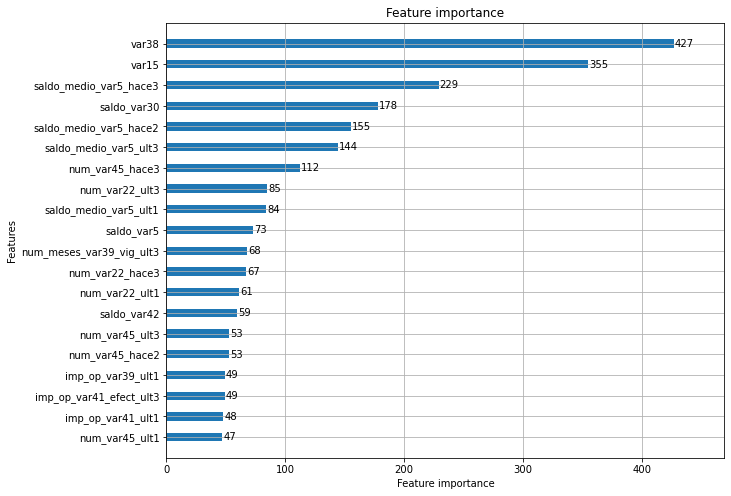

In [13]:
from lightgbm import plot_importance

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(lgbm_clf, ax=ax, max_num_features=20, height=0.4)